# 1.0 Data Exploration<a id='2.2_Introduction'></a>

## 1.1 Introduction <a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has tow parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 


Each image (of the same region) is acquired three times and the variation in geometric measurements of the same channel hole in three different images provide a measurement precision.
The customer wants to know the best protocol to achive optimal precision. There are four possibilities.
1. Class 1: Original/unprocessed image features and measurements on actual shape of the channel holes
2. Class 2: Enhanced/processed image features and measurement on actual shape of the channel holes

Exploring information on the feature files extracted from fitted geometric shapes to the channel holes is a similar repittition of the exercise and hence we are not detailing it here.

In the data-wrangling step we have already completed collecting data, organizing it, and making sure it's well defined. Some data cleaning  and data exploration was also done. In the exploratory data analysis step, we will explore the features, inter relationship between features by plotting the feature values and fitting standard models.

## 1.2 Imports<a id='2.3_Imports'></a>

Placing  imports all together at the start 

In [225]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import copy
import string

## 1.3 Objectives<a id='2.4_Objectives'></a>

* Plot distribution of the features as histograms and note the files that doesn't conform to the expected distribution
* Scatter plot features against one another to understand, highly correlated features
* Decide which (can be more than one) is suitable feature(s) to be called as critical dimension

## 1.4 Explore The Data:  <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [226]:
# the supplied CSV data file is the raw_data directory
# get data file names
fold =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\original'

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

ofiles=[]

fx1=[]
fx2=[]
fx3=[]

for file in glob.glob(fold + r"\*_0.csv"):
        fx1.append(file)
for file in glob.glob(fold + r"\*_1.csv"):
        fx2.append(file)
for file in glob.glob(fold + r"\*_2.csv"):
        fx3.append(file)

ofiles.append(fx1);
ofiles.append(fx2);
ofiles.append(fx3);

print(len(fx1))
print(len(fx2))
print(len(fx3))

10
10
10


original files are loaded and same number of triplicates are present

In [227]:
# the supplied CSV data file is the raw_data directory
# get data file names
fold =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\enhanced'

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

efiles=[]

fx1=[]
fx2=[]
fx3=[]

for file in glob.glob(fold + r"\*_0.csv"):
        fx1.append(file)
for file in glob.glob(fold + r"\*_1.csv"):
        fx2.append(file)
for file in glob.glob(fold + r"\*_2.csv"):
        fx3.append(file)

efiles.append(fx1);
efiles.append(fx2);
efiles.append(fx3);

print(len(fx1))
print(len(fx2))
print(len(fx3))

10
10
10


Enhanced data files are loaded and same number of triplicates are present

In [228]:
dfx = [] # data frame of frame of frames (for original data)

for fx in range (0, len(ofiles)):
    dfl=[]
    for file in ofiles[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfx.append(dfl)

print(len(dfx))
print(len(dfx[0]))
print(len(dfx[0][0]))
print(len(dfx[1][0]))
print(len(dfx[2][0]))

3
10
1190
1190
1190


Equal number of rows in all the files means we have done correct data wrangling and the channel holes that are not in triplicate measurements are all removed

In [229]:
dfy = [] # data frame of frame of frames (for enhanced data)

for fx in range (0, len(efiles)):
    dfl=[]
    for file in efiles[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfy.append(dfl)


In [230]:
dfx[0][0].head()

0                                                  1      2   \
0  NaN                                          file_name  label   
1  0.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...    1.0   
2  3.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...    4.0   
3  4.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...    5.0   
4  6.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...    7.0   

               3                   4                   5                  6   \
0  location (X_Y)                area         area_fitted          perimeter   
1        2406_408    3625.22914698733    4687.60747707123  719.3437125247559   
2        2826_480    4307.92587456702  5454.2722513585795   782.697586804692   
3        1056_484    4786.17866233675    5994.58837799919   828.961615062952   
4        3760_486  3972.0536877363697    5067.28907957544   751.450050277277   

                  7                    8                   9   \
0   perimeter_Fitted  areaEnclosingCircle      areaFitEllipse   
1  854.4921992204021     4547.63358744076  14834.331973987402   
2   922.851575158035       4874.510671172  17741.251751534703   
3   974.121107111259   5734.7115339599195     19792.513442201   
4  871.5820432048099     4716.02554430334  16420.173685653703   

                     10                 11                12  \
0  areaMinAreaRectangle       eccentricity       orientation   
1      4534.27430456186  0.878787082274336   101.93603515625   
2      5315.54255500015  0.948515882083022  83.3018188476563   
3      5928.87434754666  0.931858967159397  38.2573165893555   
4      4731.41645847497  0.868090523563317  3.09837484359741   

                  13        14                 15         16          17  
0          convexity  0degDiam          45degDiam  90degDiam  135degDiam  
1  0.978325123152709  598.1445  606.6895000000001   581.0547    598.1445  
2  0.977630488815244  563.9648           589.5996   581.0547    589.5996  
3  0.974721189591078  598.1445  606.6895000000001   581.0547    581.0547  
4  0.981949458483754  598.1445           589.5996   581.0547    581.0547

In [231]:
dfy[0][0].head()

0                                                  1      2   \
0  NaN                                          file_name  label   
1  0.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...    1.0   
2  1.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...    2.0   
3  2.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...    3.0   
4  3.0  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...    4.0   

               3                  4                 5                  6   \
0  location (X_Y)               area       area_fitted          perimeter   
1         734_408   5676.97011436586  7155.53789334861   1018.16443769629   
2        2686_410  5260.780665467009  6629.82490526585    945.65836947514   
3        2314_418  5001.574956065101  6242.84173348271  848.1248062077531   
4        2406_420   5739.03345323674  7265.06143253251   1044.40647052874   

                   7                    8                   9   \
0    perimeter_Fitted  areaEnclosingCircle      areaFitEllipse   
1  1213.3789228929702     8679.42185021971    26731.0996896834   
2    1110.83985898652     8464.41438205136  23419.928603524902   
3    1008.30079508007     5889.18997747013     20479.532207839   
4  1264.6484548462001   10007.040696479702  25650.787521557704   

                     10                 11                12  \
0  areaMinAreaRectangle       eccentricity       orientation   
1      8192.36078782493  0.751680333122636  177.020446777344   
2     7178.005481565601  0.764132146745952  148.136474609375   
3    6133.3179254651095  0.858158133306831  96.6793518066406   
4      8447.91539257188  0.705192644331594  139.109970092773   

                  13        14                 15         16  \
0          convexity  0degDiam          45degDiam  90degDiam   
1  0.889588100686499  538.3301  649.4141000000001    546.875   
2  0.926092544987147   546.875  615.2343999999999    546.875   
3  0.977872947894361   546.875           512.6953    546.875   
4  0.874791318864775  563.9648           572.5098    546.875   

                   17  
0          135degDiam  
1            589.5996  
2             546.875  
3            478.5156  
4  487.06059999999997

#### Get the column labelling right

In [232]:
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d] = dfx[f][d].dropna(axis='columns')
header_row=0
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].columns = dfx[f][d].iloc[header_row]
        dfx[f][d] = dfx[f][d].drop(dfx[f][d].index[header_row])
        
dfx[0][0].head()

0                                          file_name label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   1.0       2406_408   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   4.0       2826_480   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   5.0       1056_484   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   7.0       3760_486   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   8.0       1890_488   

0                area         area_fitted          perimeter  \
1    3625.22914698733    4687.60747707123  719.3437125247559   
2    4307.92587456702  5454.2722513585795   782.697586804692   
3    4786.17866233675    5994.58837799919   828.961615062952   
4  3972.0536877363697    5067.28907957544   751.450050277277   
5    4669.35355387391   5855.858561699571  811.8717782089831   

0   perimeter_Fitted areaEnclosingCircle      areaFitEllipse  \
1  854.4921992204021    4547.63358744076  14834.331973987402   
2   922.851575158035      4874.510671172  17741.251751534703   
3   974.121107111259  5734.7115339599195     19792.513442201   
4  871.5820432048099    4716.02554430334  16420.173685653703   
5   957.031263126851  5536.9904528958195  19392.097052549703   

0 areaMinAreaRectangle       eccentricity       orientation  \
1     4534.27430456186  0.878787082274336   101.93603515625   
2     5315.54255500015  0.948515882083022  83.3018188476563   
3     5928.87434754666  0.931858967159397  38.2573165893555   
4     4731.41645847497  0.868090523563317  3.09837484359741   
5    5724.430769628219  0.906239407618919  28.5953693389893   

0          convexity  0degDiam          45degDiam 90degDiam 135degDiam  
1  0.978325123152709  598.1445  606.6895000000001  581.0547   598.1445  
2  0.977630488815244  563.9648           589.5996  581.0547   589.5996  
3  0.974721189591078  598.1445  606.6895000000001  581.0547   581.0547  
4  0.981949458483754  598.1445           589.5996  581.0547   581.0547  
5  0.980828220858896  581.0547           589.5996  581.0547   581.0547

In [233]:
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        dfy[f][d] = dfy[f][d].dropna(axis='columns')
header_row=0
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        dfy[f][d].columns = dfy[f][d].iloc[header_row]
        dfy[f][d] = dfy[f][d].drop(dfy[f][d].index[header_row])
        
dfy[0][0].head()

0                                          file_name label location (X_Y)  \
1  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   1.0        734_408   
2  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   2.0       2686_410   
3  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   3.0       2314_418   
4  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   4.0       2406_420   
5  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   5.0       3378_486   

0               area       area_fitted          perimeter    perimeter_Fitted  \
1   5676.97011436586  7155.53789334861   1018.16443769629  1213.3789228929702   
2  5260.780665467009  6629.82490526585    945.65836947514    1110.83985898652   
3  5001.574956065101  6242.84173348271  848.1248062077531    1008.30079508007   
4   5739.03345323674  7265.06143253251   1044.40647052874  1264.6484548462001   
5   4435.70333694824  5658.71619116854  848.9836135446631    974.121107111259   

0 areaEnclosingCircle      areaFitEllipse areaMinAreaRectangle  \
1    8679.42185021971    26731.0996896834     8192.36078782493   
2    8464.41438205136  23419.928603524902    7178.005481565601   
3    5889.18997747013     20479.532207839   6133.3179254651095   
4  10007.040696479702  25650.787521557704     8447.91539257188   
5    5855.13967556731    18534.6663166399     5695.22401481571   

0       eccentricity       orientation          convexity  0degDiam  \
1  0.751680333122636  177.020446777344  0.889588100686499  538.3301   
2  0.764132146745952  148.136474609375  0.926092544987147   546.875   
3  0.858158133306831  96.6793518066406  0.977872947894361   546.875   
4  0.705192644331594  139.109970092773  0.874791318864775  563.9648   
5  0.825343217754859  6.61882734298706  0.939675174013921  538.3301   

0          45degDiam 90degDiam          135degDiam  
1  649.4141000000001   546.875            589.5996  
2  615.2343999999999   546.875             546.875  
3           512.6953   546.875            478.5156  
4           572.5098   546.875  487.06059999999997  
5           538.3301   546.875            555.4199

In [234]:
dfx[0][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 1189
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file_name             1189 non-null   object
 1   label                 1189 non-null   object
 2   location (X_Y)        1189 non-null   object
 3   area                  1189 non-null   object
 4   area_fitted           1189 non-null   object
 5   perimeter             1189 non-null   object
 6   perimeter_Fitted      1189 non-null   object
 7   areaEnclosingCircle   1189 non-null   object
 8   areaFitEllipse        1189 non-null   object
 9   areaMinAreaRectangle  1189 non-null   object
 10  eccentricity          1189 non-null   object
 11  orientation           1189 non-null   object
 12  convexity             1189 non-null   object
 13  0degDiam              1189 non-null   object
 14  45degDiam             1189 non-null   object
 15  90degDiam             1189 non-null   

In [235]:
dfy[0][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 1 to 1426
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file_name             1426 non-null   object
 1   label                 1426 non-null   object
 2   location (X_Y)        1426 non-null   object
 3   area                  1426 non-null   object
 4   area_fitted           1426 non-null   object
 5   perimeter             1426 non-null   object
 6   perimeter_Fitted      1426 non-null   object
 7   areaEnclosingCircle   1426 non-null   object
 8   areaFitEllipse        1426 non-null   object
 9   areaMinAreaRectangle  1426 non-null   object
 10  eccentricity          1426 non-null   object
 11  orientation           1426 non-null   object
 12  convexity             1426 non-null   object
 13  0degDiam              1426 non-null   object
 14  45degDiam             1426 non-null   object
 15  90degDiam             1426 non-null   

#### so we must convert object to numeric

In [236]:
dfl = (dfx[0][0].columns)
dfl0=dfl[3:len(dfl)]
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        for fname in dfl0:
            dfx[f][d][fname] = pd.to_numeric(dfx[f][d][fname], errors='coerce')
dfx[0][0].head()

0                                          file_name label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   1.0       2406_408   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   4.0       2826_480   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   5.0       1056_484   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   7.0       3760_486   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...   8.0       1890_488   

0         area  area_fitted   perimeter  perimeter_Fitted  \
1  3625.229147  4687.607477  719.343713        854.492199   
2  4307.925875  5454.272251  782.697587        922.851575   
3  4786.178662  5994.588378  828.961615        974.121107   
4  3972.053688  5067.289080  751.450050        871.582043   
5  4669.353554  5855.858562  811.871778        957.031263   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1          4547.633587    14834.331974           4534.274305      0.878787   
2          4874.510671    17741.251752           5315.542555      0.948516   
3          5734.711534    19792.513442           5928.874348      0.931859   
4          4716.025544    16420.173686           4731.416458      0.868091   
5          5536.990453    19392.097053           5724.430770      0.906239   

0  orientation  convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1   101.936035   0.978325  598.1445   606.6895   581.0547    598.1445  
2    83.301819   0.977630  563.9648   589.5996   581.0547    589.5996  
3    38.257317   0.974721  598.1445   606.6895   581.0547    581.0547  
4     3.098375   0.981949  598.1445   589.5996   581.0547    581.0547  
5    28.595369   0.980828  581.0547   589.5996   581.0547    581.0547

In [237]:
dfl = (dfy[0][0].columns)
dfl0=dfl[3:len(dfl)]
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        for fname in dfl0:
            dfy[f][d][fname] = pd.to_numeric(dfy[f][d][fname], errors='coerce')
dfy[0][0].head()

0                                          file_name label location (X_Y)  \
1  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   1.0        734_408   
2  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   2.0       2686_410   
3  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   3.0       2314_418   
4  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   4.0       2406_420   
5  Enhanced_flat_MicronDRAM_Middle_20210121_DMpre...   5.0       3378_486   

0         area  area_fitted    perimeter  perimeter_Fitted  \
1  5676.970114  7155.537893  1018.164438       1213.378923   
2  5260.780665  6629.824905   945.658369       1110.839859   
3  5001.574956  6242.841733   848.124806       1008.300795   
4  5739.033453  7265.061433  1044.406471       1264.648455   
5  4435.703337  5658.716191   848.983614        974.121107   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1          8679.421850    26731.099690           8192.360788      0.751680   
2          8464.414382    23419.928604           7178.005482      0.764132   
3          5889.189977    20479.532208           6133.317925      0.858158   
4         10007.040696    25650.787522           8447.915393      0.705193   
5          5855.139676    18534.666317           5695.224015      0.825343   

0  orientation  convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1   177.020447   0.889588  538.3301   649.4141    546.875    589.5996  
2   148.136475   0.926093  546.8750   615.2344    546.875    546.8750  
3    96.679352   0.977873  546.8750   512.6953    546.875    478.5156  
4   139.109970   0.874791  563.9648   572.5098    546.875    487.0606  
5     6.618827   0.939675  538.3301   538.3301    546.875    555.4199

Now we have a list dfx that contains 3 lists of dataframes of the wrangled features from original images
dfy is a list containing 3 lists of dataframes of the wrangles features from enhanced images

## 1.5 Let us explore the frequency distribution of each feature <a id='2.6_Explore_The_Data'></a>

### 1.5.1 Create a histogram plot for each feature distribution <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

#### Let us calculate some parameters and plot bunch of triplicate measurements in consequtive three rows

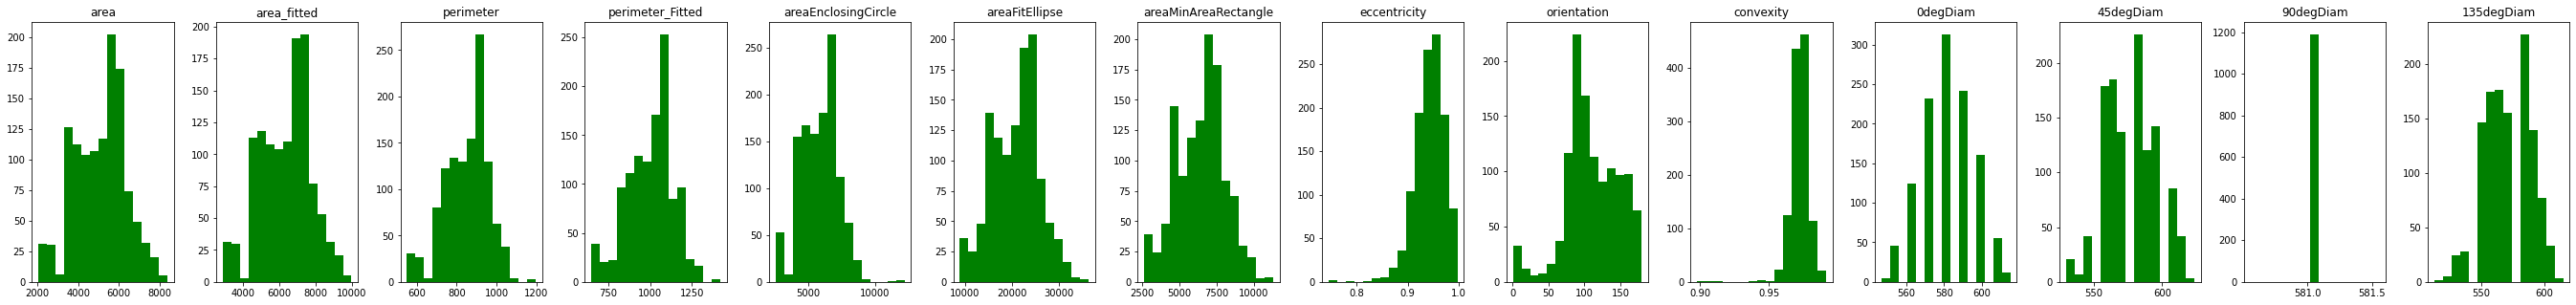

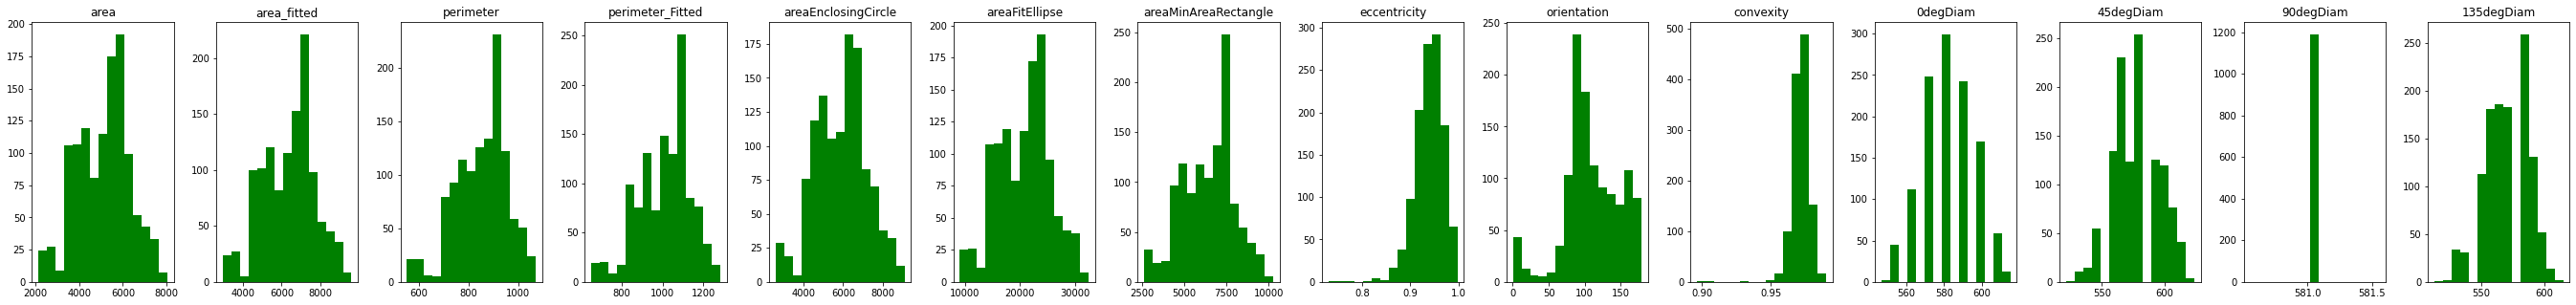

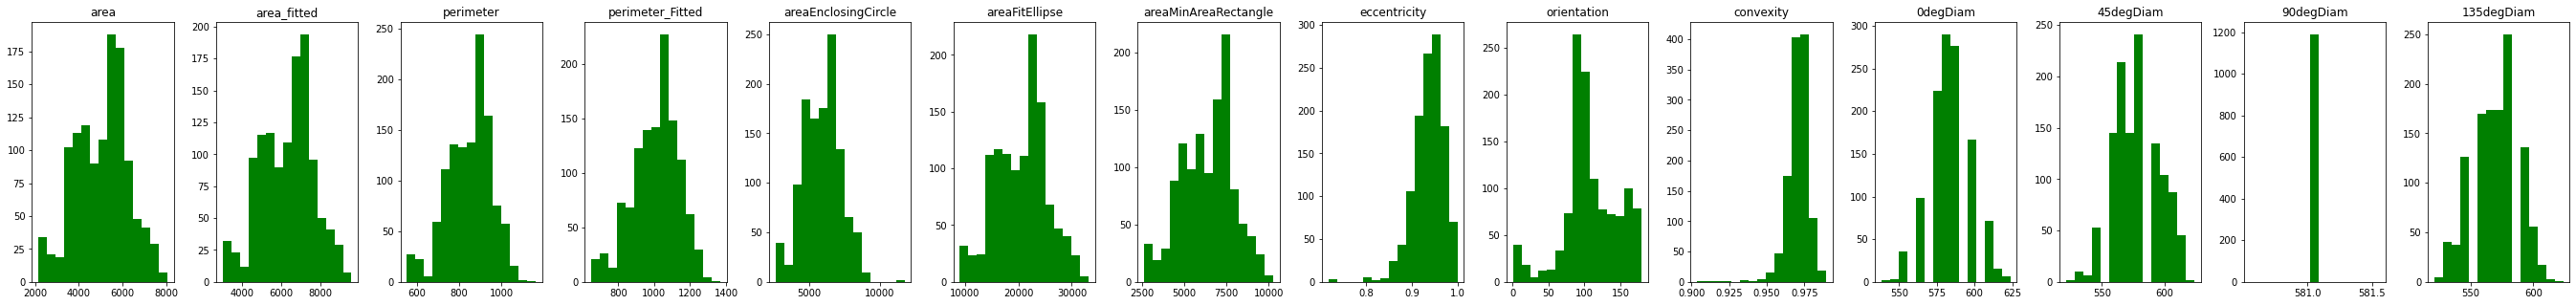

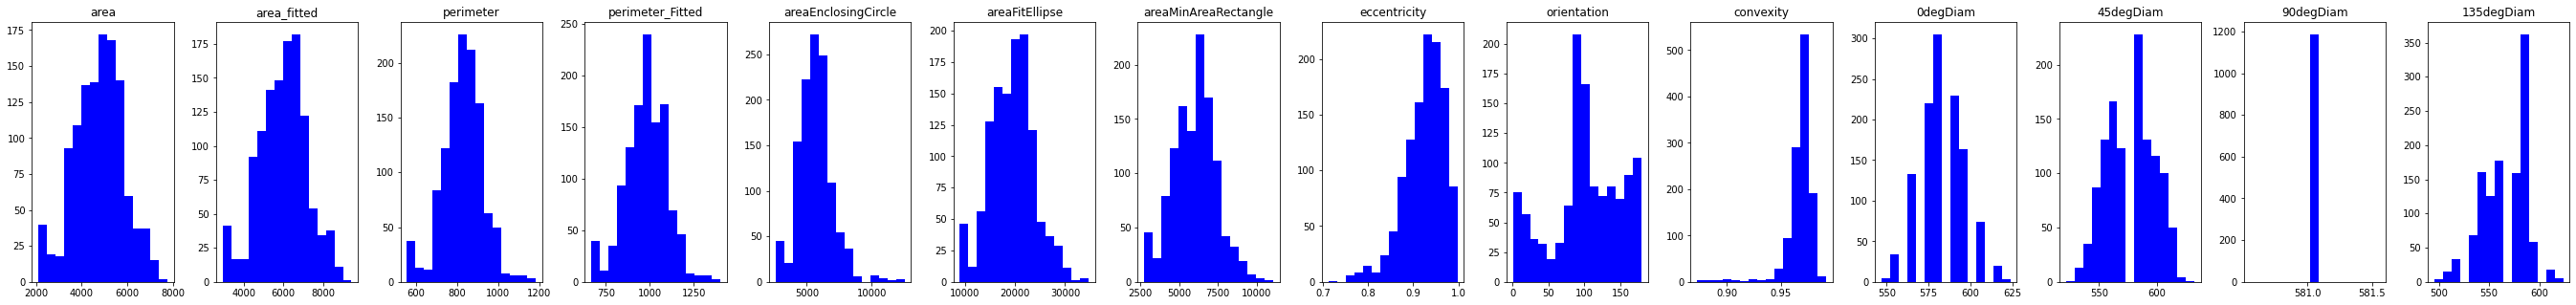

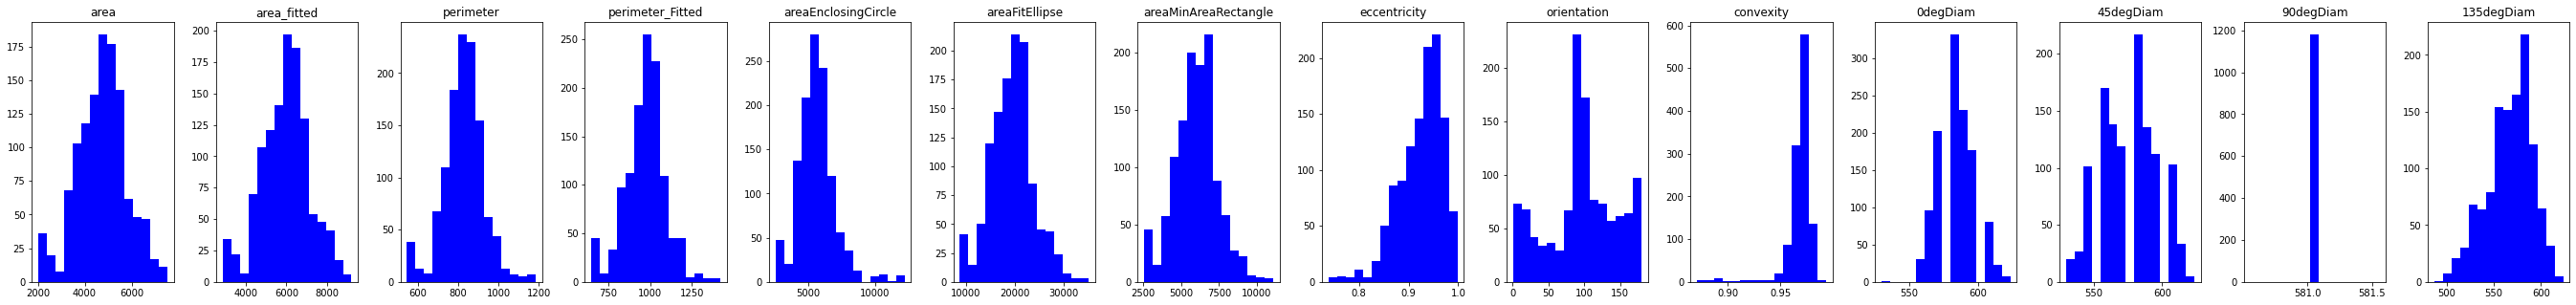

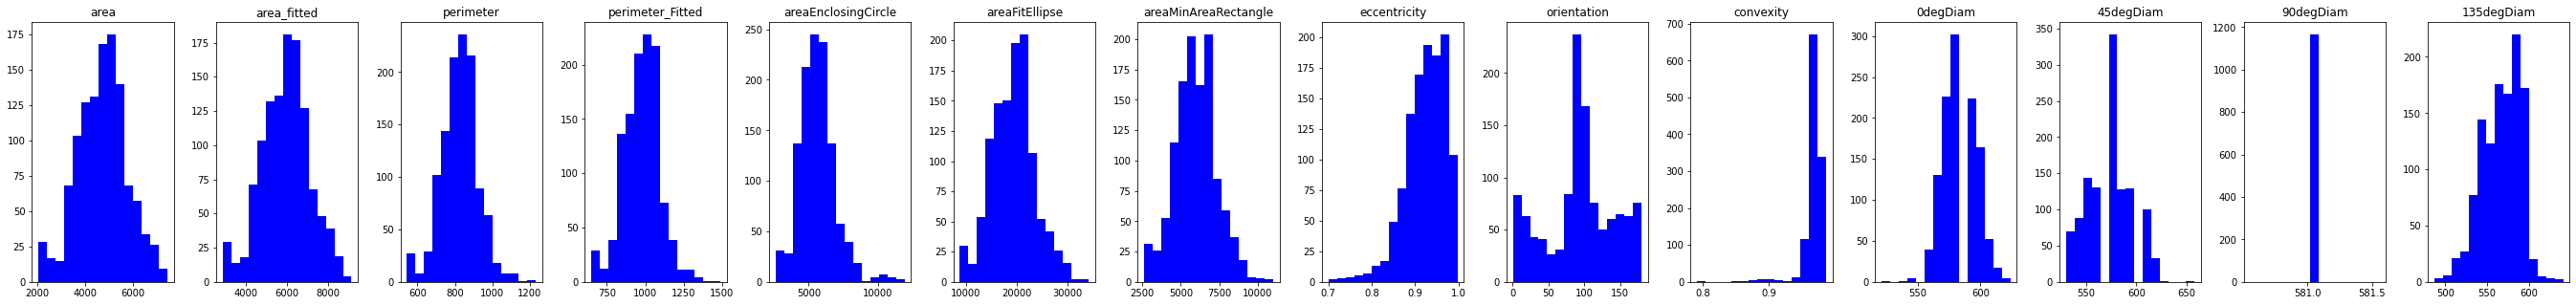

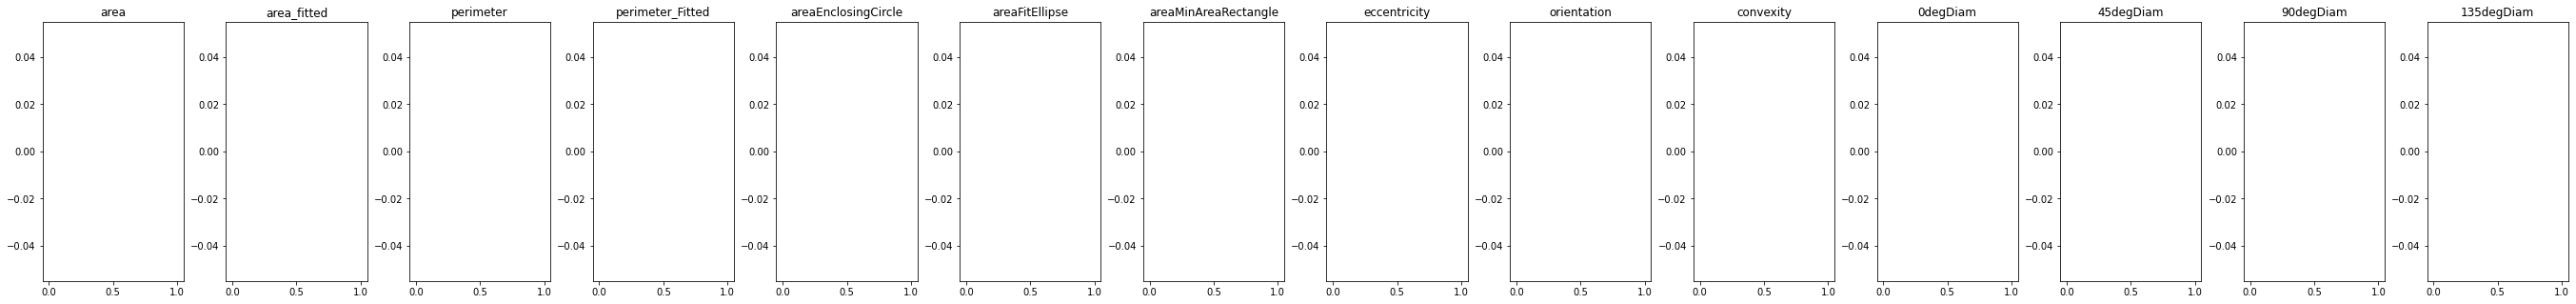

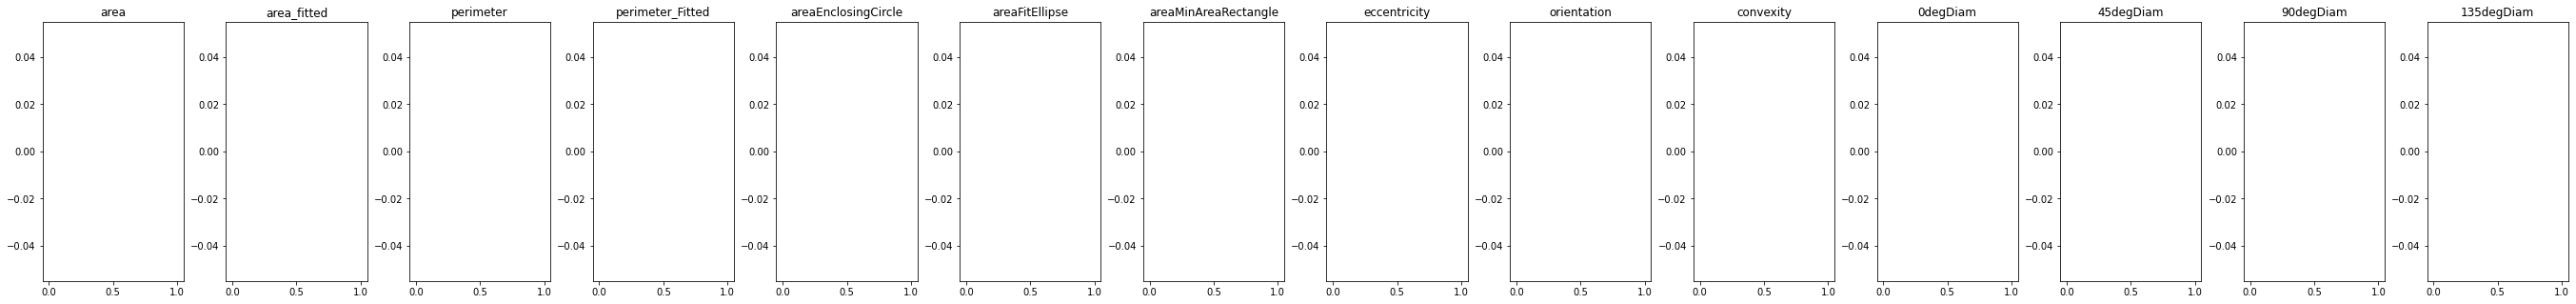

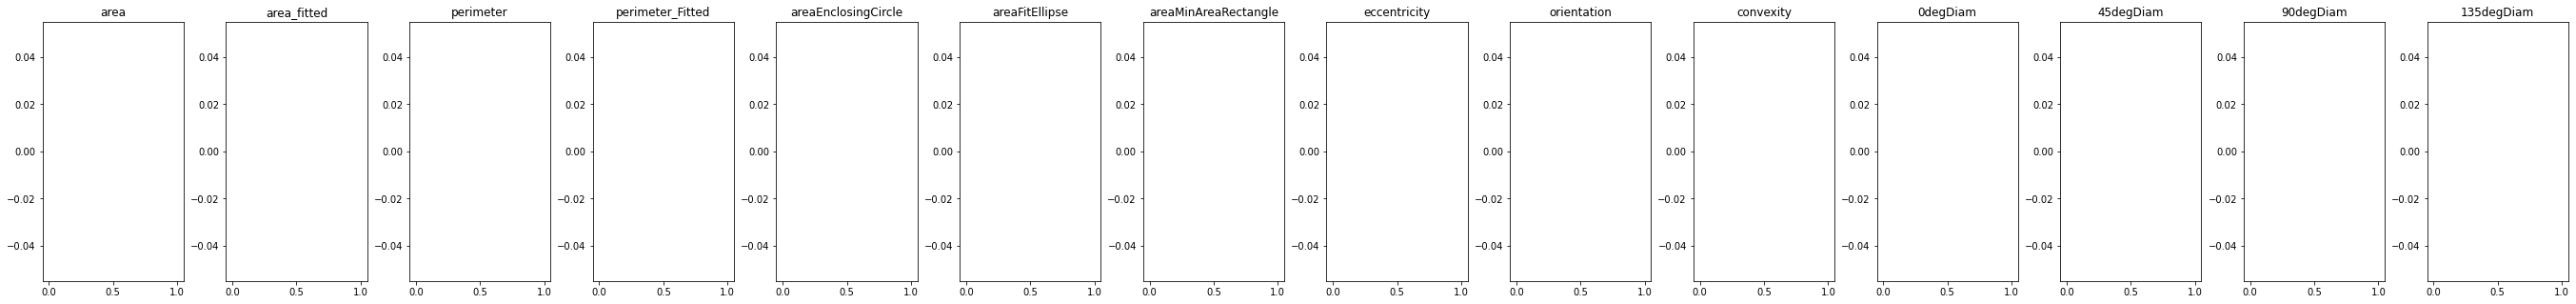

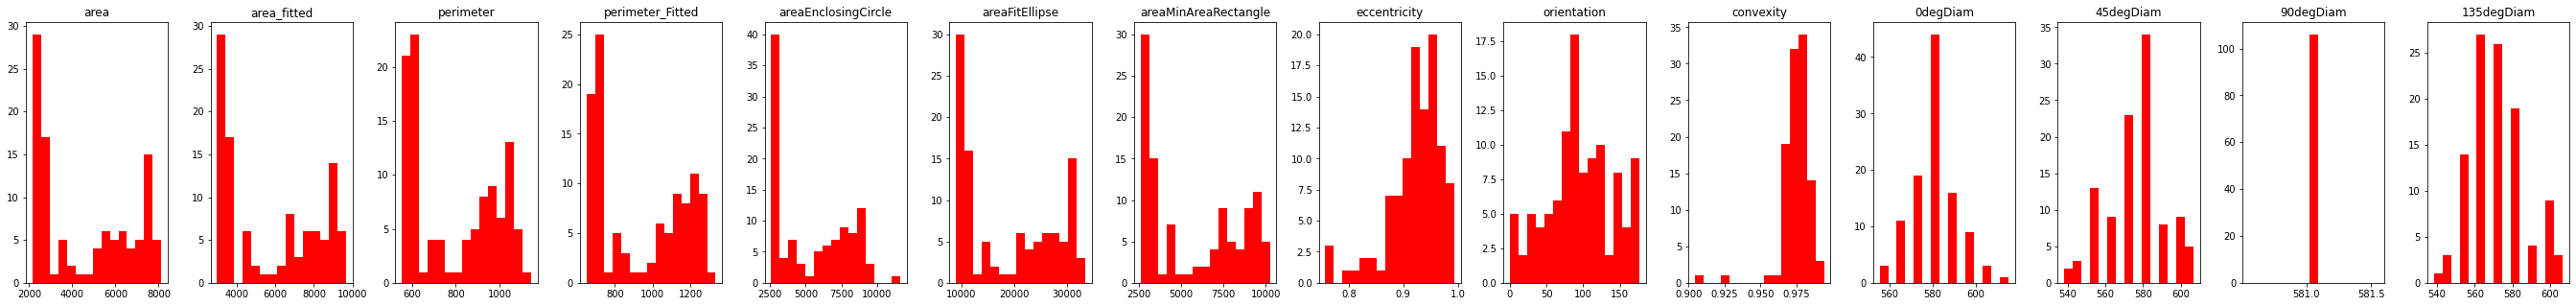

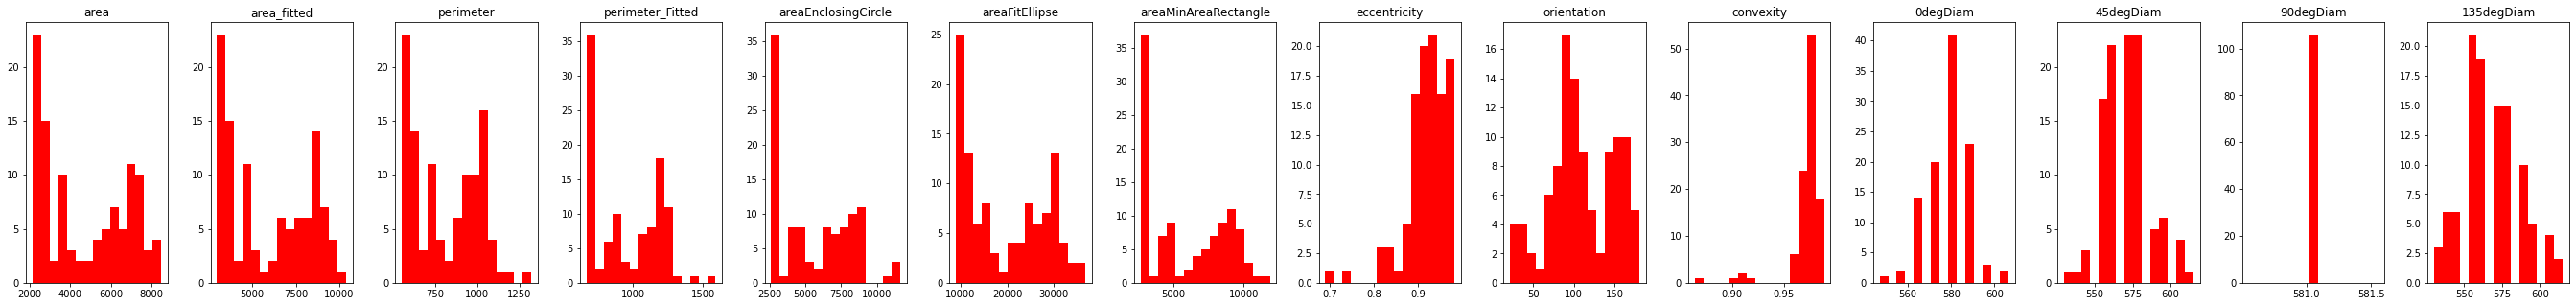

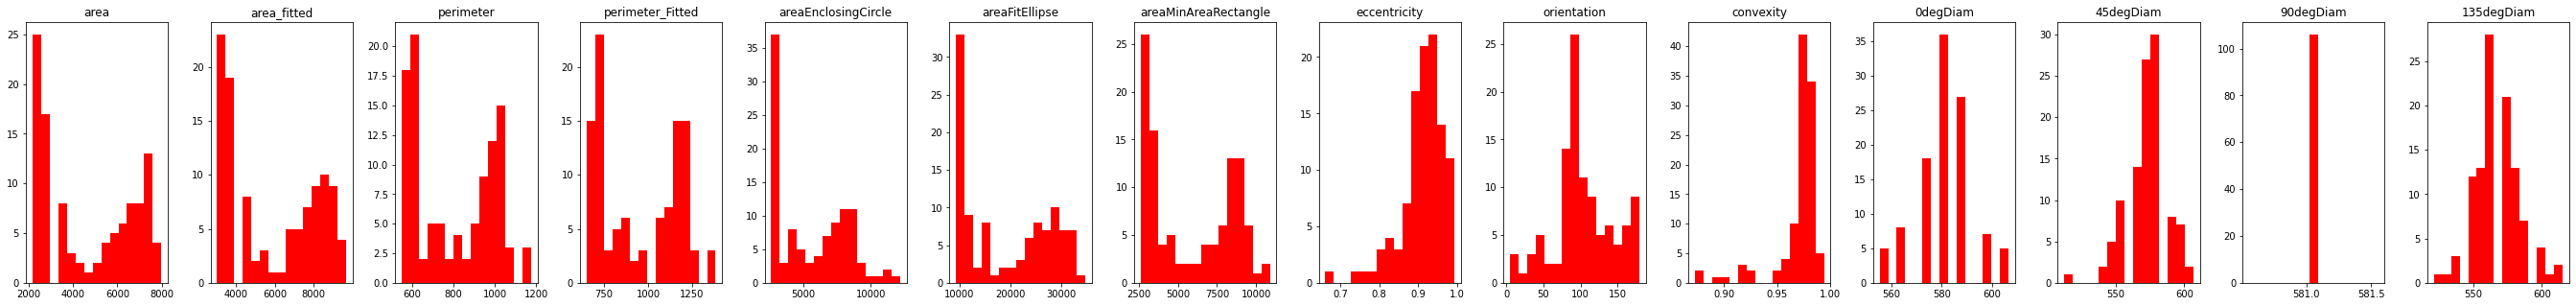

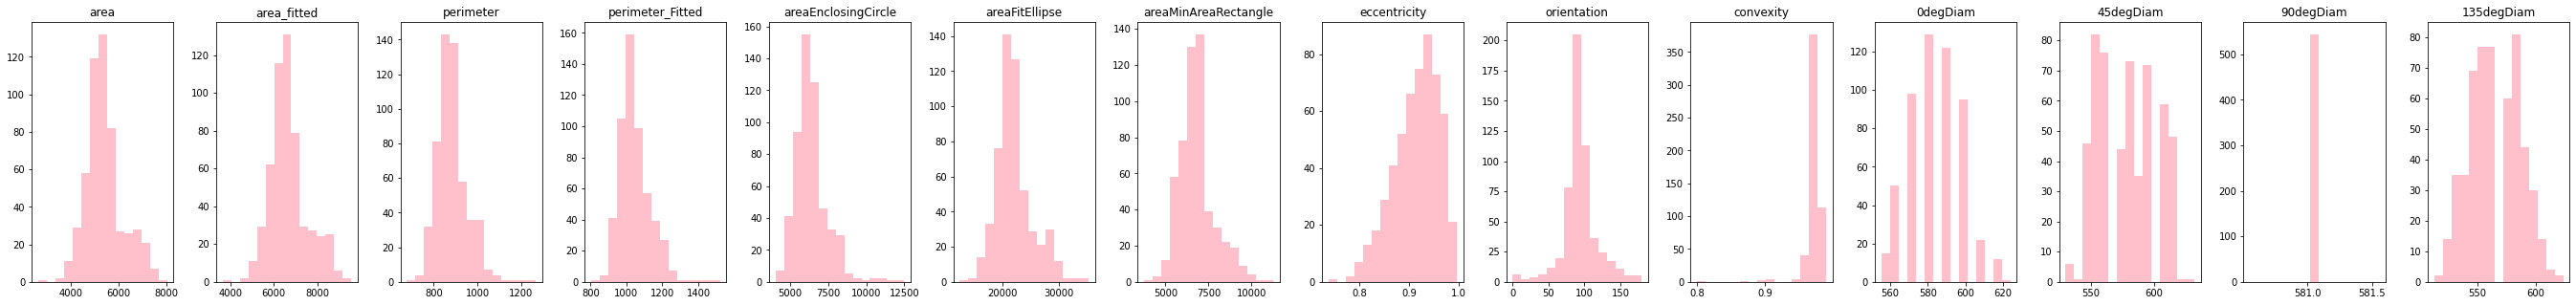

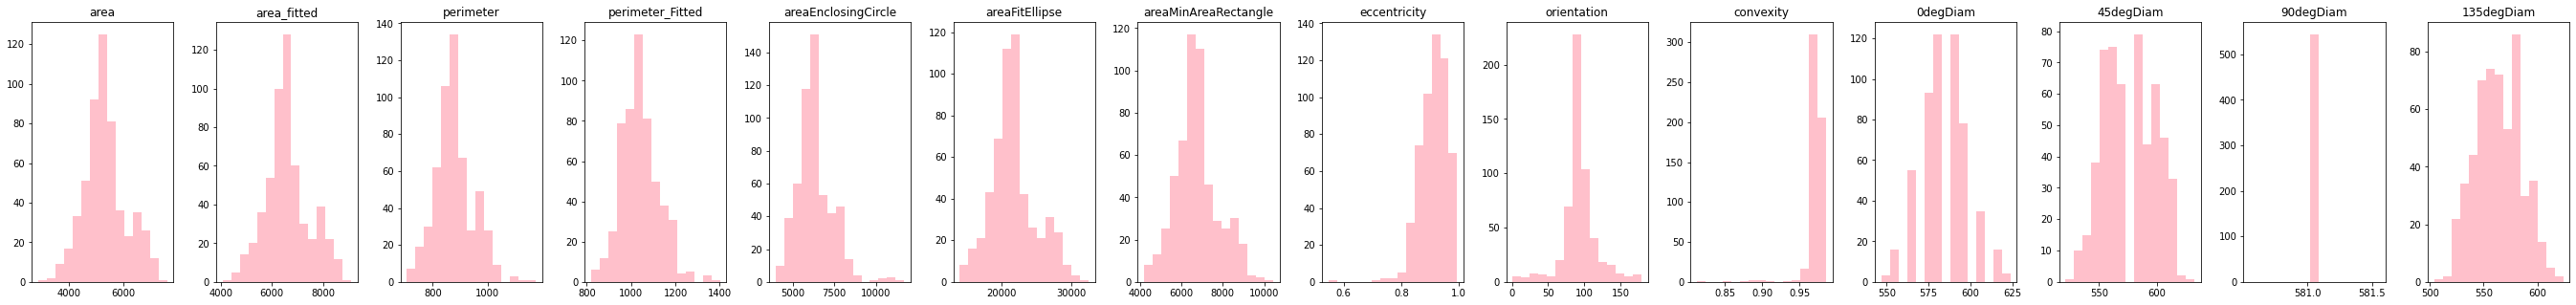

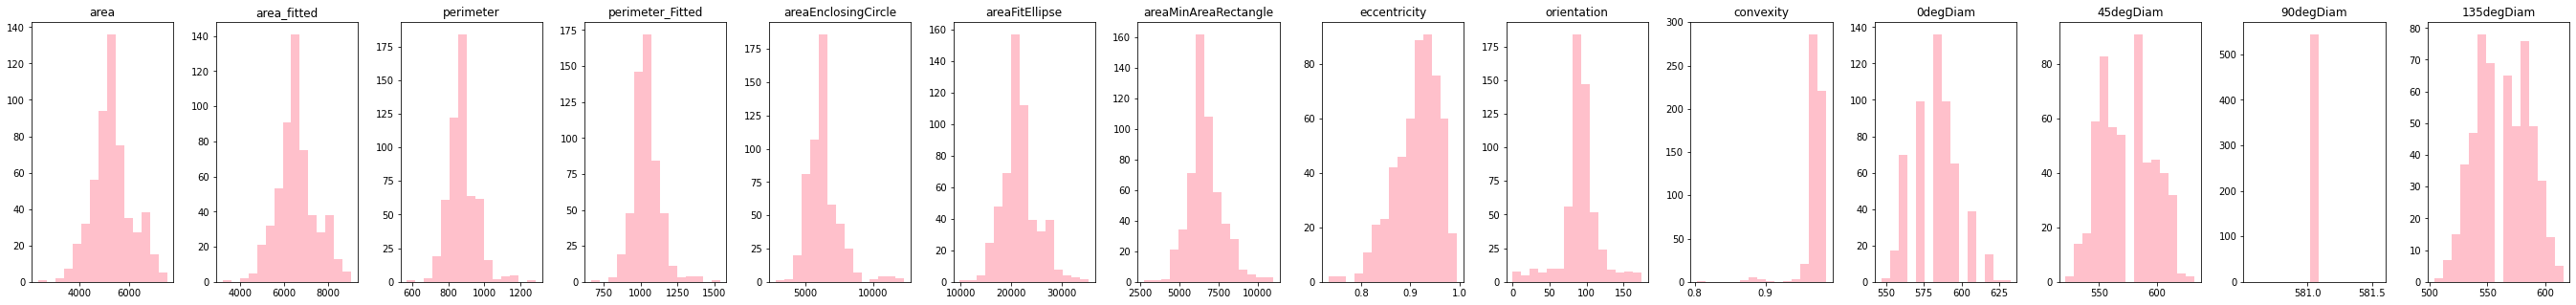

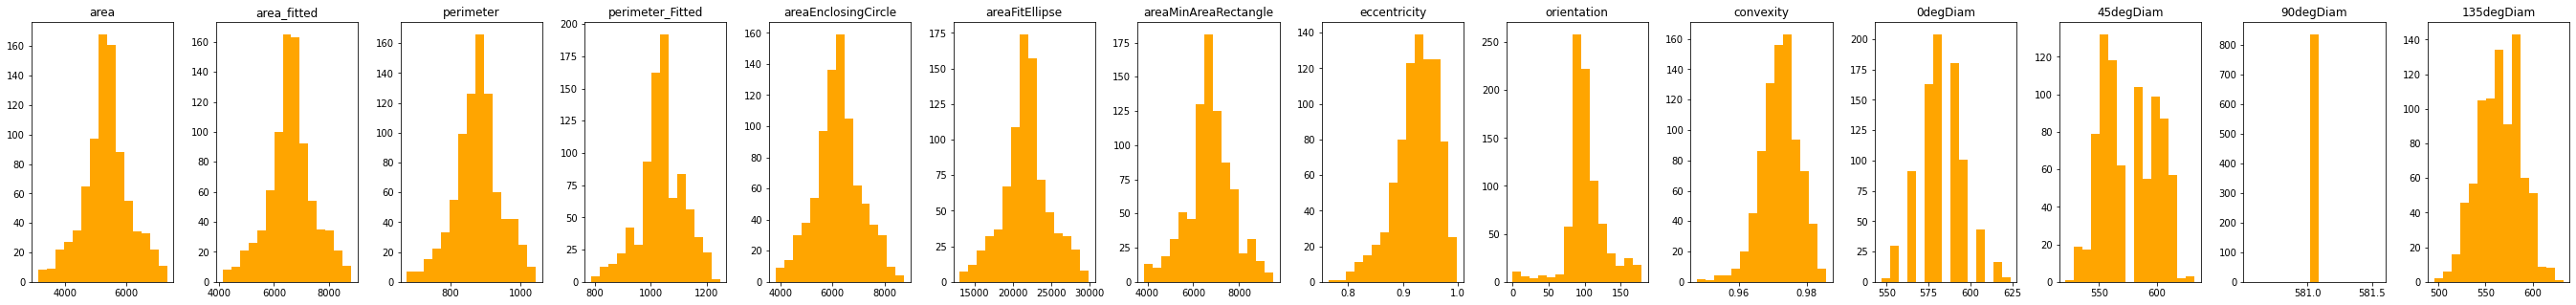

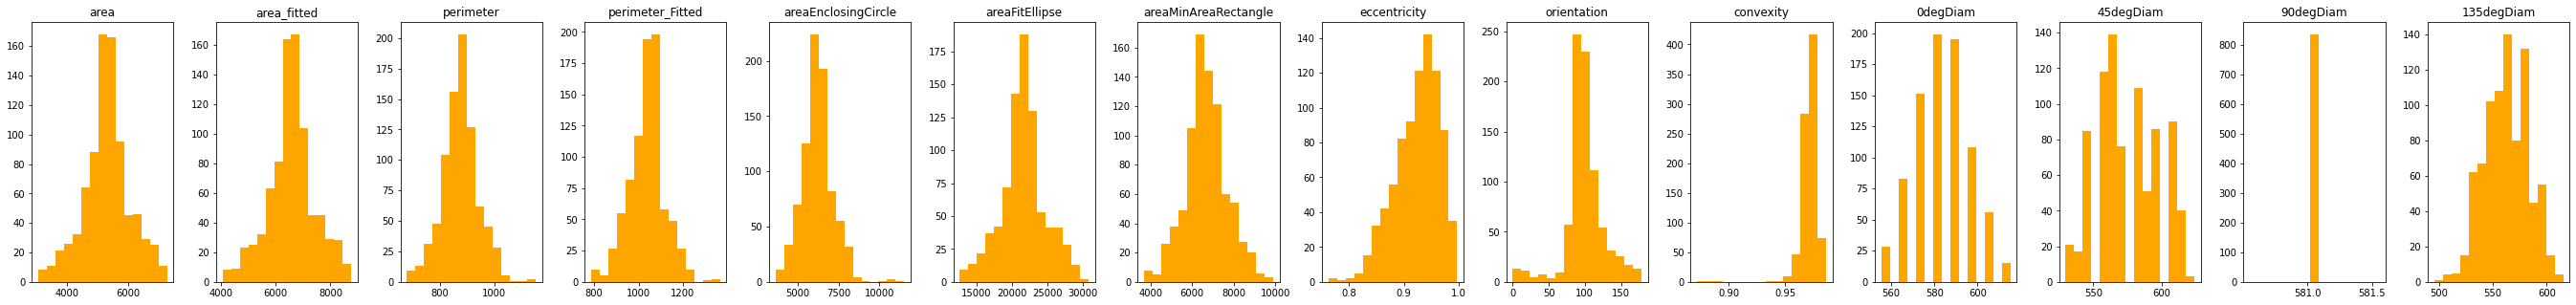

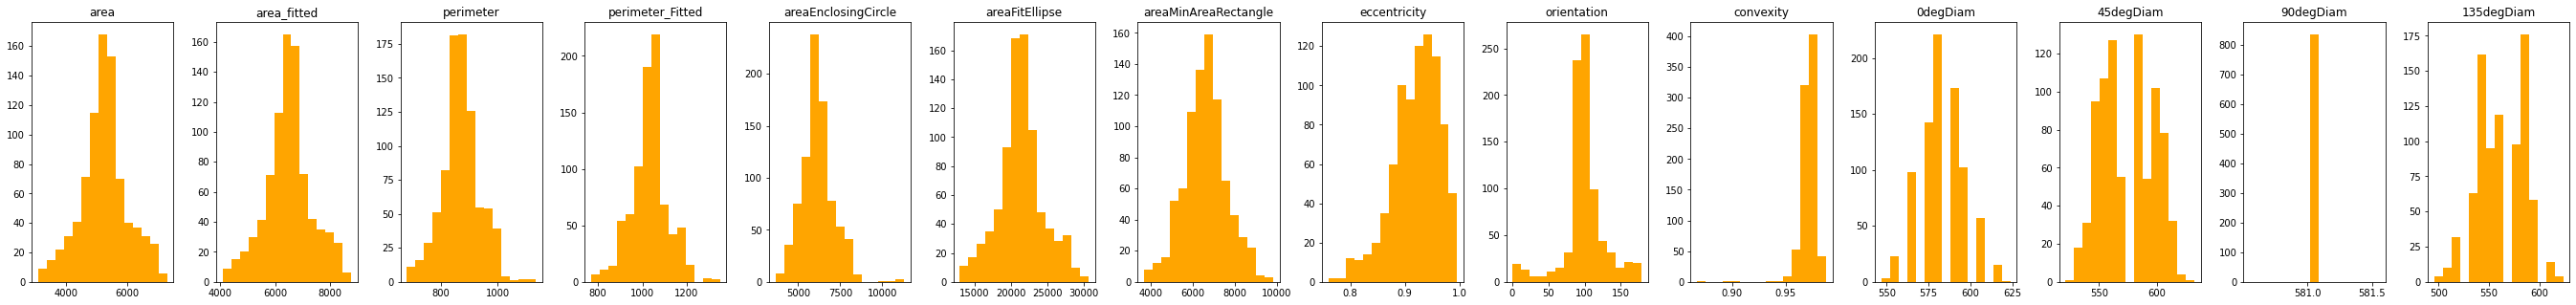

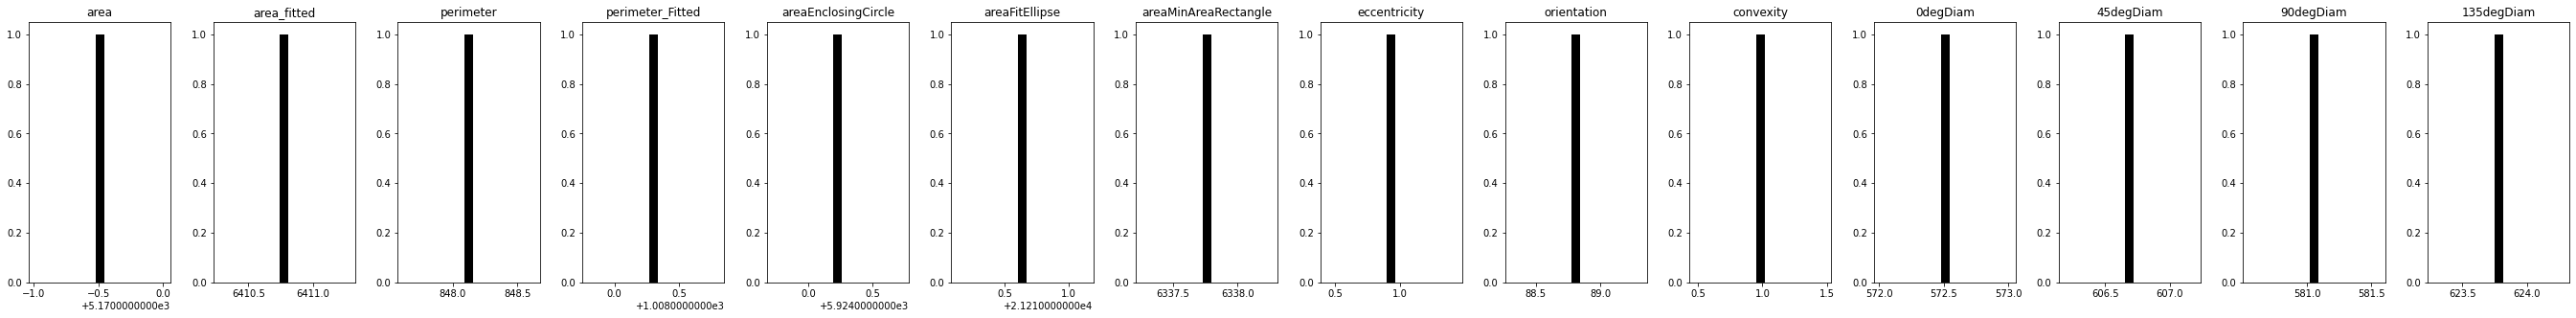

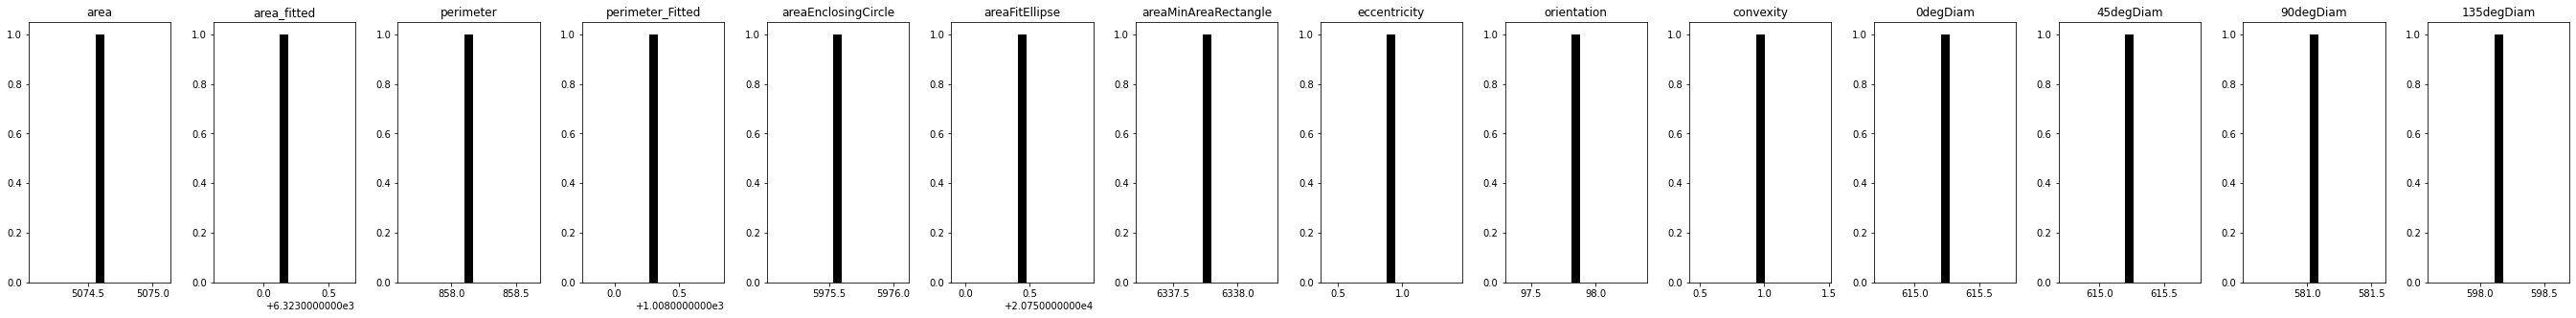

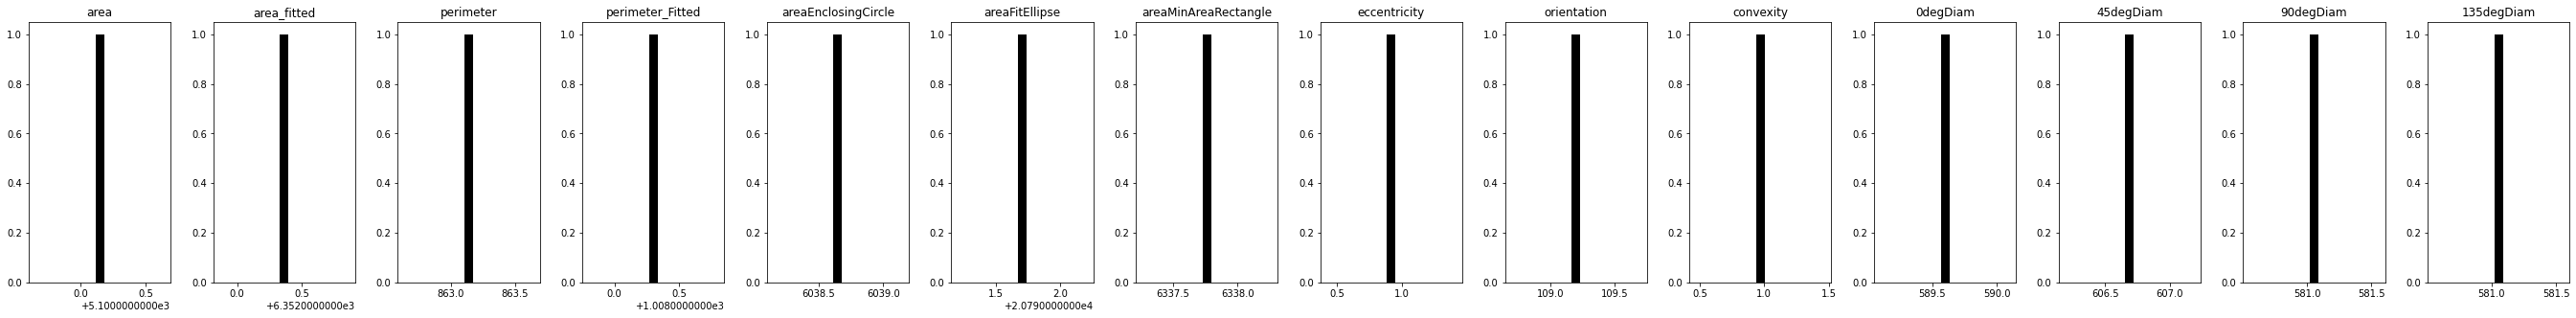

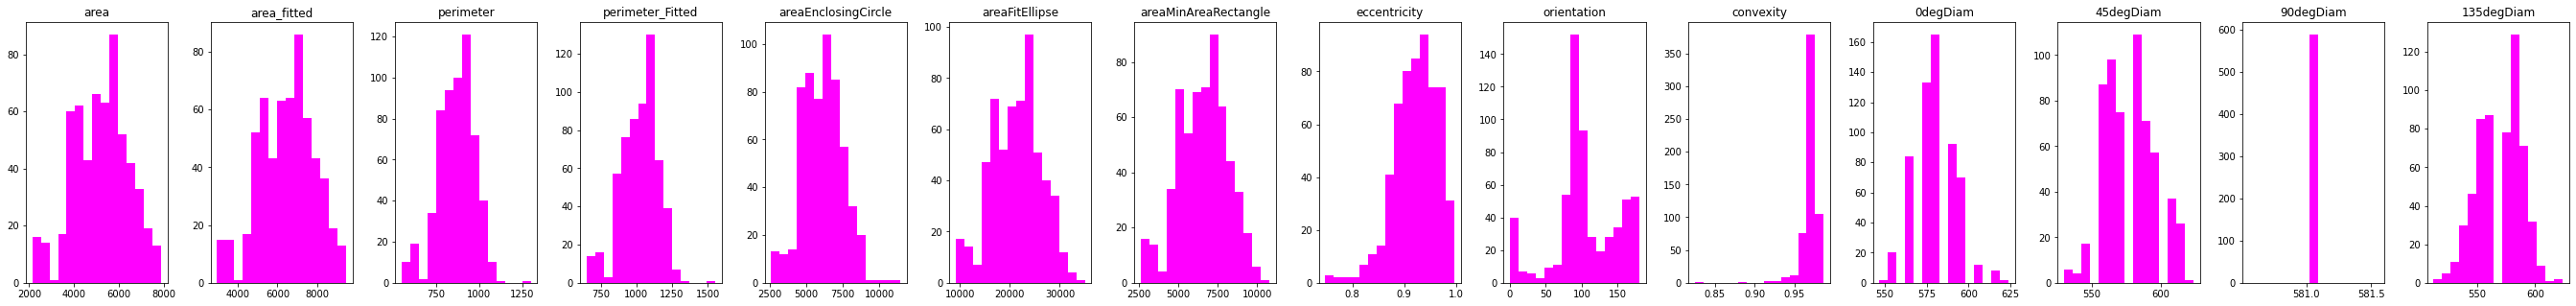

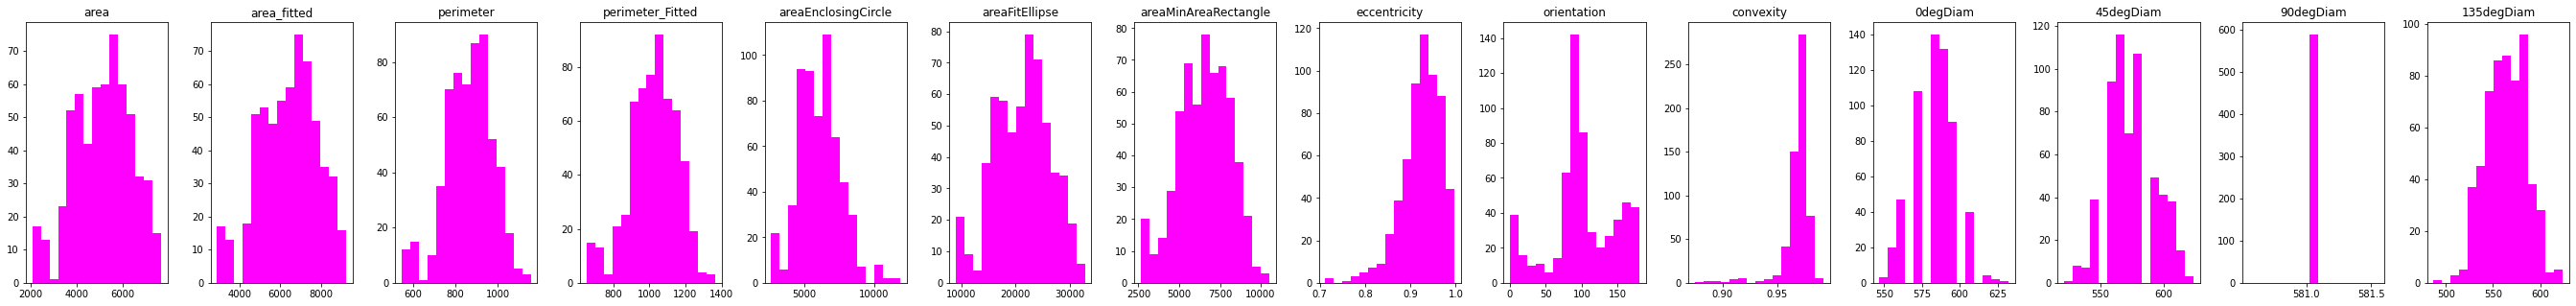

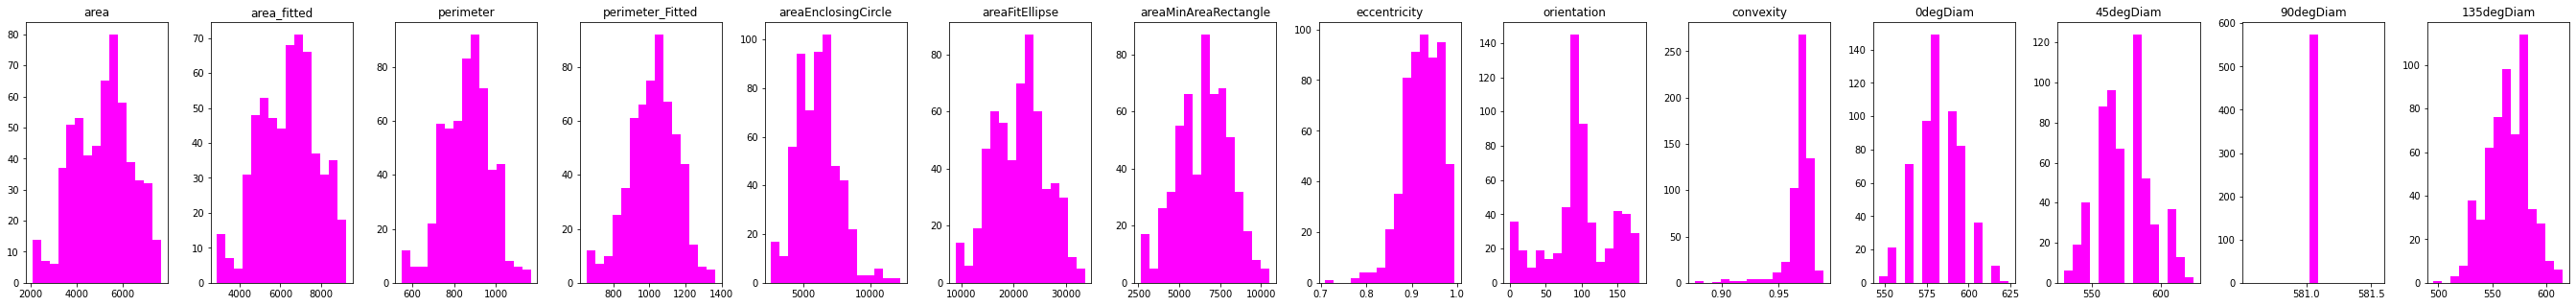

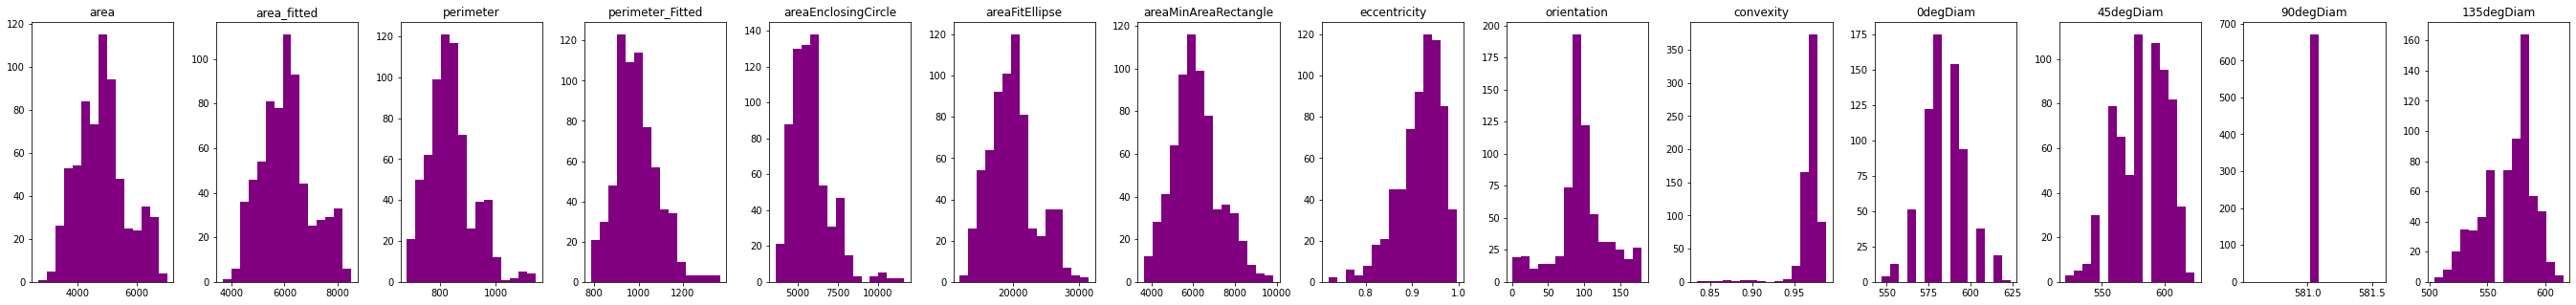

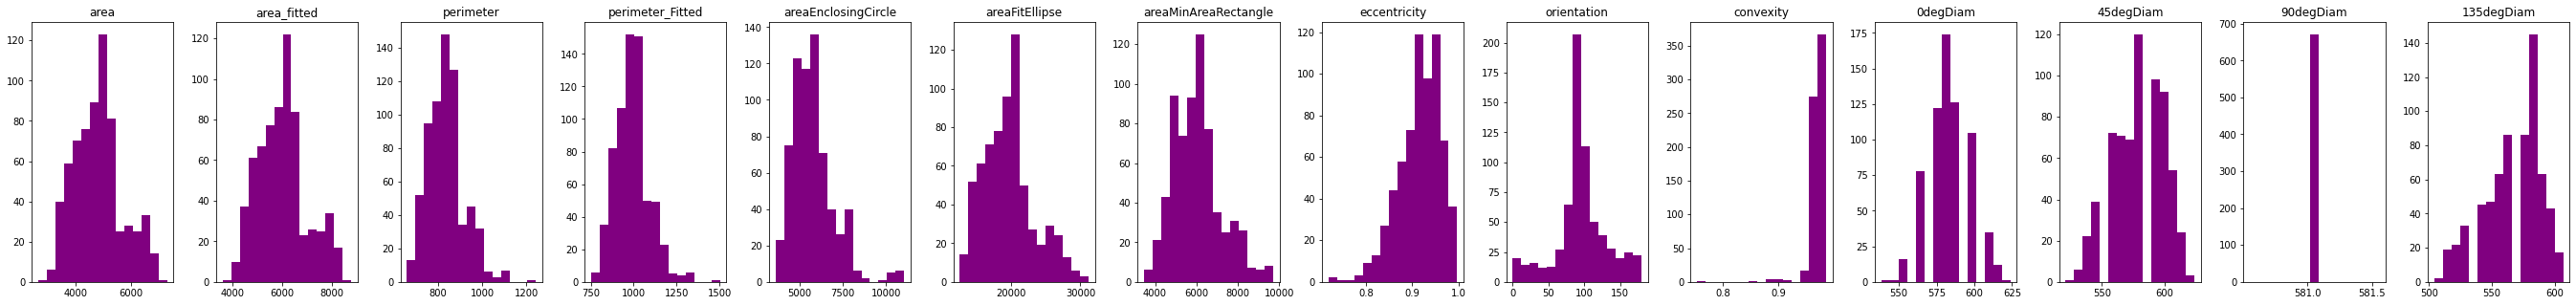

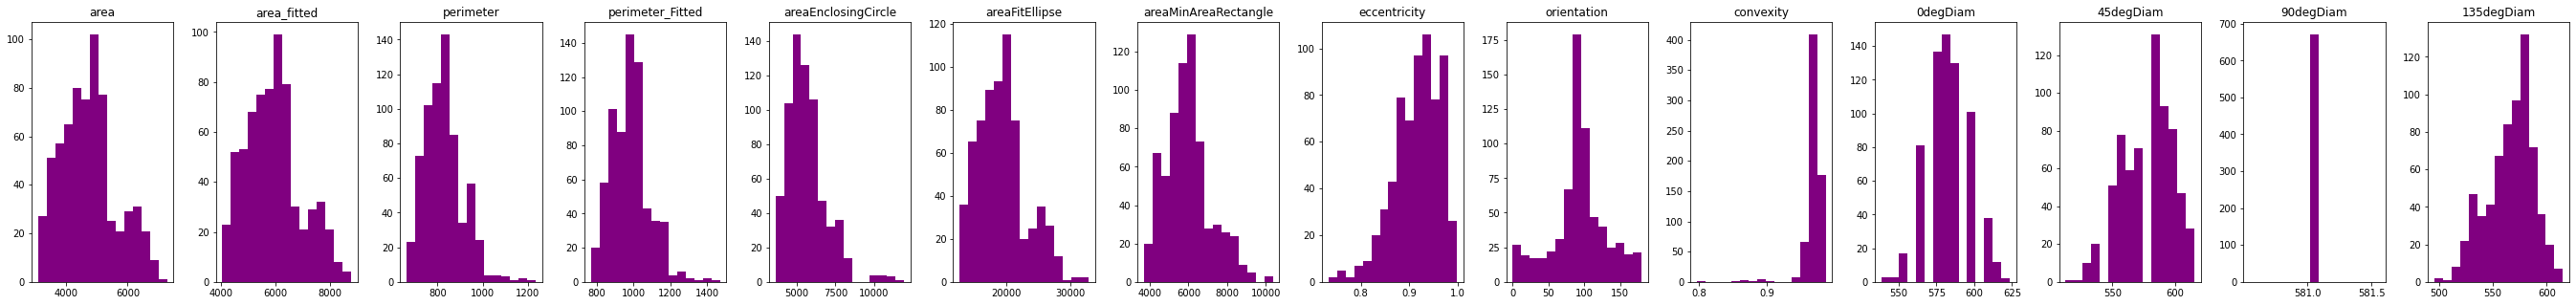

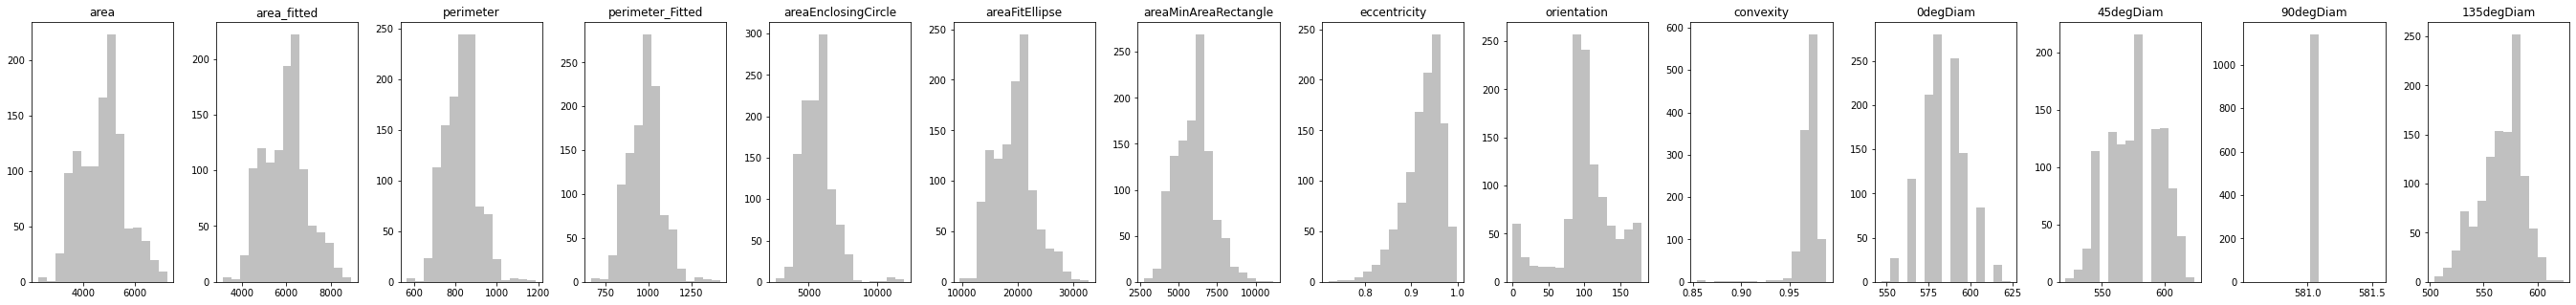

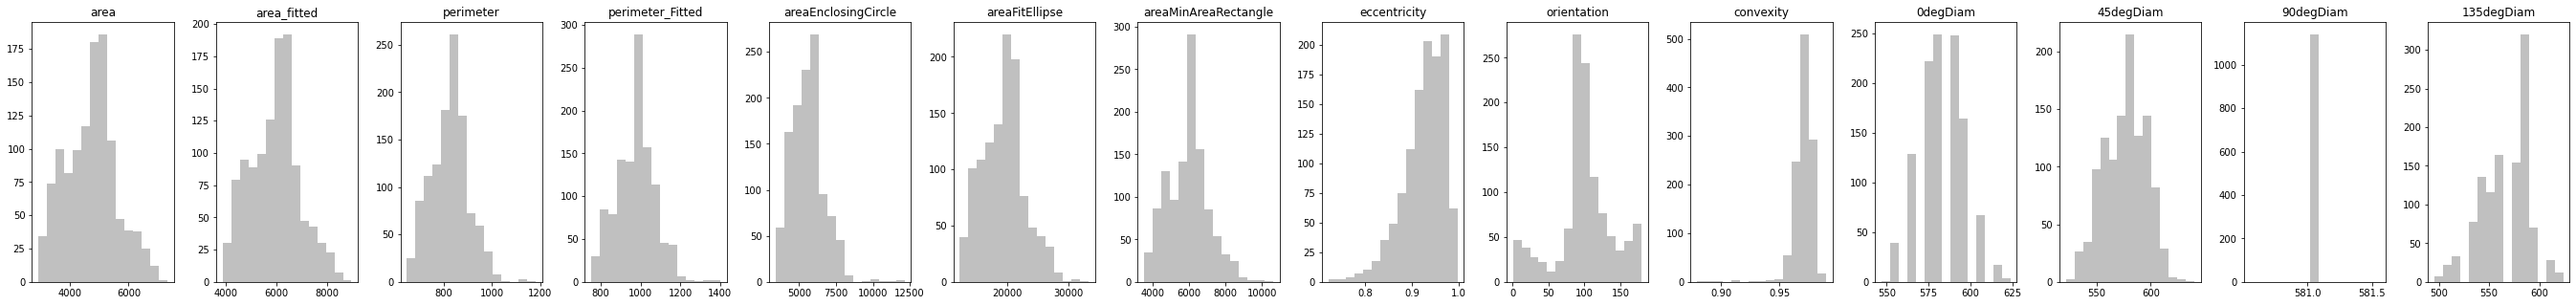

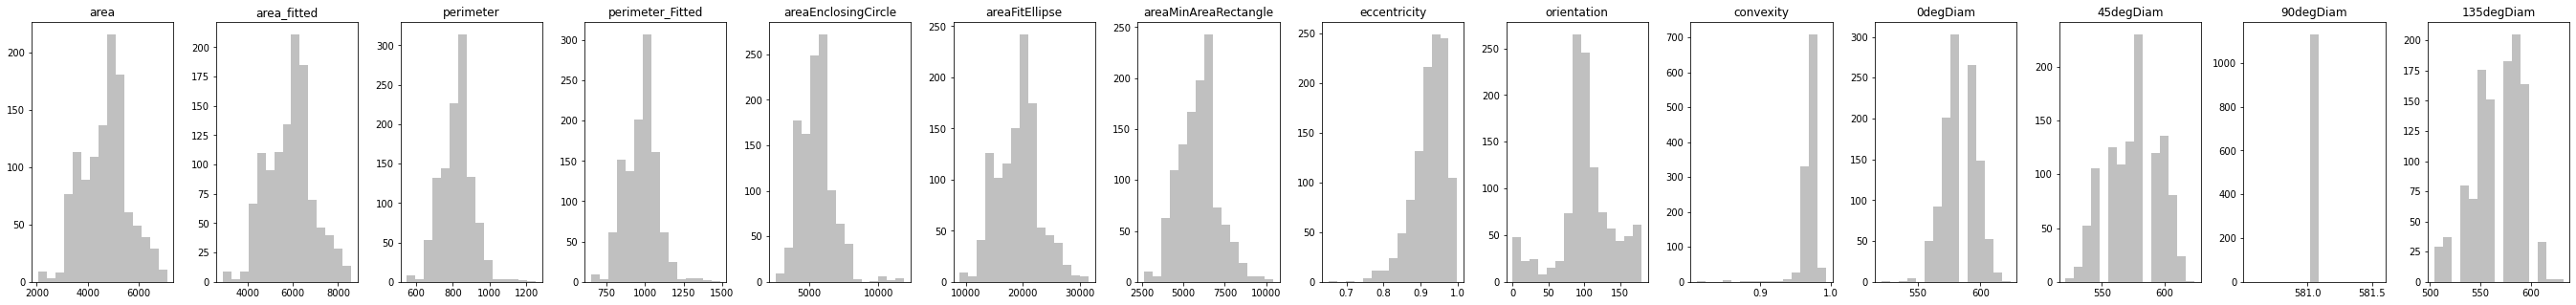

In [239]:
col=['green', 'blue', 'yellow', 'red', 'pink', 'orange', 'black', 'magenta', 'purple', 'silver']
dfl = (dfx[0][0].columns)
dfl0=dfl[3:(len(dfl))]

#for d in range(0, len(dfx[0])):
#    for f in range(0, len(dfx)):  
#        dff = dfx[f][d].copy(deep=False)
        #dff.hist(column=dfl0,
        #bins=15,               
        #grid=False,
        #figsize=(51, 5),
        #layout = (1, len(dfl0)+1),
        #orientation='vertical',
        #color=col[d]);
for d in range(0, len(dfx[0])):
    for f in range(0, len(dfx)):         
        dff = copy.deepcopy(dfx[f][d])       
        dff.hist(column=dfl0,
            bins=15,               
            grid=False,
            figsize=(51, 5),
            layout = (1, len(dfl0)+1),
            orientation='vertical',
            color=col[d]);

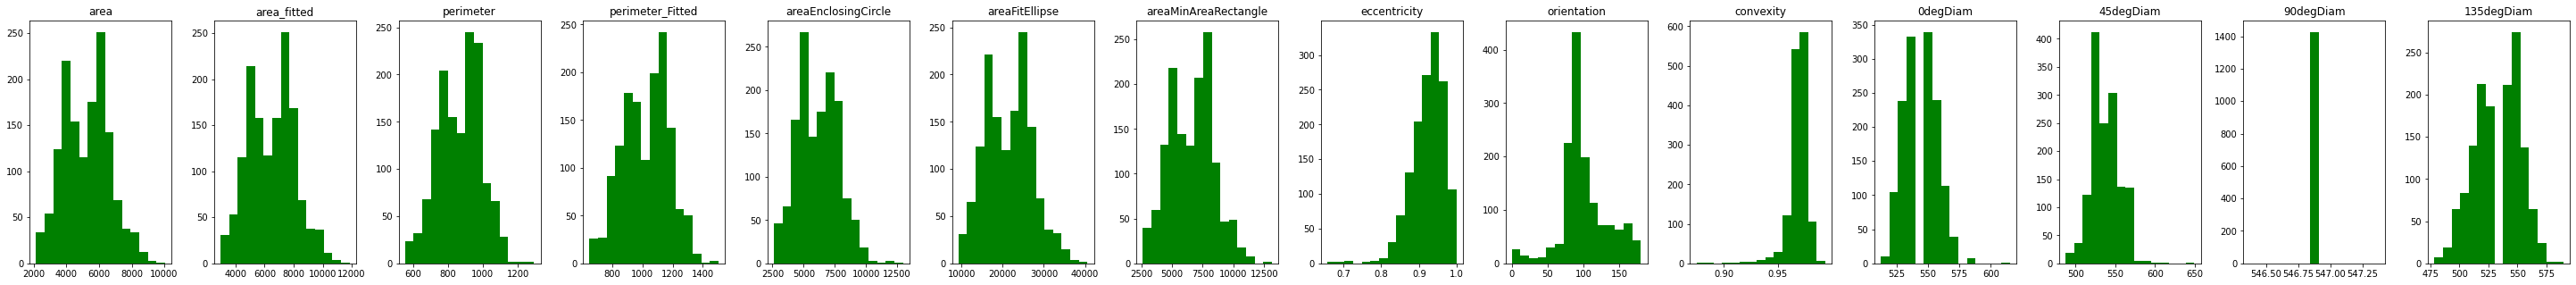

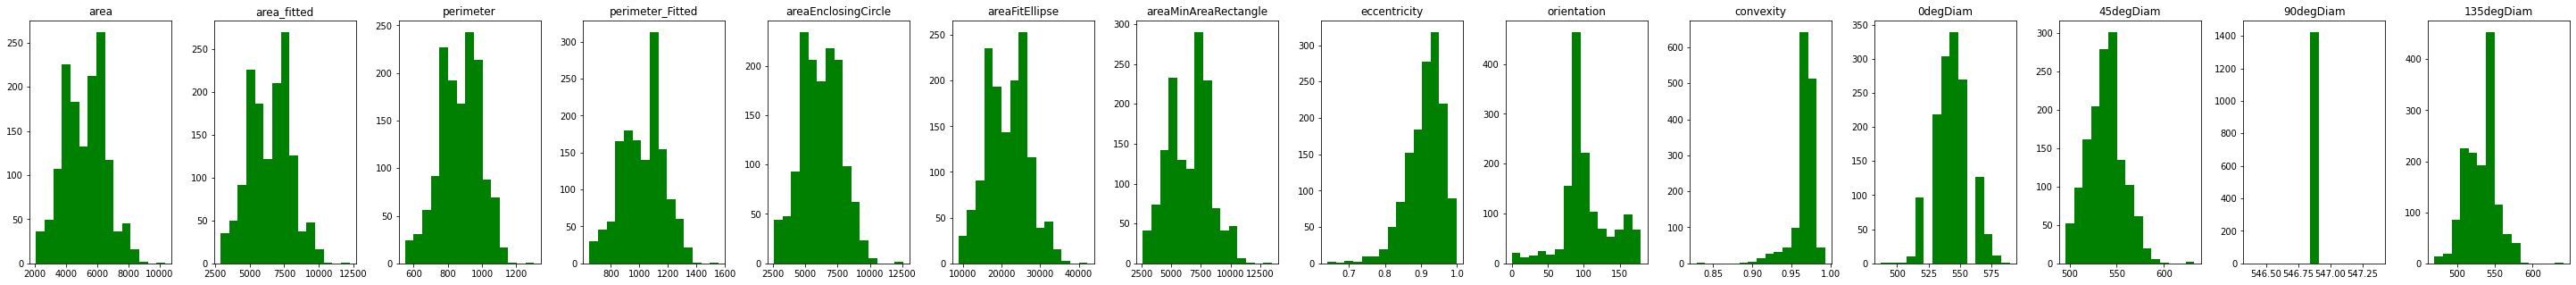

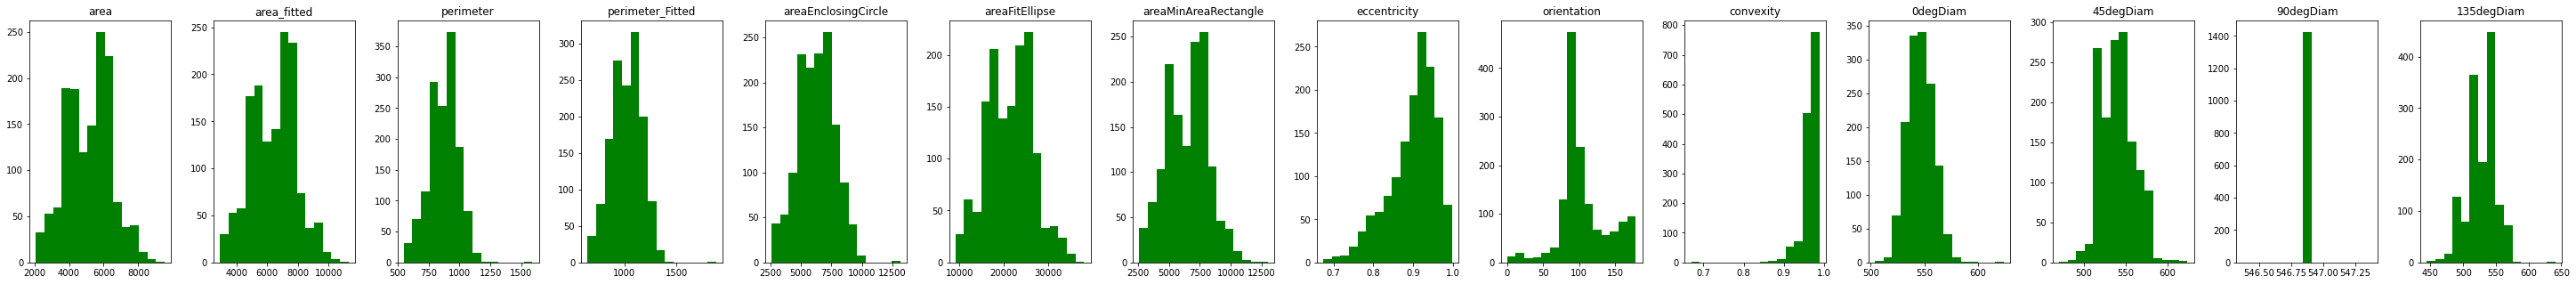

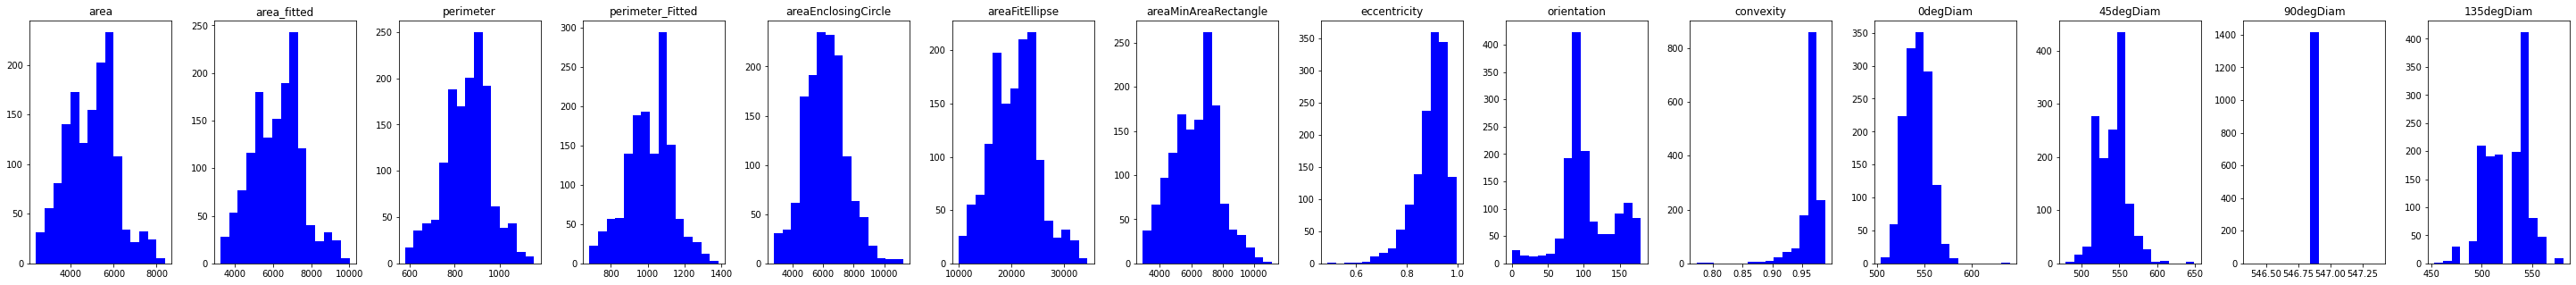

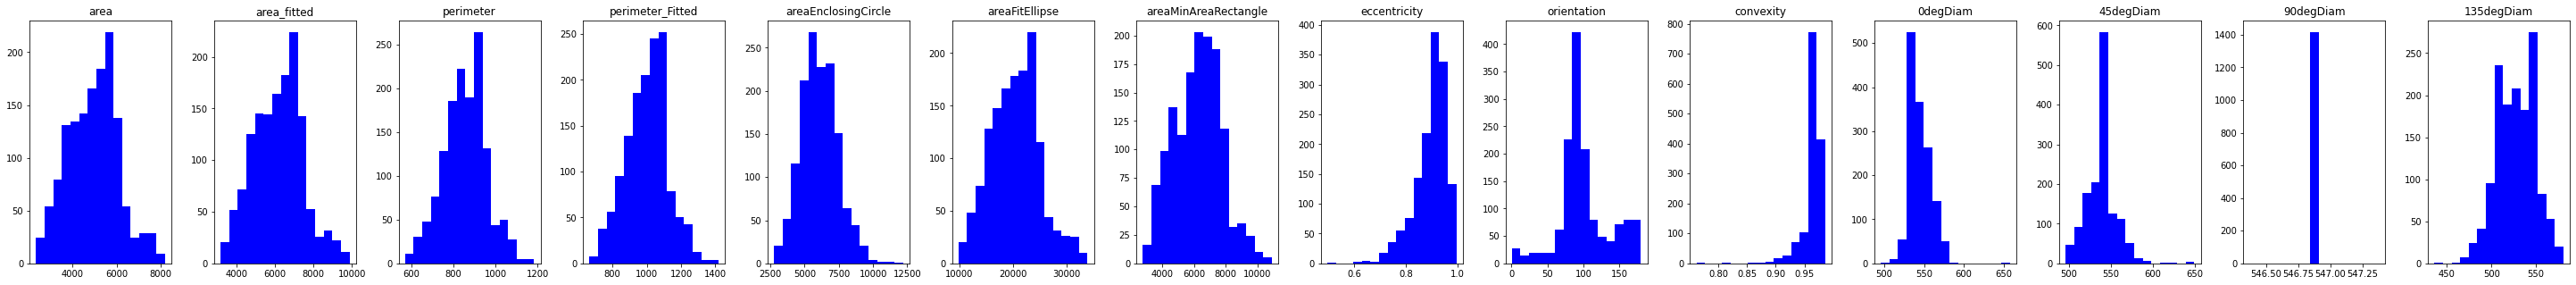

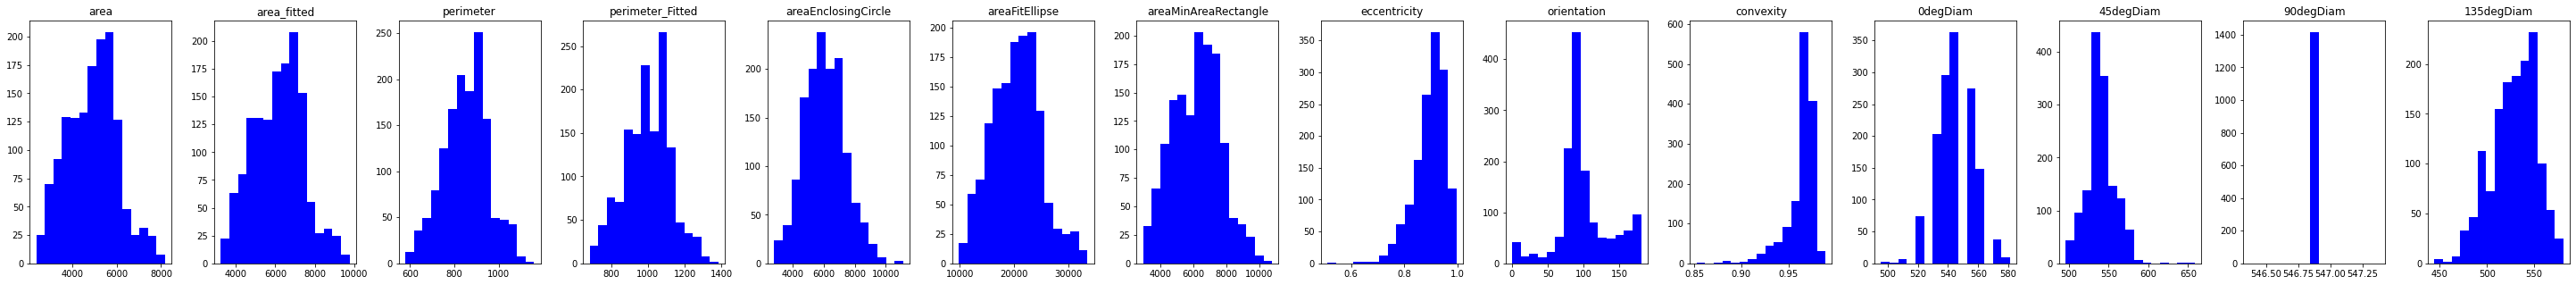

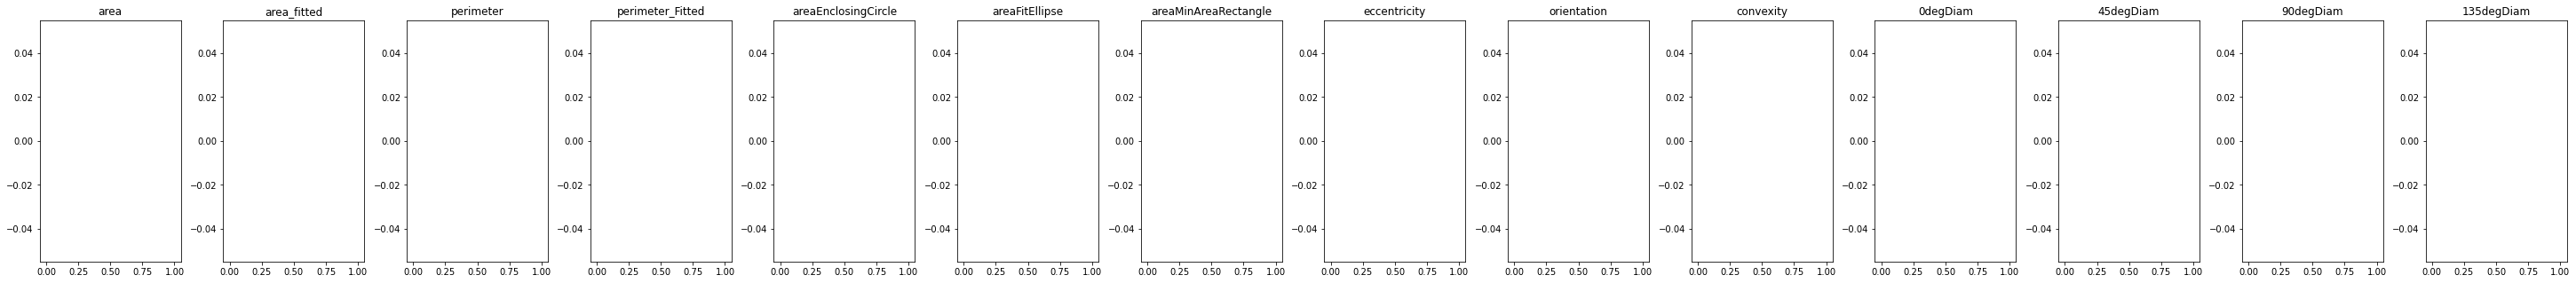

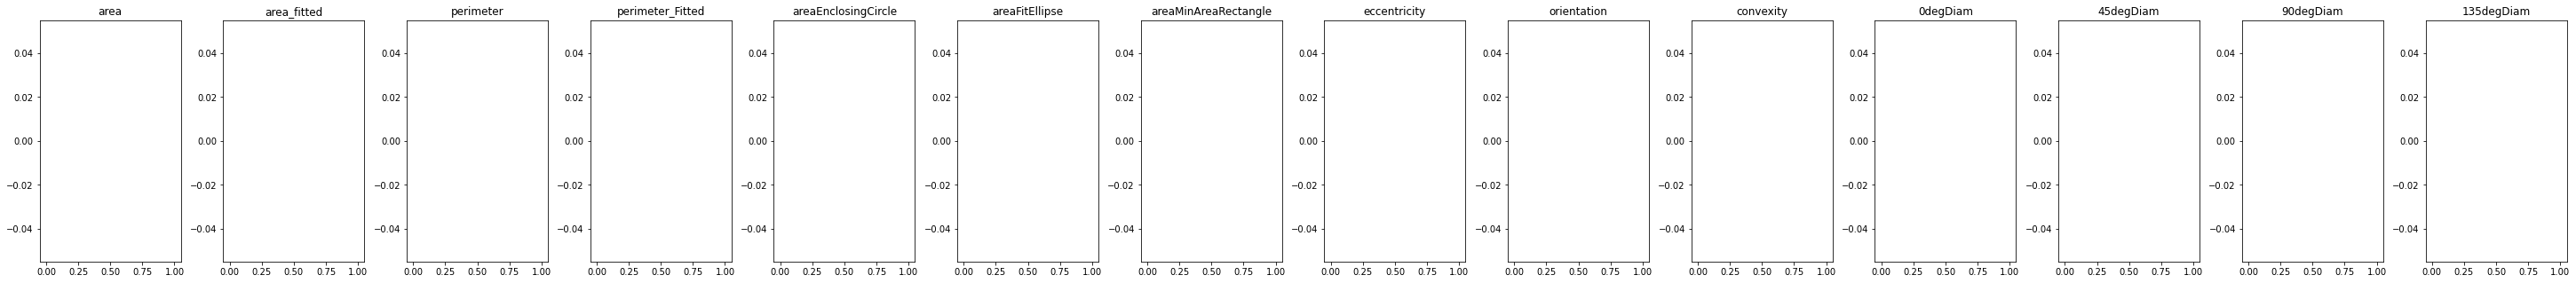

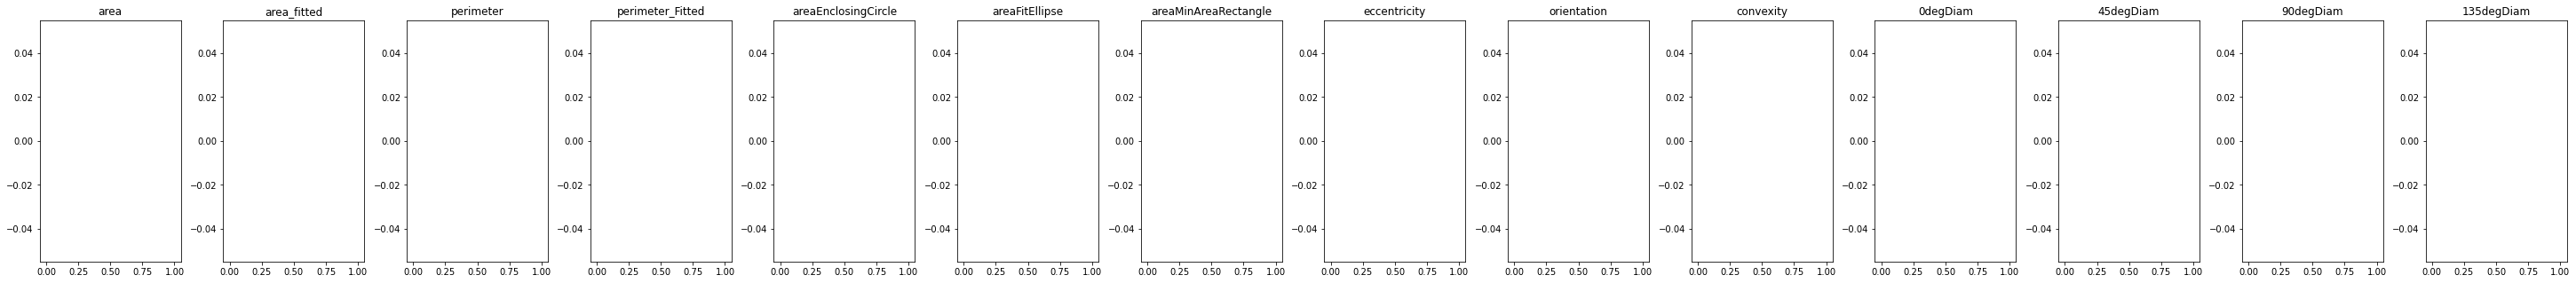

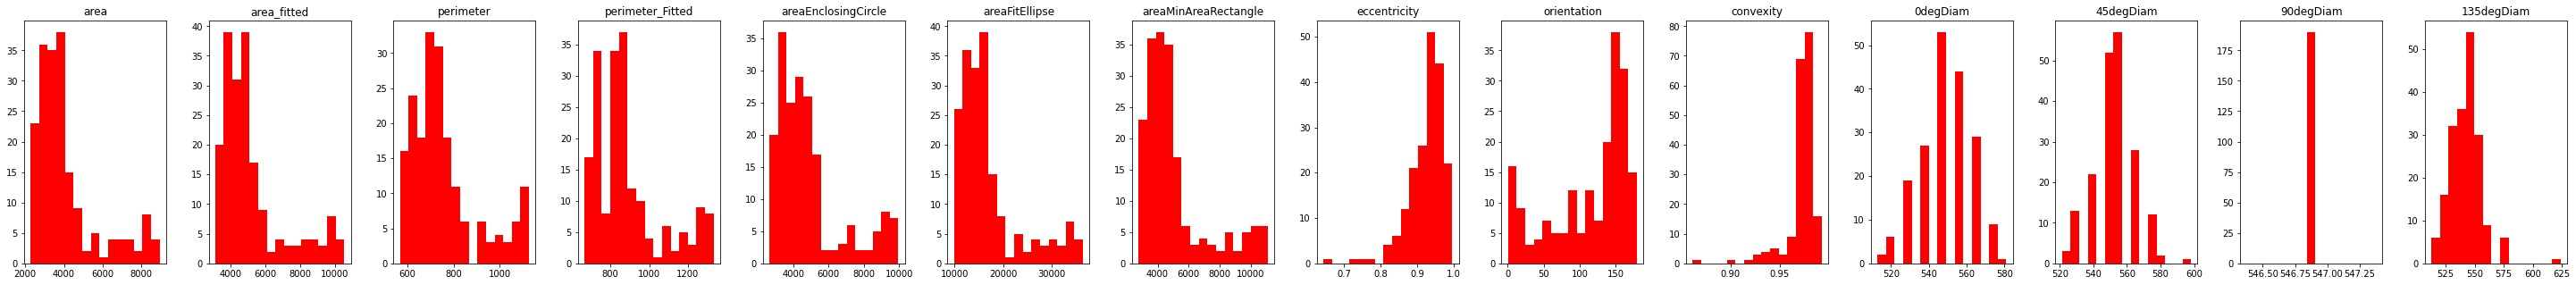

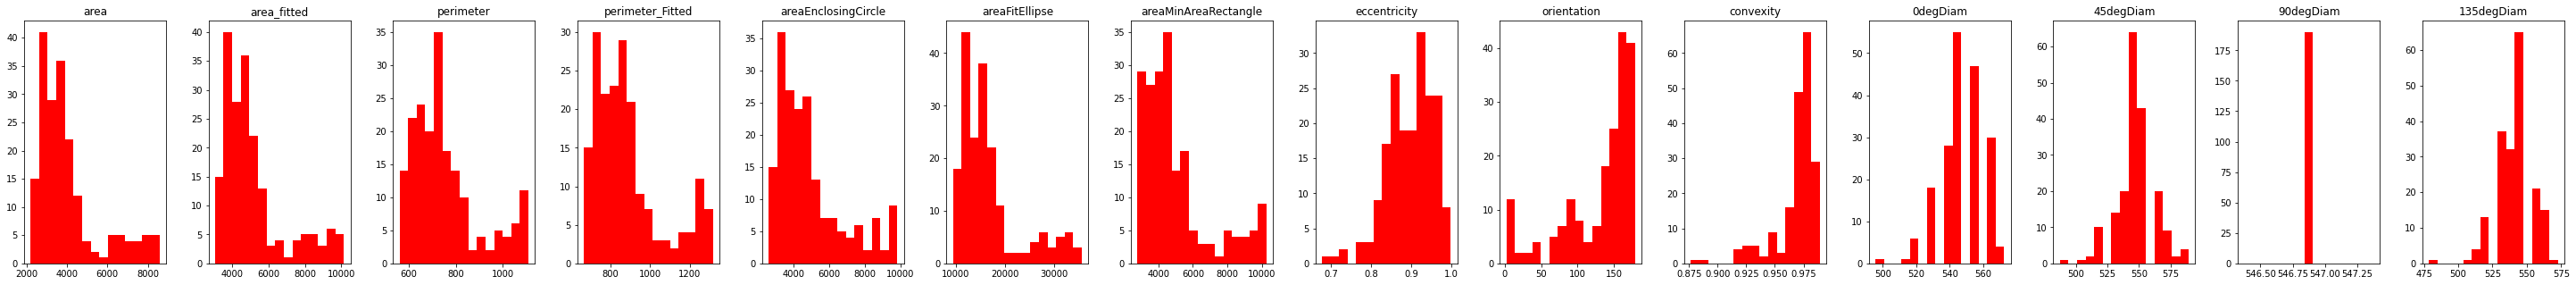

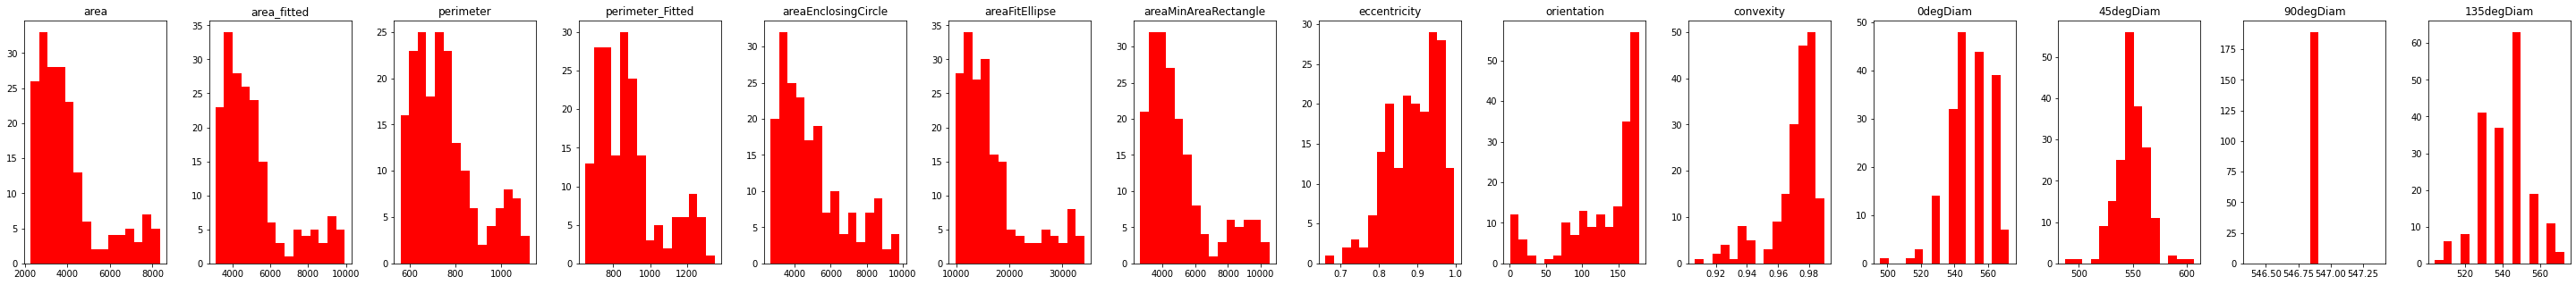

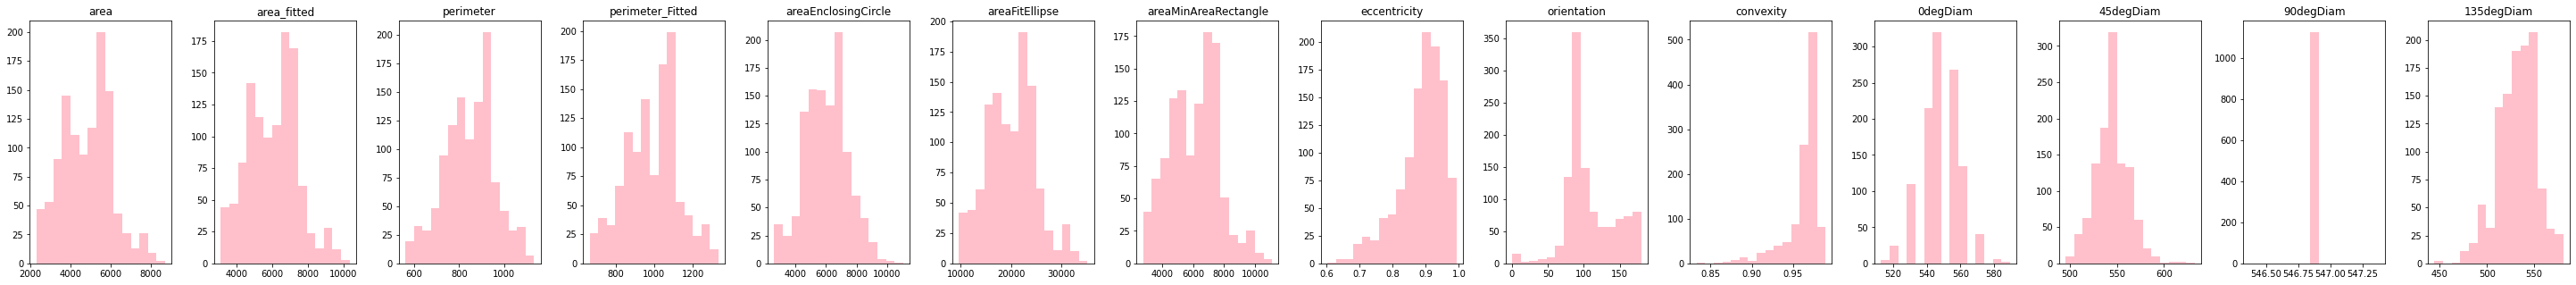

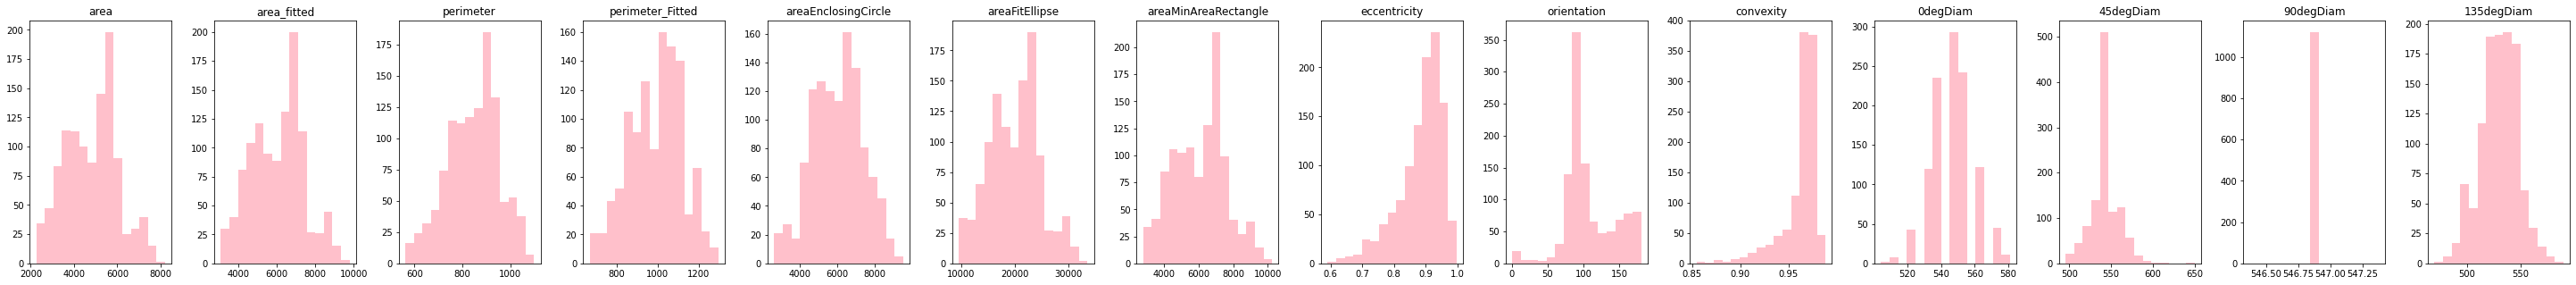

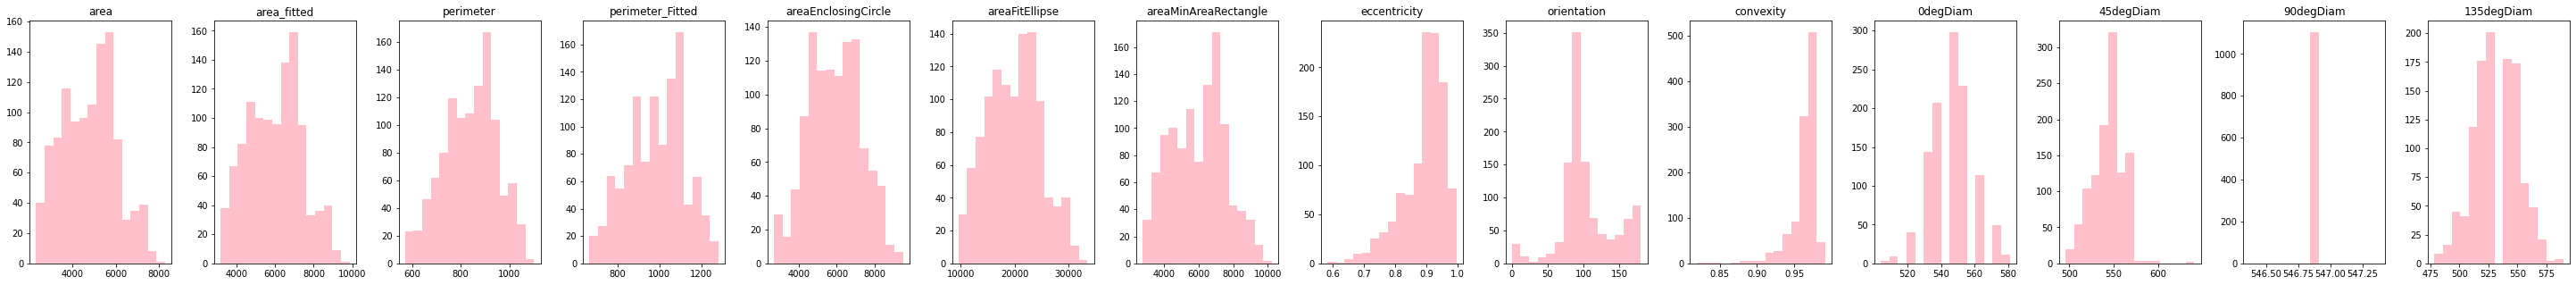

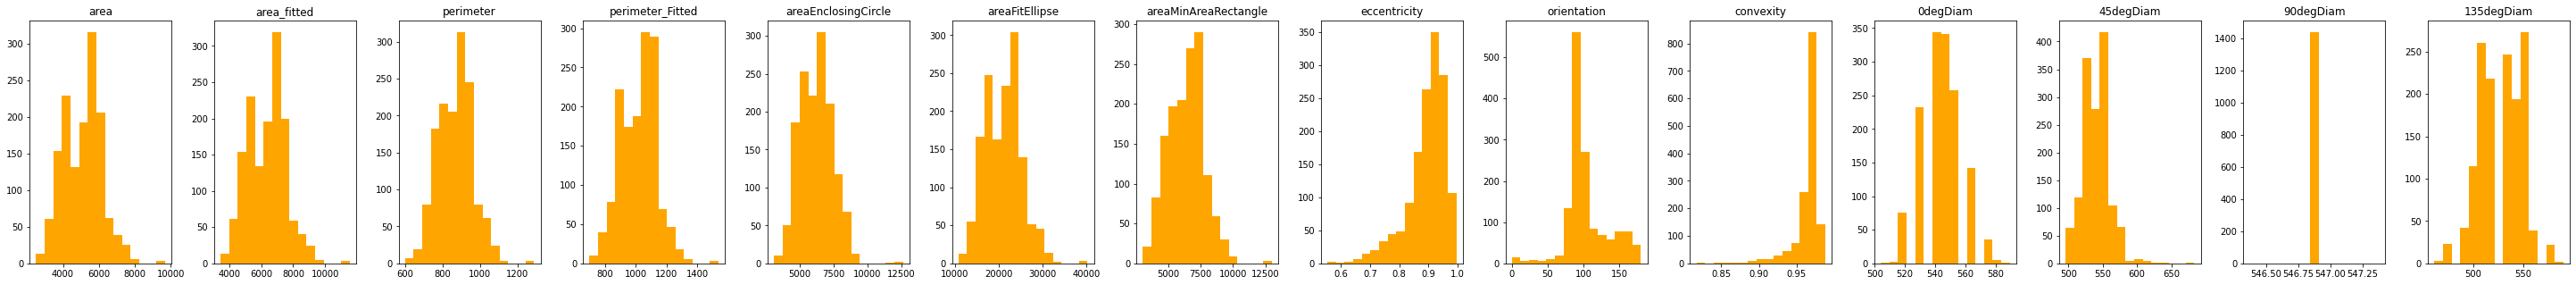

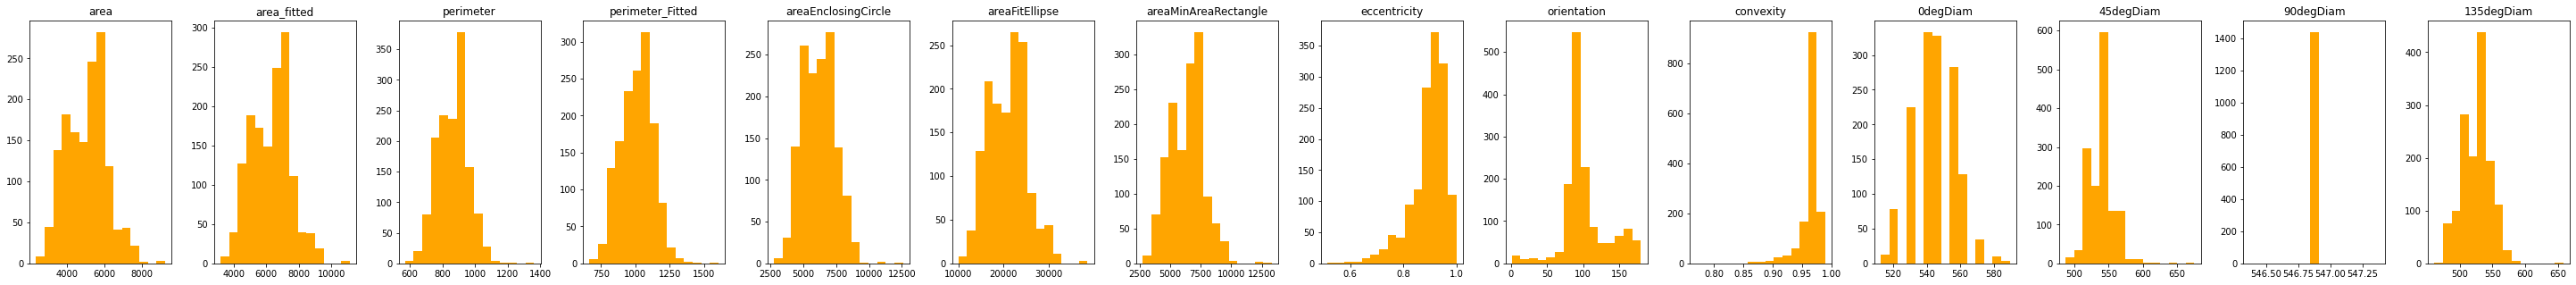

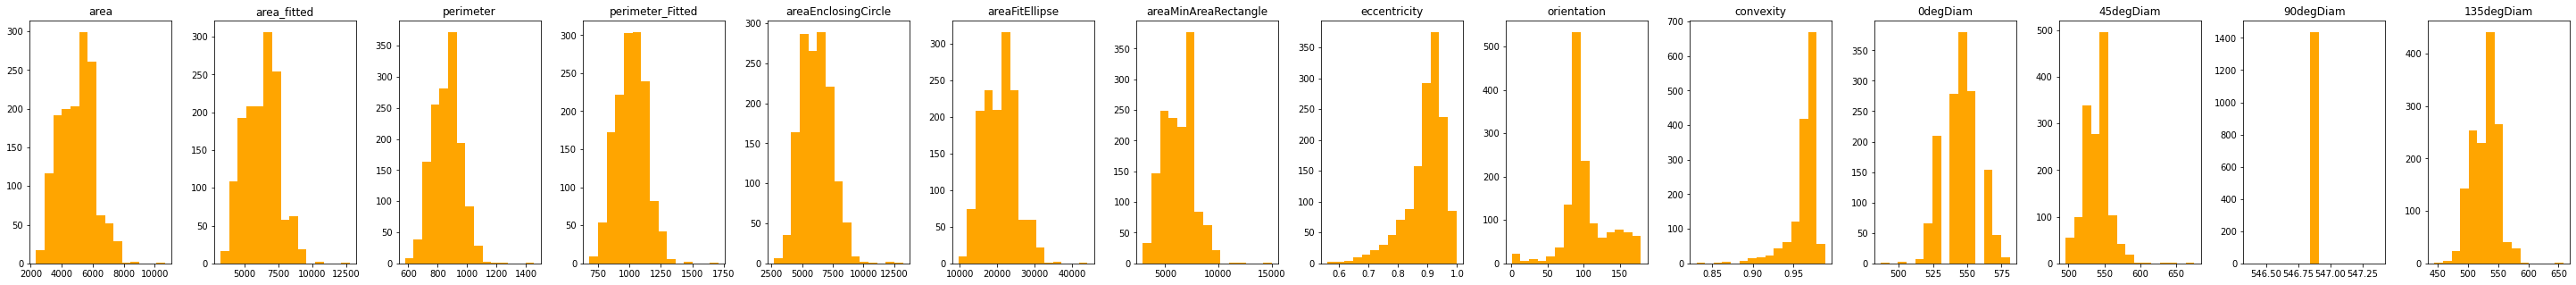

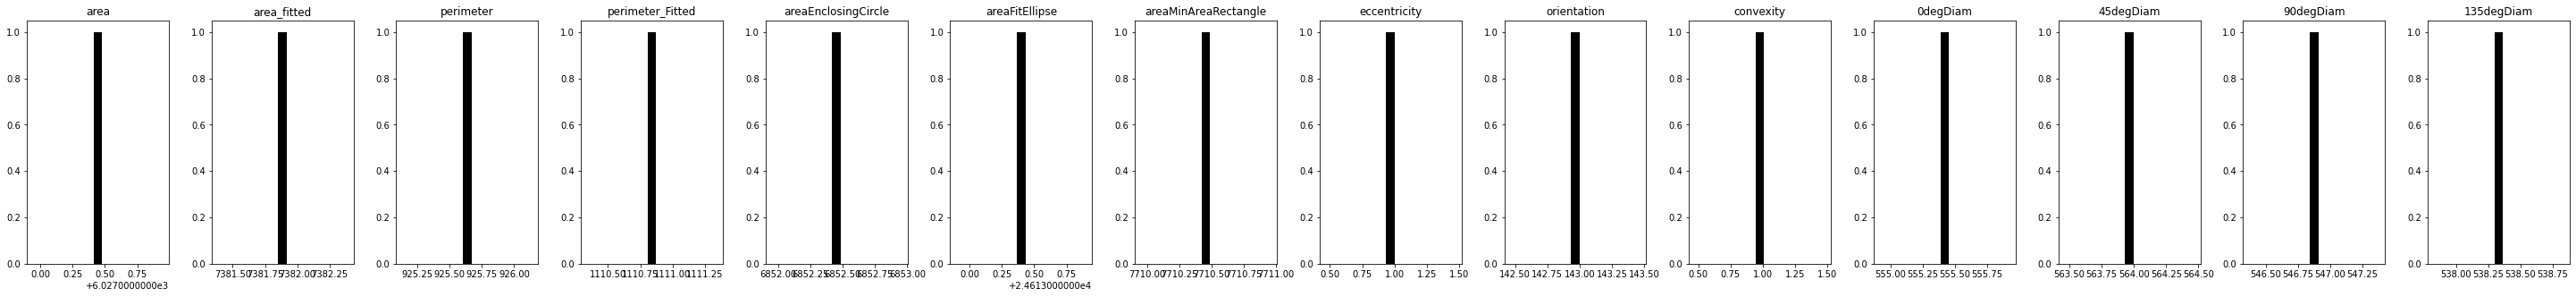

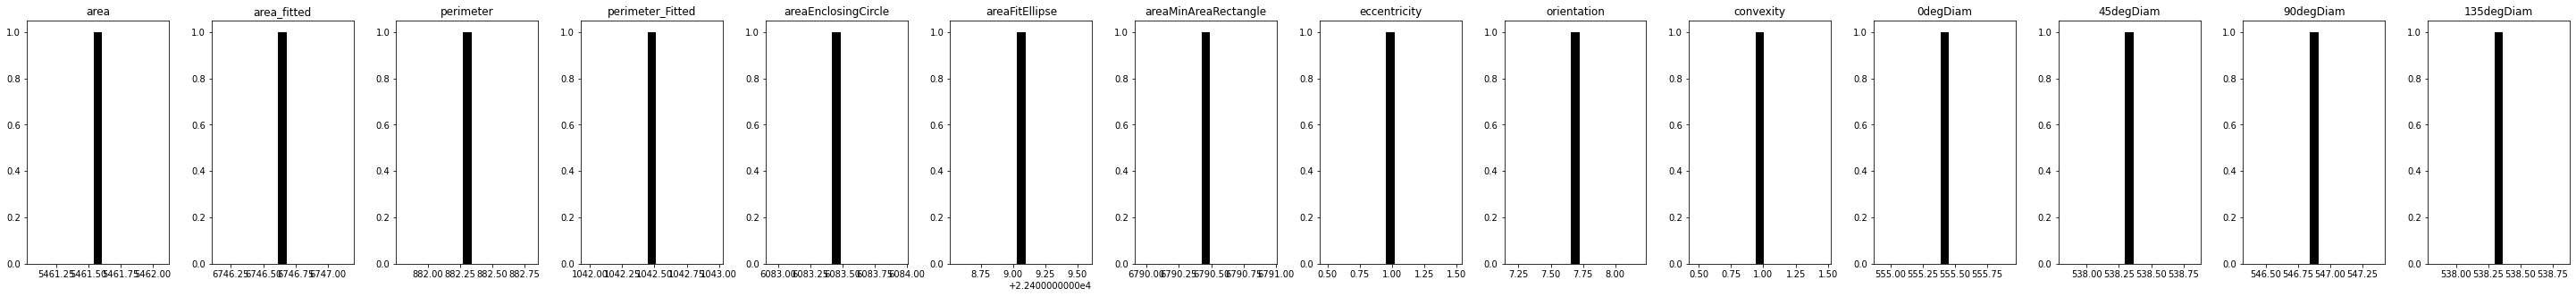

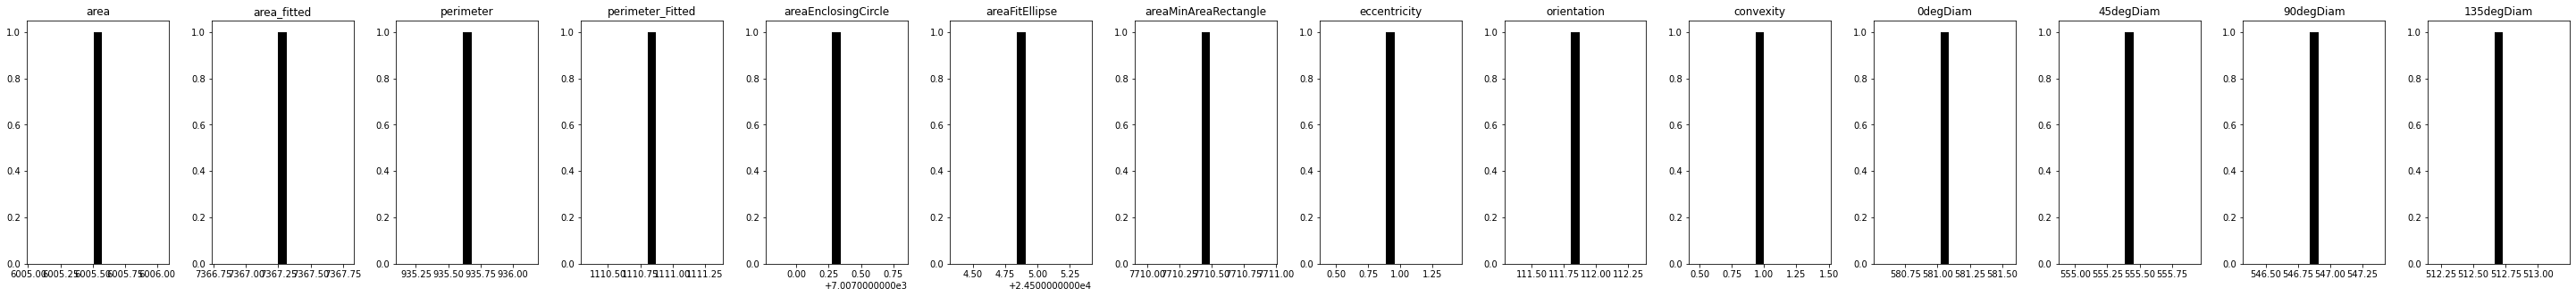

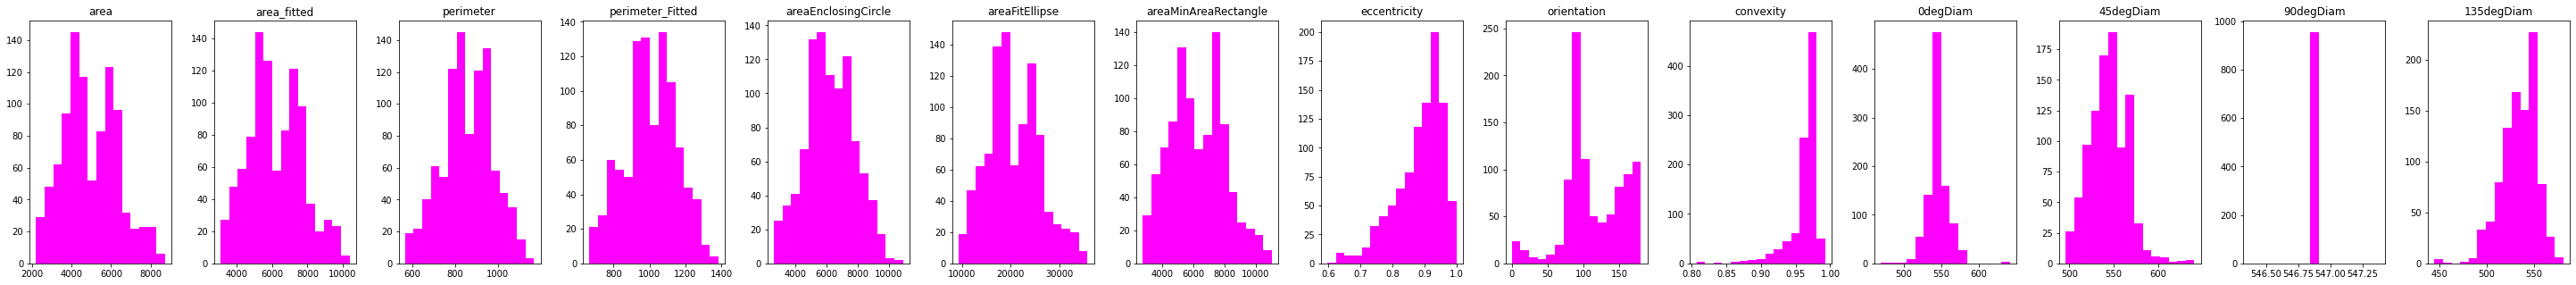

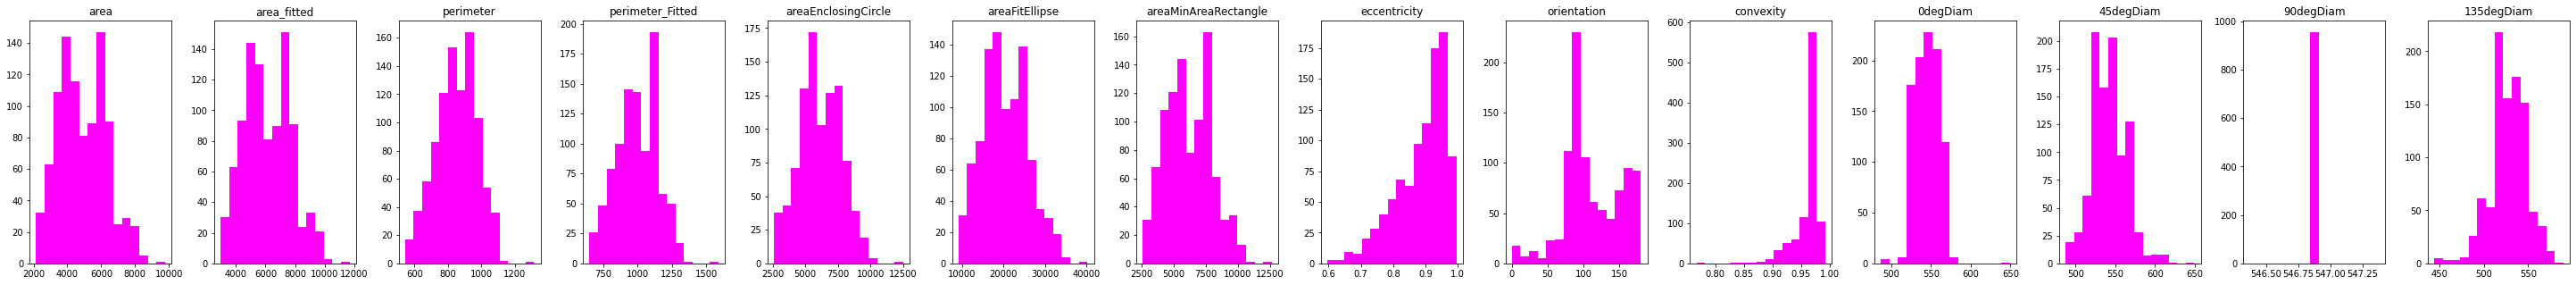

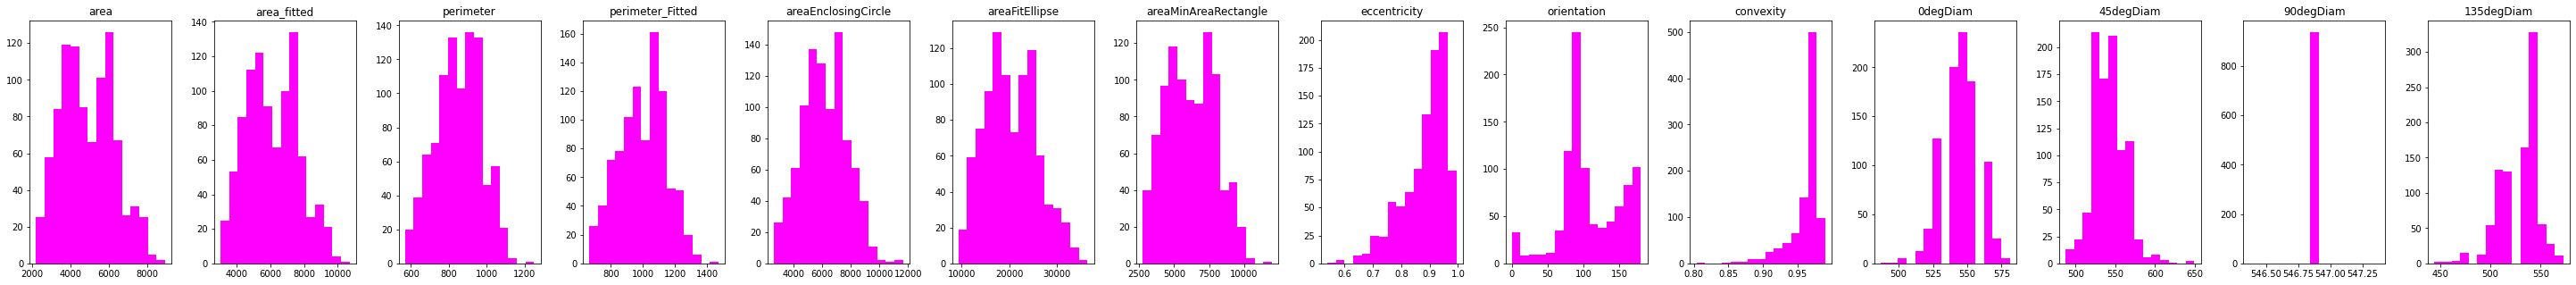

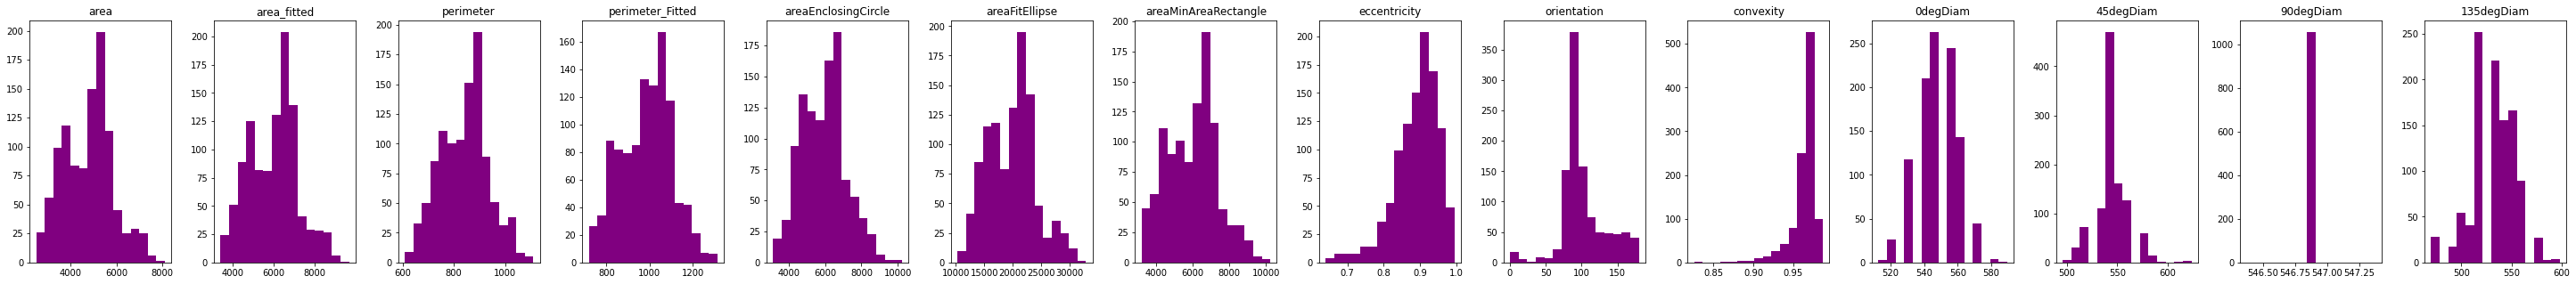

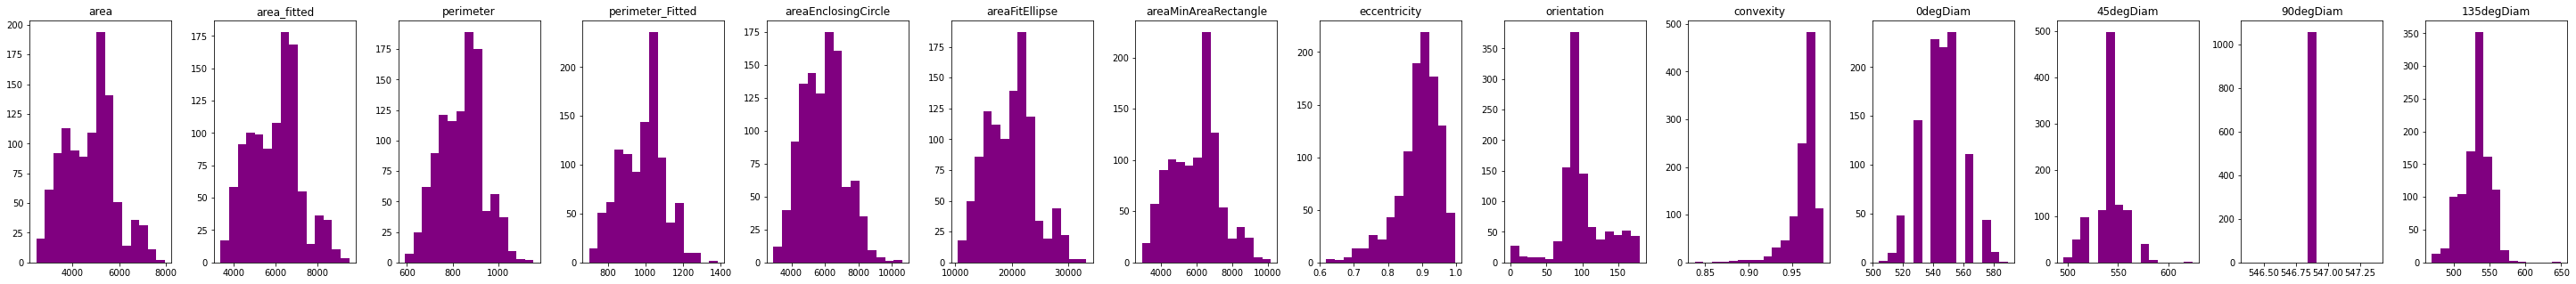

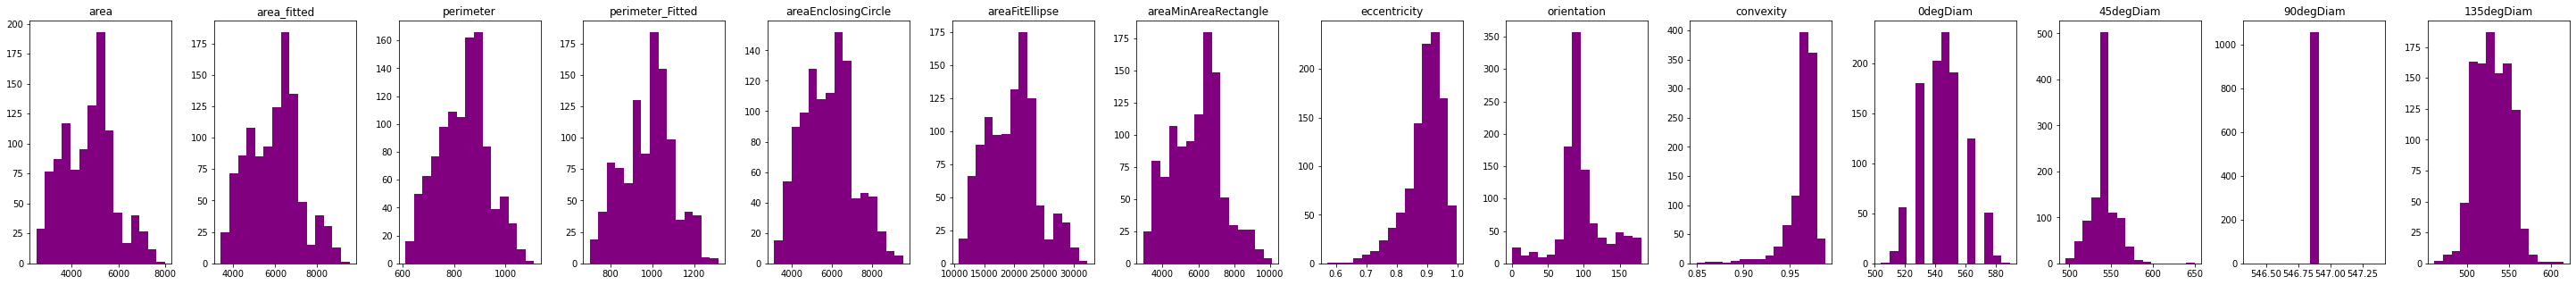

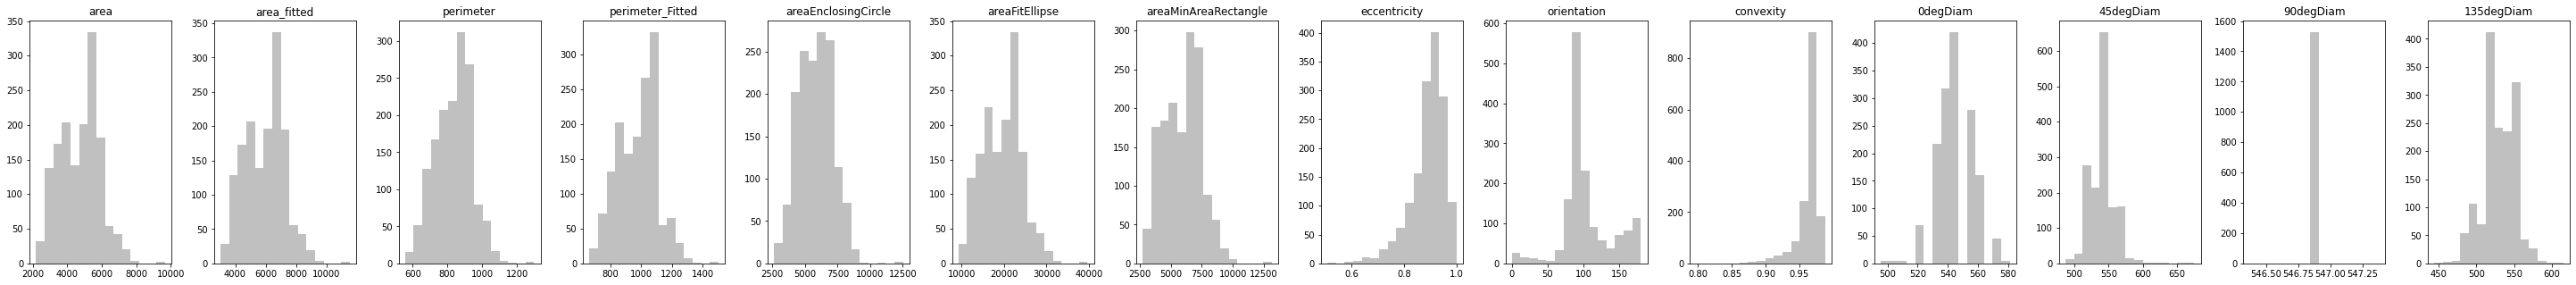

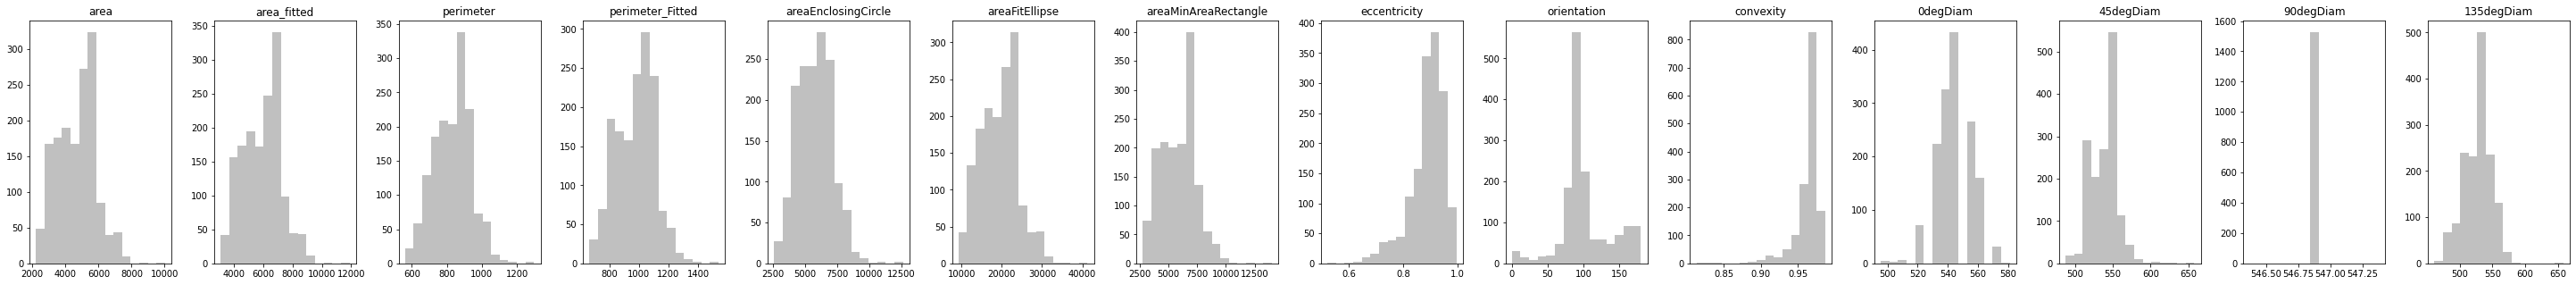

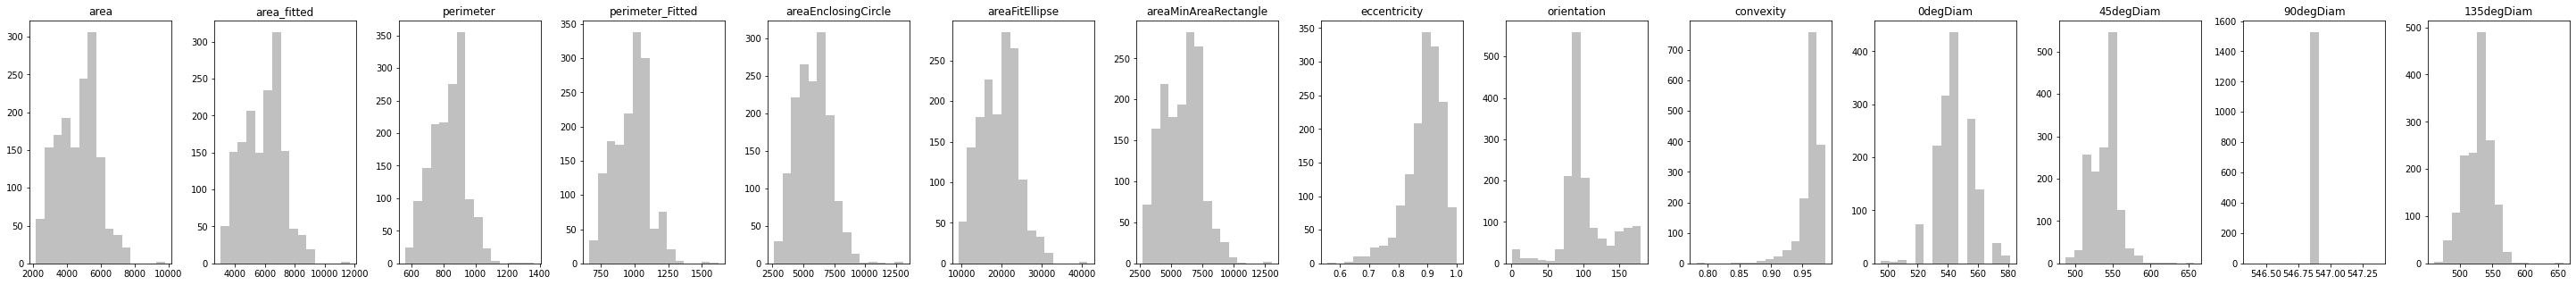

In [240]:
# do the same for enhanced data
for d in range(0, len(dfy[0])):
    for f in range(0, len(dfy)):  
        dff = dfy[f][d].copy(deep=False)
        dff.hist(column=dfl0, 
        bins=15,               
        grid=False,
        figsize=(51, 5),
        layout = (1, len(dfl0)),
        orientation='vertical',
        color=col[d]);

In [241]:
# for the purpose of exploring, let us normalize these dataframes
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = df[feature_name]
        if feature_name != 'file_name' and feature_name != 'label' and feature_name != 'location (X_Y)':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = 100*(df[feature_name] - min_value) / (max_value - min_value)
    return result


for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        #dfx[f][d] = normalize(dfx[f][d])
        dfx[f][d] = dfx[f][d].dropna(axis=1) # some features with constant values result in NaN after scaling and should be removed

#sorting by label
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        dfx[f][d].sort_values(by=['label'], inplace=True)


for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        #dfy[f][d] = normalize(dfy[f][d])
        dfy[f][d] = dfy[f][d].dropna(axis=1) # some features with constant values result in NaN after scaling and should be removed
        
#sorting by label
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):        
        dfy[f][d].sort_values(by=['label'], inplace=True)

In [242]:
#Let us calculate the mean of each feature in each file and put it in a dataframe
ddfx = copy.deepcopy(dfx)
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        ddfx[f][d] = ddfx[f][d].drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df=[]
for d in range(0, len(ddfx[0])):
    for f in range(0, len(ddfx)):
        answer = ddfx[f][d].mean(axis='index')
        df.append(pd.DataFrame(answer).transpose())    
dfx_mean = pd.concat(df) 

dfx_mean.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5108.832491  6354.275103  852.595190       1010.413669   
0  5115.053256  6362.817141  854.446281       1012.138464   
0  5063.804100  6307.462771  851.884616       1008.200182   
0  4753.958795  5966.601081  830.112161        980.821594   
0  4734.217579  5944.639709  828.516181        979.113483   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          5865.083232    20877.248432           6453.602553      0.942390   
0          5901.273042    20901.185117           6458.493690      0.938601   
0          5882.861519    20698.700952           6401.133275      0.935732   
0          5649.868849    19527.467073           6027.444921      0.924147   
0          5637.410090    19455.436121           5999.926910      0.924573   

0  orientation  convexity    0degDiam   45degDiam  90degDiam  135degDiam  
0   110.281694   0.972211  582.046446  577.238575   581.0547  569.958503  
0   109.723815   0.972070  582.448898  576.915175   581.0547  569.225466  
0   108.246848   0.970621  583.685002  577.245762   581.0547  568.981121  
0   101.213569   0.967642  582.956762  576.969551   581.0547  565.967784  
0    96.489640   0.967706  584.382941  575.715015   581.0547  566.178854

#### The histograms show that there are files (dataframes) with no data and columns with all data being same. Thease may give rise to NaN values when we normalize the data and/or calculate basic statistics such as mean and standard deviation.

#### Next step is to clean up dataframe of basic statistics and get rid of NaN

In [243]:
dfx_mean = dfx_mean.drop(['90degDiam'], axis=1)
dfx_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5108.832491  6354.275103  852.595190       1010.413669   
0  5115.053256  6362.817141  854.446281       1012.138464   
0  5063.804100  6307.462771  851.884616       1008.200182   
0  4753.958795  5966.601081  830.112161        980.821594   
0  4734.217579  5944.639709  828.516181        979.113483   
0  4718.667326  5928.385813  828.043464        978.371583   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0  4616.348294  5776.850071  792.837162        935.588346   
0  4728.661584  5913.306758  810.487530        955.741464   
0  4661.053185  5838.706762  806.230290        949.453691   
0  5401.060723  6691.163456  885.358798       1048.543608   
0  5326.743096  6609.141600  879.507574       1042.103501   
0  5290.731864  6570.244637  878.086045       1038.804910   
0  5336.384699  6615.352933  877.237758       1038.714577   
0  5305.486382  6582.334100  875.543797       1037.302363   
0  5240.104545  6510.437689  870.818710       1031.510236   
0  5169.511049  6410.777827  848.124808       1008.300795   
0  5074.590649  6323.158996  858.135805       1008.300795   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          5865.083232    20877.248432           6453.602553      0.942390   
0          5901.273042    20901.185117           6458.493690      0.938601   
0          5882.861519    20698.700952           6401.133275      0.935732   
0          5649.868849    19527.467073           6027.444921      0.924147   
0          5637.410090    19455.436121           5999.926910      0.924573   
0          5623.566592    19400.706606           5980.363264      0.922890   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0          5436.352896    19032.537231           5766.058940      0.923109   
0          5619.095103    19517.426383           5942.523876      0.922268   
0          5653.894575    19356.166482           5845.912759      0.912465   
0          6367.995520    22116.567299           6824.921547      0.914363   
0          6302.893254    21817.110227           6737.458719      0.911740   
0          6291.302627    21711.381365           6695.840666      0.913417   
0          6219.302197    21790.780157           6725.245269      0.924849   
0          6200.445993    21682.773038           6701.110446      0.923878   
0          6152.632208    21413.878271           6623.571088      0.920598   
0          5924.228688    21210.639077           6337.762562      0.935479   
0          5975.567678    20750.442241           6337.762562      0.914504   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   110.281694   0.972211  582.046446  577.238575  569.958503  
0   109.723815   0.972070  582.448898  576.915175  569.225466  
0   108.246848   0.970621  583.685002  577.245762  568.981121  
0   101.213569   0.967642  582.956762  576.969551  565.967784  
0    96.489640   0.967706  584.382941  575.715015  566.178854  
0    93.848909   0.967345  582.285860  575.866176  565.855572  
0          NaN        NaN         NaN         NaN         NaN  
0          NaN        NaN         NaN         NaN         NaN  
0          NaN        NaN         NaN         NaN         NaN  
0    95.629627   0.974897  580.812854  576.137331  572.348536  
0   109.983902   0.971168  579.200604  572.348539  569.124039  
0   103.554059   0.969725  581.618978  573.396506  567.673011  
0    94.492751   0.970693  584.007711  579.358267  564.593145  
0    94.031711   0.970295  584.259034  576.766518  563.305124  
0    92.101981   0.969184  582.923891  574.269015  562.990973  
0   101.713513   0.972154  582.569238  576.490572  564.

In [244]:
dfx_mean = dfx_mean.dropna(axis=0)
dfx_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5108.832491  6354.275103  852.595190       1010.413669   
0  5115.053256  6362.817141  854.446281       1012.138464   
0  5063.804100  6307.462771  851.884616       1008.200182   
0  4753.958795  5966.601081  830.112161        980.821594   
0  4734.217579  5944.639709  828.516181        979.113483   
0  4718.667326  5928.385813  828.043464        978.371583   
0  4616.348294  5776.850071  792.837162        935.588346   
0  4728.661584  5913.306758  810.487530        955.741464   
0  4661.053185  5838.706762  806.230290        949.453691   
0  5401.060723  6691.163456  885.358798       1048.543608   
0  5326.743096  6609.141600  879.507574       1042.103501   
0  5290.731864  6570.244637  878.086045       1038.804910   
0  5336.384699  6615.352933  877.237758       1038.714577   
0  5305.486382  6582.334100  875.543797       1037.302363   
0  5240.104545  6510.437689  870.818710       1031.510236   
0  5169.511049  6410.777827  848.124808       1008.300795   
0  5074.590649  6323.158996  858.135805       1008.300795   
0  5100.146141  6352.365273  863.141303       1008.300795   
0  5216.151686  6479.819877  866.345386       1025.448768   
0  5167.598734  6426.659982  863.697902       1020.536891   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          5865.083232    20877.248432           6453.602553      0.942390   
0          5901.273042    20901.185117           6458.493690      0.938601   
0          5882.861519    20698.700952           6401.133275      0.935732   
0          5649.868849    19527.467073           6027.444921      0.924147   
0          5637.410090    19455.436121           5999.926910      0.924573   
0          5623.566592    19400.706606           5980.363264      0.922890   
0          5436.352896    19032.537231           5766.058940      0.923109   
0          5619.095103    19517.426383           5942.523876      0.922268   
0          5653.894575    19356.166482           5845.912759      0.912465   
0          6367.995520    22116.567299           6824.921547      0.914363   
0          6302.893254    21817.110227           6737.458719      0.911740   
0          6291.302627    21711.381365           6695.840666      0.913417   
0          6219.302197    21790.780157           6725.245269      0.924849   
0          6200.445993    21682.773038           6701.110446      0.923878   
0          6152.632208    21413.878271           6623.571088      0.920598   
0          5924.228688    21210.639077           6337.762562      0.935479   
0          5975.567678    20750.442241           6337.762562      0.914504   
0          6038.649307    20791.704322           6337.762562      0.921105   
0          6123.660216    21347.170336           6601.979454      0.922184   
0          6109.529394    21211.185074           6537.974626      0.924279   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   110.281694   0.972211  582.046446  577.238575  569.958503  
0   109.723815   0.972070  582.448898  576.915175  569.225466  
0   108.246848   0.970621  583.685002  577.245762  568.981121  
0   101.213569   0.967642  582.956762  576.969551  565.967784  
0    96.489640   0.967706  584.382941  575.715015  566.178854  
0    93.848909   0.967345  582.285860  575.866176  565.855572  
0    95.629627   0.974897  580.812854  576.137331  572.348536  
0   109.983902   0.971168  579.200604  572.348539  569.124039  
0   103.554059   0.969725  581.618978  573.396506  567.673011  
0    94.492751   0.970693  584.007711  579.358267  564.593145  
0    94.031711   0.970295  584.259034  576.766518  563.305124  
0    92.101981   0.969184  582.923891  574.269015  562.990973  
0   101.713513   0.972154  582.569238  576.490572  564.578848  
0   100.321351   0.971413  583.490248  575.006723  562.900564  
0    99.776989   0.970941  583.039976  574.566684  562.307026  
0    88.810837   0.984017  572.509800  606.689500  623.

In [245]:
#Let us calculate the standard deviation of each feature in each file and put it in a dataframe    
df=[]
for d in range(0, len(ddfx[0])):
    for f in range(0, len(ddfx)):
        answer = ddfx[f][d].std()
        df.append(pd.DataFrame(answer).transpose())    
dfx_std = pd.concat(df) 

dfx_std.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1242.591405  1394.977548  109.185467        133.938216   
0  1189.822352  1334.120686  103.201583        127.041051   
0  1192.853577  1337.413877  103.684028        127.176358   
0  1058.632136  1192.099588   97.369502        117.311000   
0  1049.180851  1184.382610   99.004236        119.183470   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1364.569684     4970.748085           1622.871194      0.028724   
0          1293.308745     4751.664665           1550.042042      0.029569   
0          1316.770017     4777.285035           1543.041326      0.033052   
0          1308.751922     4323.715056           1377.680580      0.044074   
0          1355.757733     4339.230201           1378.652905      0.043849   

0  orientation  convexity   0degDiam  45degDiam     90degDiam  135degDiam  
0    37.266401   0.006695  13.066664  19.289288  0.000000e+00   18.360671  
0    38.457653   0.006415  13.020399  18.741605  0.000000e+00   17.074282  
0    38.430240   0.007550  13.367420  18.601361  0.000000e+00   17.942899  
0    48.009422   0.012880  13.643985  20.634118  1.137348e-13   21.253267  
0    47.433749   0.013524  13.471333  20.685115  0.000000e+00   22.465947

In [246]:
dfx_std = dfx_std.drop(['90degDiam'], axis=1)
dfx_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1242.591405  1394.977548  109.185467        133.938216   
0  1189.822352  1334.120686  103.201583        127.041051   
0  1192.853577  1337.413877  103.684028        127.176358   
0  1058.632136  1192.099588   97.369502        117.311000   
0  1049.180851  1184.382610   99.004236        119.183470   
0  1027.538611  1159.059146   96.494180        116.435372   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0  2136.948330  2406.854066  195.618011        232.692924   
0  2083.114737  2353.273847  196.315329        234.545986   
0  2053.559833  2315.029031  192.040892        227.800452   
0   774.002353   867.904106   70.436066         84.243249   
0   771.792223   865.063576   69.541657         84.080945   
0   794.384144   895.744760   76.964521         91.876141   
0   745.364404   833.000367   63.498155         77.161046   
0   756.644121   846.241878   65.987317         79.139183   
0   754.655878   845.866722   66.738753         80.945216   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1364.569684     4970.748085           1622.871194      0.028724   
0          1293.308745     4751.664665           1550.042042      0.029569   
0          1316.770017     4777.285035           1543.041326      0.033052   
0          1308.751922     4323.715056           1377.680580      0.044074   
0          1355.757733     4339.230201           1378.652905      0.043849   
0          1308.821521     4229.129938           1342.590757      0.046342   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0          2511.212791     8612.337421           2740.929811      0.049038   
0          2542.772722     8507.085975           2730.538711      0.047704   
0          2572.226673     8414.109031           2646.545114      0.055237   
0          1052.648825     3245.829971           1037.402928      0.044836   
0          1076.823492     3185.639849           1035.685382      0.048557   
0          1207.379294     3435.100558           1085.198244      0.045038   
0           880.054814     2993.058099            973.289166      0.039088   
0           950.634091     3088.004826            980.671920      0.040601   
0           957.415432     3077.882486            992.858704      0.042801   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    37.266401   0.006695  13.066664  19.289288   18.360671  
0    38.457653   0.006415  13.020399  18.741605   17.074282  
0    38.430240   0.007550  13.367420  18.601361   17.942899  
0    48.009422   0.012880  13.643985  20.634118   21.253267  
0    47.433749   0.013524  13.471333  20.685115   22.465947  
0    47.038834   0.014526  13.619963  21.154237   22.527076  
0          NaN        NaN        NaN        NaN         NaN  
0          NaN        NaN        NaN        NaN         NaN  
0          NaN        NaN        NaN        NaN         NaN  
0    44.788755   0.010433  11.339652  15.100169   14.199873  
0    40.158213   0.017568  10.482265  15.465684   19.113553  
0    39.991139   0.021614  11.630958  15.282406   16.803386  
0    24.077165   0.012740  13.145124  22.379266   21.691210  
0    24.263003   0.013030  14.359859  22.026297   22.654550  
0    25.376938   0.015516  14.432105  22.973379   22.903003  
0    26.245598   0.005474  13.706183  23.316494   21.121583  
0    26.701247   0.008616

In [247]:
dfx_std=dfx_std.dropna(axis=0)
dfx_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1242.591405  1394.977548  109.185467        133.938216   
0  1189.822352  1334.120686  103.201583        127.041051   
0  1192.853577  1337.413877  103.684028        127.176358   
0  1058.632136  1192.099588   97.369502        117.311000   
0  1049.180851  1184.382610   99.004236        119.183470   
0  1027.538611  1159.059146   96.494180        116.435372   
0  2136.948330  2406.854066  195.618011        232.692924   
0  2083.114737  2353.273847  196.315329        234.545986   
0  2053.559833  2315.029031  192.040892        227.800452   
0   774.002353   867.904106   70.436066         84.243249   
0   771.792223   865.063576   69.541657         84.080945   
0   794.384144   895.744760   76.964521         91.876141   
0   745.364404   833.000367   63.498155         77.161046   
0   756.644121   846.241878   65.987317         79.139183   
0   754.655878   845.866722   66.738753         80.945216   
0  1214.671822  1358.996000  104.495271        127.151237   
0  1236.706266  1387.723863  110.003952        132.493019   
0  1240.926584  1393.376595  111.205365        133.516571   
0   843.482542   950.086306   79.673949         95.802253   
0   868.409430   979.684078   82.453257        100.330398   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1364.569684     4970.748085           1622.871194      0.028724   
0          1293.308745     4751.664665           1550.042042      0.029569   
0          1316.770017     4777.285035           1543.041326      0.033052   
0          1308.751922     4323.715056           1377.680580      0.044074   
0          1355.757733     4339.230201           1378.652905      0.043849   
0          1308.821521     4229.129938           1342.590757      0.046342   
0          2511.212791     8612.337421           2740.929811      0.049038   
0          2542.772722     8507.085975           2730.538711      0.047704   
0          2572.226673     8414.109031           2646.545114      0.055237   
0          1052.648825     3245.829971           1037.402928      0.044836   
0          1076.823492     3185.639849           1035.685382      0.048557   
0          1207.379294     3435.100558           1085.198244      0.045038   
0           880.054814     2993.058099            973.289166      0.039088   
0           950.634091     3088.004826            980.671920      0.040601   
0           957.415432     3077.882486            992.858704      0.042801   
0          1357.719365     4883.402189           1545.154921      0.041581   
0          1504.282351     5049.089254           1592.838907      0.042954   
0          1554.042693     5094.505184           1605.851700      0.040527   
0          1202.373582     3530.298053           1117.771415      0.046636   
0          1216.232459     3627.893383           1159.950914      0.045315   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    37.266401   0.006695  13.066664  19.289288   18.360671  
0    38.457653   0.006415  13.020399  18.741605   17.074282  
0    38.430240   0.007550  13.367420  18.601361   17.942899  
0    48.009422   0.012880  13.643985  20.634118   21.253267  
0    47.433749   0.013524  13.471333  20.685115   22.465947  
0    47.038834   0.014526  13.619963  21.154237   22.527076  
0    44.788755   0.010433  11.339652  15.100169   14.199873  
0    40.158213   0.017568  10.482265  15.465684   19.113553  
0    39.991139   0.021614  11.630958  15.282406   16.803386  
0    24.077165   0.012740  13.145124  22.379266   21.691210  
0    24.263003   0.013030  14.359859  22.026297   22.654550  
0    25.376938   0.015516  14.432105  22.973379   22.903003  
0    26.245598   0.005474  13.706183  23.316494   21.121583  
0    26.701247   0.008616  13.358098  22.410745   21.591693  
0    28.882063   0.008405  13.568671  22.628290   22.790112  
0    44.080130   0.011067  12.877074  18.675278   18.501748  
0    44.561253   0.012801

In [248]:
#Let us calculate the mean of each feature in each file and put it in a dataframe
ddfy = copy.deepcopy(dfy)
for f in range(0, len(dfx)):
    for d in range(0, len(dfy[f])):
        ddfy[f][d] = ddfy[f][d].drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df=[]
for d in range(0, len(ddfy[0])):
    for f in range(0, len(ddfy)):
        answer = ddfy[f][d].mean(axis='index')
        df.append(pd.DataFrame(answer).transpose())    
dfy_mean = pd.concat(df)  

dfy_mean.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5238.778672  6504.095569  869.773232       1024.108302   
0  5214.518579  6482.105385  872.096617       1025.606814   
0  5161.896922  6427.276812  871.274699       1022.704236   
0  4975.973055  6223.154310  858.297739       1006.780089   
0  4955.445126  6199.202481  856.050582       1003.642123   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          6179.330675    21503.188353           6607.527570      0.923267   
0          6242.107843    21478.648713           6570.770949      0.911080   
0          6280.497209    21337.642465           6508.878027      0.899467   
0          6157.193225    20605.508689           6292.399877      0.894719   
0          6101.601117    20525.124796           6246.660722      0.896664   

0  orientation  convexity    0degDiam   45degDiam  90degDiam  135degDiam  
0   100.348088   0.968820  543.663168  537.760819    546.875  532.421740  
0   103.240644   0.966645  544.587149  539.705195    546.875  531.238336  
0   104.908733   0.964428  545.225982  540.878565    546.875  529.071584  
0   104.268870   0.963465  544.889636  539.929235    546.875  525.989429  
0   100.337985   0.963615  545.577575  539.724061    546.875  528.342903

In [249]:
dfy_mean=dfy_mean.drop(['90degDiam'], axis=1)
dfy_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5238.778672  6504.095569  869.773232       1024.108302   
0  5214.518579  6482.105385  872.096617       1025.606814   
0  5161.896922  6427.276812  871.274699       1022.704236   
0  4975.973055  6223.154310  858.297739       1006.780089   
0  4955.445126  6199.202481  856.050582       1003.642123   
0  4911.047873  6149.416711  852.308928        998.995520   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0  4083.441049  5192.453349  757.718602        888.941727   
0  4017.573208  5124.894618  756.443918        887.772422   
0  4013.603094  5117.434248  754.672538        883.517807   
0  4840.622408  6070.771329  846.307788        992.076837   
0  4826.171201  6055.534661  845.615326        991.775023   
0  4785.441230  6005.653166  839.492928        983.006588   
0  5100.014124  6362.621997  869.161864       1020.684396   
0  5051.751665  6307.332159  864.483358       1014.112293   
0  4990.599721  6239.968902  859.856745       1008.895845   
0  6027.445440  7381.886541  925.636373       1110.839859   
0  5461.573821  6746.650014  882.304495       1042.480483   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          6179.330675    21503.188353           6607.527570      0.923267   
0          6242.107843    21478.648713           6570.770949      0.911080   
0          6280.497209    21337.642465           6508.878027      0.899467   
0          6157.193225    20605.508689           6292.399877      0.894719   
0          6101.601117    20525.124796           6246.660722      0.896664   
0          6049.065497    20352.565595           6180.924862      0.896740   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0          4872.987460    16934.714194           5066.120331      0.925830   
0          4900.289874    16687.995896           5016.132314      0.897387   
0          4939.825309    16695.298772           4979.799194      0.890272   
0          6029.225652    20125.462532           6099.546362      0.885818   
0          6010.132404    20029.805296           6090.652344      0.884378   
0          5907.809472    19871.154148           6006.217153      0.891346   
0          6258.151309    21082.047794           6439.882051      0.893945   
0          6192.734902    20902.206544           6367.384130      0.895582   
0          6151.507797    20642.780536           6293.195252      0.892399   
0          6852.452930    24613.399776           7710.456745      0.970038   
0          6083.454545    22409.064518           6790.459321      0.987990   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   100.348088   0.968820  543.663168  537.760819  532.421740  
0   103.240644   0.966645  544.587149  539.705195  531.238336  
0   104.908733   0.964428  545.225982  540.878565  529.071584  
0   104.268870   0.963465  544.889636  539.929235  525.989429  
0   100.337985   0.963615  545.577575  539.724061  528.342903  
0    99.477407   0.963370  545.402571  541.015454  527.504101  
0          NaN        NaN         NaN         NaN         NaN  
0          NaN        NaN         NaN         NaN         NaN  
0          NaN        NaN         NaN         NaN         NaN  
0   114.531751   0.971893  548.763874  551.642161  542.512596  
0   130.535950   0.968960  548.089273  548.673927  541.478211  
0   129.687162   0.970521  549.768512  549.180769  541.359238  
0   107.512612   0.962094  548.090276  546.085070  530.894103  
0   107.186420   0.961948  547.019829  544.077512  529.952858  
0   103.611407   0.963203  546.735682  542.834738  531.580832  
0   103.709242   0.964344  544.646668  538.888649  526.

In [250]:
dfy_mean = dfy_mean.dropna(axis=0)
dfy_mean.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  5238.778672  6504.095569  869.773232       1024.108302   
0  5214.518579  6482.105385  872.096617       1025.606814   
0  5161.896922  6427.276812  871.274699       1022.704236   
0  4975.973055  6223.154310  858.297739       1006.780089   
0  4955.445126  6199.202481  856.050582       1003.642123   
0  4911.047873  6149.416711  852.308928        998.995520   
0  4083.441049  5192.453349  757.718602        888.941727   
0  4017.573208  5124.894618  756.443918        887.772422   
0  4013.603094  5117.434248  754.672538        883.517807   
0  4840.622408  6070.771329  846.307788        992.076837   
0  4826.171201  6055.534661  845.615326        991.775023   
0  4785.441230  6005.653166  839.492928        983.006588   
0  5100.014124  6362.621997  869.161864       1020.684396   
0  5051.751665  6307.332159  864.483358       1014.112293   
0  4990.599721  6239.968902  859.856745       1008.895845   
0  6027.445440  7381.886541  925.636373       1110.839859   
0  5461.573821  6746.650014  882.304495       1042.480483   
0  6005.540732  7367.283402  935.647369       1110.839859   
0  4975.533967  6220.944671  857.251058       1005.025987   
0  4914.537192  6153.158584  852.690308        998.798484   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          6179.330675    21503.188353           6607.527570      0.923267   
0          6242.107843    21478.648713           6570.770949      0.911080   
0          6280.497209    21337.642465           6508.878027      0.899467   
0          6157.193225    20605.508689           6292.399877      0.894719   
0          6101.601117    20525.124796           6246.660722      0.896664   
0          6049.065497    20352.565595           6180.924862      0.896740   
0          4872.987460    16934.714194           5066.120331      0.925830   
0          4900.289874    16687.995896           5016.132314      0.897387   
0          4939.825309    16695.298772           4979.799194      0.890272   
0          6029.225652    20125.462532           6099.546362      0.885818   
0          6010.132404    20029.805296           6090.652344      0.884378   
0          5907.809472    19871.154148           6006.217153      0.891346   
0          6258.151309    21082.047794           6439.882051      0.893945   
0          6192.734902    20902.206544           6367.384130      0.895582   
0          6151.507797    20642.780536           6293.195252      0.892399   
0          6852.452930    24613.399776           7710.456745      0.970038   
0          6083.454545    22409.064518           6790.459321      0.987990   
0          7007.310868    24504.873477           7710.456745      0.924626   
0          6218.725387    20661.432194           6290.940949      0.884842   
0          6162.487215    20474.757214           6209.040538      0.887425   

0  orientation  convexity    0degDiam   45degDiam  135degDiam  
0   100.348088   0.968820  543.663168  537.760819  532.421740  
0   103.240644   0.966645  544.587149  539.705195  531.238336  
0   104.908733   0.964428  545.225982  540.878565  529.071584  
0   104.268870   0.963465  544.889636  539.929235  525.989429  
0   100.337985   0.963615  545.577575  539.724061  528.342903  
0    99.477407   0.963370  545.402571  541.015454  527.504101  
0   114.531751   0.971893  548.763874  551.642161  542.512596  
0   130.535950   0.968960  548.089273  548.673927  541.478211  
0   129.687162   0.970521  549.768512  549.180769  541.359238  
0   107.512612   0.962094  548.090276  546.085070  530.894103  
0   107.186420   0.961948  547.019829  544.077512  529.952858  
0   103.611407   0.963203  546.735682  542.834738  531.580832  
0   103.709242   0.964344  544.646668  538.888649  526.552591  
0   101.849905   0.964073  544.717974  538.894591  526.558533  
0   103.184187   0.963423  545.863416  539.895062  527.131237  
0   142.966614   0.976923  555.419900  563.964800  538.

In [251]:
#Let us calculate the standard deviation of each feature in each file and put it in a dataframe
df=[]
for d in range(0, len(ddfy[0])):
    for f in range(0, len(ddfy)):
        answer = ddfy[f][d].std()
        df.append(pd.DataFrame(answer).transpose())    
dfy_std = pd.concat(df) 

dfy_std.head()

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1410.487102  1581.060122  123.008982        149.567251   
0  1342.384307  1508.643468  120.017596        147.589498   
0  1301.018007  1461.285169  117.079191        144.019237   
0  1150.544310  1288.648560  101.137457        123.812088   
0  1141.410853  1280.699735  101.503231        124.528517   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1627.721982     5648.752845           1836.076109      0.043197   
0          1537.564991     5367.383033           1758.892421      0.049993   
0          1494.181881     5181.211518           1704.533946      0.059443   
0          1337.840093     4547.526671           1488.801087      0.064646   
0          1337.353668     4544.685406           1479.826032      0.062459   

0  orientation  convexity   0degDiam  45degDiam  90degDiam  135degDiam  
0    32.758458   0.009615  13.234880  17.677393        0.0   19.559214  
0    34.069006   0.014030  13.582693  18.173401        0.0   20.655159  
0    33.246728   0.018160  13.234487  18.554603        0.0   21.134334  
0    36.024871   0.018102  12.689529  19.177658        0.0   21.004023  
0    35.500003   0.016614  13.124890  18.208620        0.0   21.346485

In [252]:
dfy_std = dfy_std.drop(['90degDiam'], axis=1)
dfy_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1410.487102  1581.060122  123.008982        149.567251   
0  1342.384307  1508.643468  120.017596        147.589498   
0  1301.018007  1461.285169  117.079191        144.019237   
0  1150.544310  1288.648560  101.137457        123.812088   
0  1141.410853  1280.699735  101.503231        124.528517   
0  1140.161209  1278.685718  100.559448        123.361497   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   
0  1626.487214  1826.271168  145.741777        175.065627   
0  1546.731450  1740.632766  142.281620        169.342756   
0  1529.997421  1721.498651  139.685202        167.602356   
0  1237.623281  1388.362977  110.352297        136.010013   
0  1213.119960  1359.099789  106.574195        131.235587   
0  1242.803688  1393.528669  109.419949        134.720497   
0  1056.816634  1183.119234   92.012241        114.973160   
0  1086.779241  1215.258803   93.970548        116.580977   
0  1107.514500  1239.284338   95.774266        119.241449   
0          NaN          NaN         NaN               NaN   
0          NaN          NaN         NaN               NaN   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1627.721982     5648.752845           1836.076109      0.043197   
0          1537.564991     5367.383033           1758.892421      0.049993   
0          1494.181881     5181.211518           1704.533946      0.059443   
0          1337.840093     4547.526671           1488.801087      0.064646   
0          1337.353668     4544.685406           1479.826032      0.062459   
0          1316.584135     4516.772947           1468.761629      0.058633   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   
0          1898.608377     6549.686198           2112.116139      0.049689   
0          1859.388026     6292.678896           1983.998388      0.058270   
0          1814.558353     6158.282530           1969.588988      0.066040   
0          1386.787154     4870.317074           1585.889666      0.068458   
0          1335.758944     4749.427886           1547.962964      0.070291   
0          1374.876124     4896.905336           1583.891754      0.067804   
0          1197.269820     4150.747234           1376.579918      0.066391   
0          1231.546029     4269.063433           1401.869889      0.066179   
0          1241.992553     4356.114836           1435.653172      0.066604   
0                  NaN             NaN                   NaN           NaN   
0                  NaN             NaN                   NaN           NaN   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    32.758458   0.009615  13.234880  17.677393   19.559214  
0    34.069006   0.014030  13.582693  18.173401   20.655159  
0    33.246728   0.018160  13.234487  18.554603   21.134334  
0    36.024871   0.018102  12.689529  19.177658   21.004023  
0    35.500003   0.016614  13.124890  18.208620   21.346485  
0    36.837820   0.015451  13.057091  18.054706   22.605557  
0          NaN        NaN        NaN        NaN         NaN  
0          NaN        NaN        NaN        NaN         NaN  
0          NaN        NaN        NaN        NaN         NaN  
0    54.441882   0.015264  12.989014  12.225185   14.649095  
0    49.008180   0.017922  12.510987  15.219492   13.391657  
0    51.848284   0.015470  12.593115  15.731849   12.545545  
0    34.075329   0.020511  12.082298  16.918662   19.278040  
0    35.013761   0.018779  12.995871  17.405168   18.737636  
0    36.719610   0.017445  13.278931  16.743890   19.013679  
0    29.263385   0.016800  12.705800  19.730889   20.399850  
0    31.366984   0.017835

In [253]:
dfy_std = dfy_std.dropna(axis=0)
dfy_std.head(20)

0         area  area_fitted   perimeter  perimeter_Fitted  \
0  1410.487102  1581.060122  123.008982        149.567251   
0  1342.384307  1508.643468  120.017596        147.589498   
0  1301.018007  1461.285169  117.079191        144.019237   
0  1150.544310  1288.648560  101.137457        123.812088   
0  1141.410853  1280.699735  101.503231        124.528517   
0  1140.161209  1278.685718  100.559448        123.361497   
0  1626.487214  1826.271168  145.741777        175.065627   
0  1546.731450  1740.632766  142.281620        169.342756   
0  1529.997421  1721.498651  139.685202        167.602356   
0  1237.623281  1388.362977  110.352297        136.010013   
0  1213.119960  1359.099789  106.574195        131.235587   
0  1242.803688  1393.528669  109.419949        134.720497   
0  1056.816634  1183.119234   92.012241        114.973160   
0  1086.779241  1215.258803   93.970548        116.580977   
0  1107.514500  1239.284338   95.774266        119.241449   
0  1359.905452  1521.059694  118.305565        144.565920   
0  1392.491585  1557.596891  121.422240        147.450882   
0  1375.033222  1538.479764  120.032412        146.502101   
0  1066.034790  1196.493081   94.621350        117.010018   
0  1079.917795  1211.829262   96.008822        118.129130   

0  areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
0          1627.721982     5648.752845           1836.076109      0.043197   
0          1537.564991     5367.383033           1758.892421      0.049993   
0          1494.181881     5181.211518           1704.533946      0.059443   
0          1337.840093     4547.526671           1488.801087      0.064646   
0          1337.353668     4544.685406           1479.826032      0.062459   
0          1316.584135     4516.772947           1468.761629      0.058633   
0          1898.608377     6549.686198           2112.116139      0.049689   
0          1859.388026     6292.678896           1983.998388      0.058270   
0          1814.558353     6158.282530           1969.588988      0.066040   
0          1386.787154     4870.317074           1585.889666      0.068458   
0          1335.758944     4749.427886           1547.962964      0.070291   
0          1374.876124     4896.905336           1583.891754      0.067804   
0          1197.269820     4150.747234           1376.579918      0.066391   
0          1231.546029     4269.063433           1401.869889      0.066179   
0          1241.992553     4356.114836           1435.653172      0.066604   
0          1552.774816     5363.070619           1745.796796      0.074012   
0          1591.738175     5503.004522           1772.834696      0.077324   
0          1563.725364     5434.026856           1758.634326      0.078236   
0          1223.861082     4210.120960           1370.172353      0.060904   
0          1241.056221     4254.806037           1391.380196      0.061744   

0  orientation  convexity   0degDiam  45degDiam  135degDiam  
0    32.758458   0.009615  13.234880  17.677393   19.559214  
0    34.069006   0.014030  13.582693  18.173401   20.655159  
0    33.246728   0.018160  13.234487  18.554603   21.134334  
0    36.024871   0.018102  12.689529  19.177658   21.004023  
0    35.500003   0.016614  13.124890  18.208620   21.346485  
0    36.837820   0.015451  13.057091  18.054706   22.605557  
0    54.441882   0.015264  12.989014  12.225185   14.649095  
0    49.008180   0.017922  12.510987  15.219492   13.391657  
0    51.848284   0.015470  12.593115  15.731849   12.545545  
0    34.075329   0.020511  12.082298  16.918662   19.278040  
0    35.013761   0.018779  12.995871  17.405168   18.737636  
0    36.719610   0.017445  13.278931  16.743890   19.013679  
0    29.263385   0.016800  12.705800  19.730889   20.399850  
0    31.366984   0.017835  13.192672  18.498629   21.087850  
0    31.637935   0.017253  13.098374  18.486909   21.135692  
0    40.714696   0.021025  14.163019  20.930071   17.903056  
0    39.175608   0.021265

### Let us plot mean of the feature values of the original data against that of enhanced data

In [254]:
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

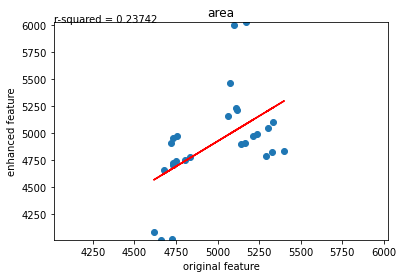

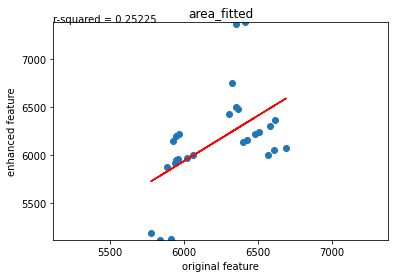

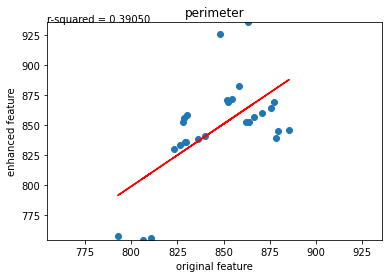

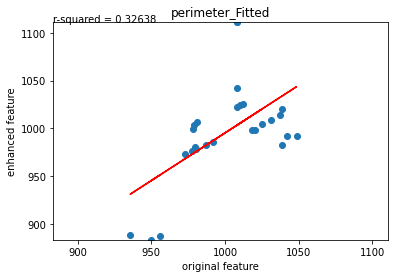

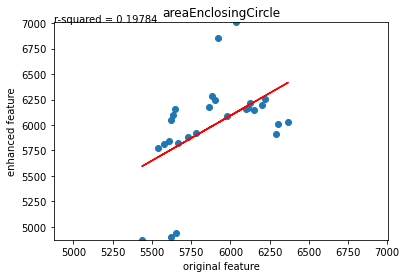

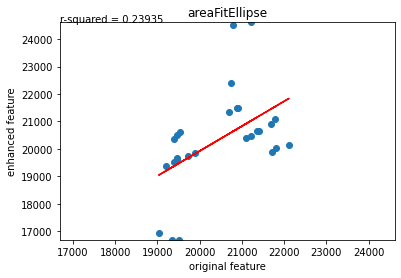

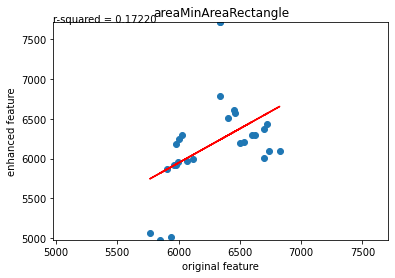

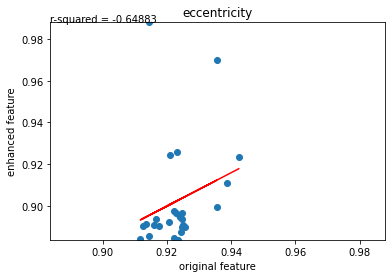

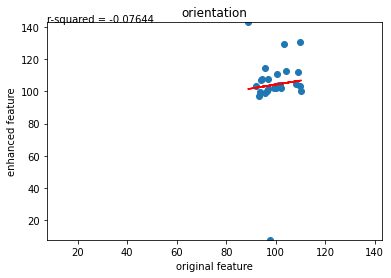

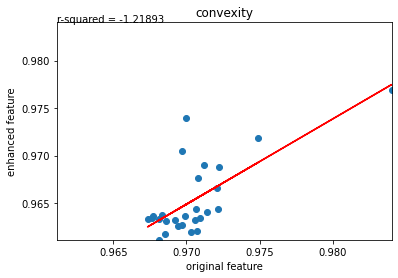

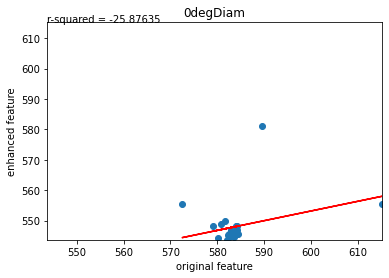

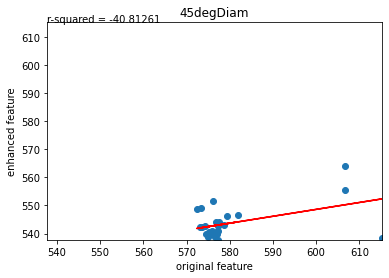

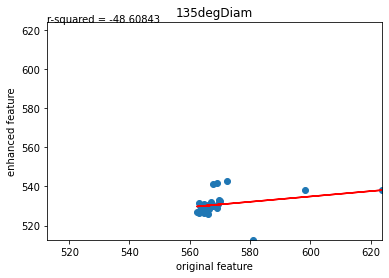

In [255]:

for l1 in dfx_mean.columns:
    for l2 in dfy_mean.columns:
        if l1==l2:
            x = np.array(dfx_mean[l1])
            y = np.array(dfy_mean[l2]) 
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (rmin, rmax))
            plt.title(l1)
            plt.xlabel('original feature')
            plt.ylabel('enhanced feature')
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()


### Let us plot standard deviation of the feature values of the original data against that of enhanced data

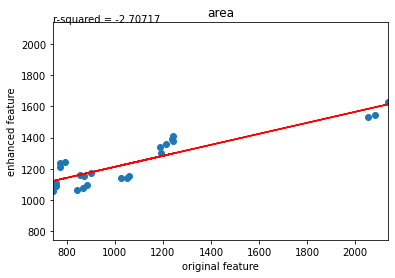

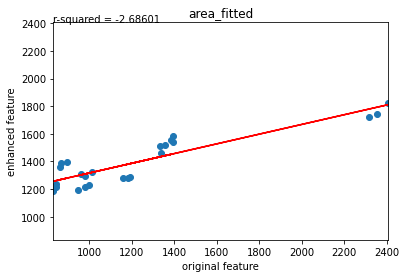

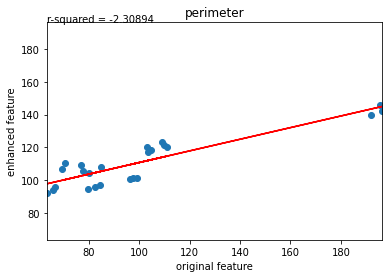

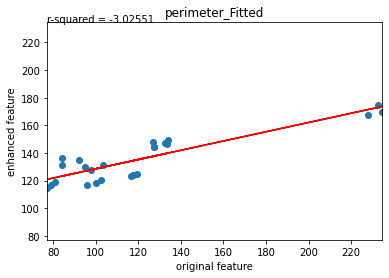

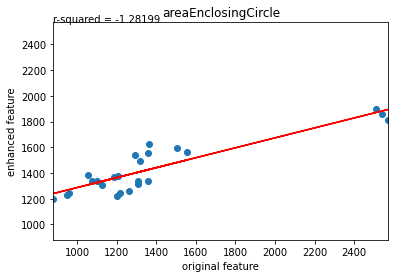

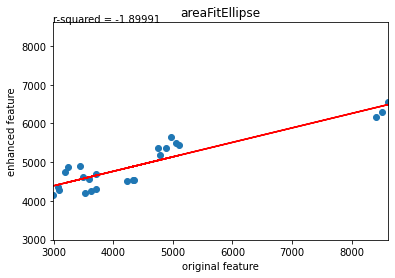

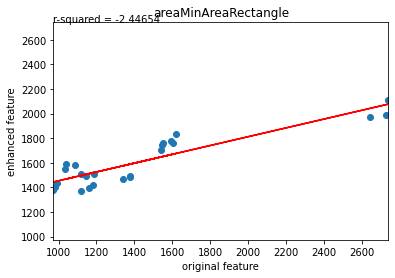

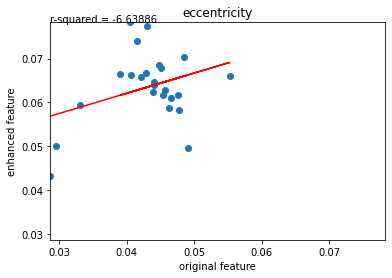

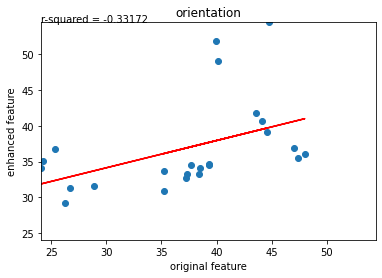

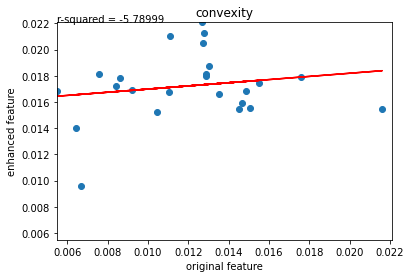

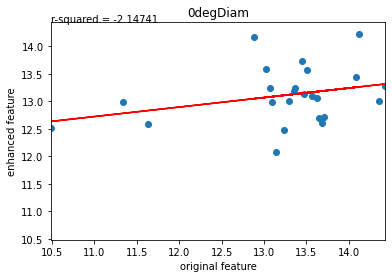

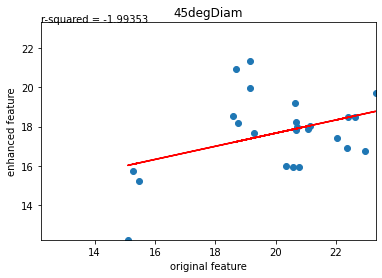

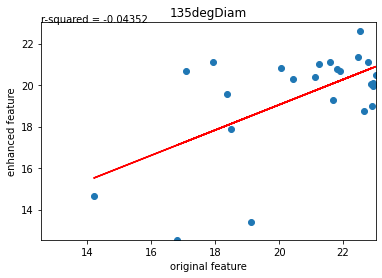

In [256]:
for l1 in dfx_mean.columns:
    for l2 in dfy_mean.columns:
        if l1==l2:
            x = np.array(dfx_std[l1])
            y = np.array(dfy_std[l2])
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (rmin, rmax))
            plt.title(l1)
            plt.xlabel('original feature')
            plt.ylabel('enhanced feature')
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()

#### What is concluded from the above histograms and the scatter plots is
1. Two sets of triplicate data are not read/wrangled properly as their histogram is not correctly displayed
2. One set of triplicates (histogram in RED) does not show unimodal property and this might be an indication of error in feature measurement or bad quality image acquisition. This set should not be used for further analysis.
3. This frequency distribution parameters (mean, sigma) shows that the enhanced data is more closer to normal (Gaussian) distribution. One can conclude from this that the "enhancement" has actually improved the feature clustering to be more tight.
4. Comparison of the mean of the features of original data and enhanced data shows that the mean value of the features has shifted somewhat.
5.Comparison of the standard deviation (spread) of the features of original data and enhanced data shows that often the spread of the features is lower in the enhanced data compared to original data

### 1.5.1 Correlatio between features <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [257]:
#Get the list of numerical features
dfl = dfx[0][0].columns
dfl = dfl[3:len(dfl)]
print(dfl)

Index(['area', 'area_fitted', 'perimeter', 'perimeter_Fitted',
       'areaEnclosingCircle', 'areaFitEllipse', 'areaMinAreaRectangle',
       'eccentricity', 'orientation', 'convexity', '0degDiam', '45degDiam',
       '90degDiam', '135degDiam'],
      dtype='object', name=0)


In [258]:
df = copy.deepcopy(dfx[0][0])
df = df.drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df.head()

0           area  area_fitted    perimeter  perimeter_Fitted  \
1    3625.229147  4687.607477   719.343713        854.492199   
7    5815.699931  7126.331616   904.399835       1059.570327   
94   7257.759863  8747.279996  1033.180938       1213.378923   
821  4085.228012  5227.923604   777.692086        922.851575   
822  3946.498195  5067.289080   760.602246        905.761731   

0    areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1            4547.633587    14834.331974           4534.274305      0.878787   
7            6721.254263    23998.295943           7009.506276      0.948557   
94           8169.565867    29708.074832           9167.925691      0.949448   
821          4856.159664    16542.446402           5322.843450      0.917574   
822          4636.369516    16067.414159           5125.701296      0.958467   

0    orientation  convexity  0degDiam  45degDiam  90degDiam  135degDiam  
1     101.936035   0.978325  598.1445   606.6895   581.0547    598.1445  
7      57.189724   0.979103  589.5996   572.5098   581.0547    563.9648  
94     86.178696   0.969283  581.0547   581.0547   581.0547    555.4199  
821   161.066010   0.969671  598.1445   615.2344   581.0547    581.0547  
822   145.403610   0.971249  581.0547   581.0547   581.0547    581.0547

In [259]:
cr = df.corr()
cr.head(20)

0                         area  area_fitted  perimeter  perimeter_Fitted  \
0                                                                          
area                  1.000000     0.999909   0.992810          0.990328   
area_fitted           0.999909     1.000000   0.994251          0.992018   
perimeter             0.992810     0.994251   1.000000          0.996860   
perimeter_Fitted      0.990328     0.992018   0.996860          1.000000   
areaEnclosingCircle   0.987665     0.988278   0.988166          0.983181   
areaFitEllipse        0.998930     0.998771   0.991936          0.987728   
areaMinAreaRectangle  0.995469     0.996166   0.993080          0.995528   
eccentricity          0.170757     0.170008   0.158872          0.166114   
orientation          -0.449474    -0.448696  -0.437504         -0.440501   
convexity             0.036668     0.027082  -0.049505         -0.052407   
0degDiam              0.075235     0.073641   0.062455          0.056817   
45degDiam            -0.338520    -0.337195  -0.324896         -0.323787   
90degDiam                  NaN          NaN        NaN               NaN   
135degDiam           -0.455886    -0.453206  -0.427753         -0.428874   

0                     areaEnclosingCircle  areaFitEllipse  \
0                                                           
area                             0.987665        0.998930   
area_fitted                      0.988278        0.998771   
perimeter                        0.988166        0.991936   
perimeter_Fitted                 0.983181        0.987728   
areaEnclosingCircle              1.000000        0.990705   
areaFitEllipse                   0.990705        1.000000   
areaMinAreaRectangle             0.985822        0.993139   
eccentricity                     0.067662        0.161816   
orientation                     -0.441704       -0.449692   
convexity                       -0.044519        0.030747   
0degDiam                         0.071719        0.080416   
45degDiam                       -0.329420       -0.334542   
90degDiam                             NaN             NaN   
135degDiam                      -0.433103       -0.451942   

0                     areaMinAreaRectangle  eccentricity  orientation  \
0                                                                       
area                              0.995469      0.170757    -0.449474   
area_fitted                       0.996166      0.170008    -0.448696   
perimeter                         0.993080      0.158872    -0.437504   
perimeter_Fitted                  0.995528      0.166114    -0.440501   
areaEnclosingCircle               0.985822      0.067662    -0.441704   
areaFitEllipse                    0.993139      0.161816    -0.449692   
areaMinAreaRectangle              1.000000      0.164127    -0.449498   
eccentricity                      0.164127      1.000000    -0.089199   
orientation                      -0.449498     -0.089199     1.000000   
convexity                        -0.025530      0.192794    -0.035519   
0degDiam                          0.058651      0.080041     0.007141   
45degDiam                        -0.341991      0.020450     0.313850   
90degDiam                              NaN           NaN          NaN   
135degDiam                       -0.449626     -0.053616     0.318884   

0                     convexity  0degDiam  45degDiam  90degDiam  135degDiam  
0                                                                            
area                   0.036668  0.075235  -0.338520        NaN   -0.455886  
area_fitted            0.027082  0.073641  -0.337195        NaN   -0.453206  
perimeter             -0.049505  0.062455  -0.324896        NaN   -0.427753  
perimeter_Fitted      -0.052407  0.056817  -0.323787        NaN   -0.428874  
areaEnclosingCircle   -0.044519  0.071719  -0.329420        NaN   -0.433103  
areaFitEllipse         0.030747  0.080416  -0.334542        NaN   -0.451942  
areaMinAreaRe

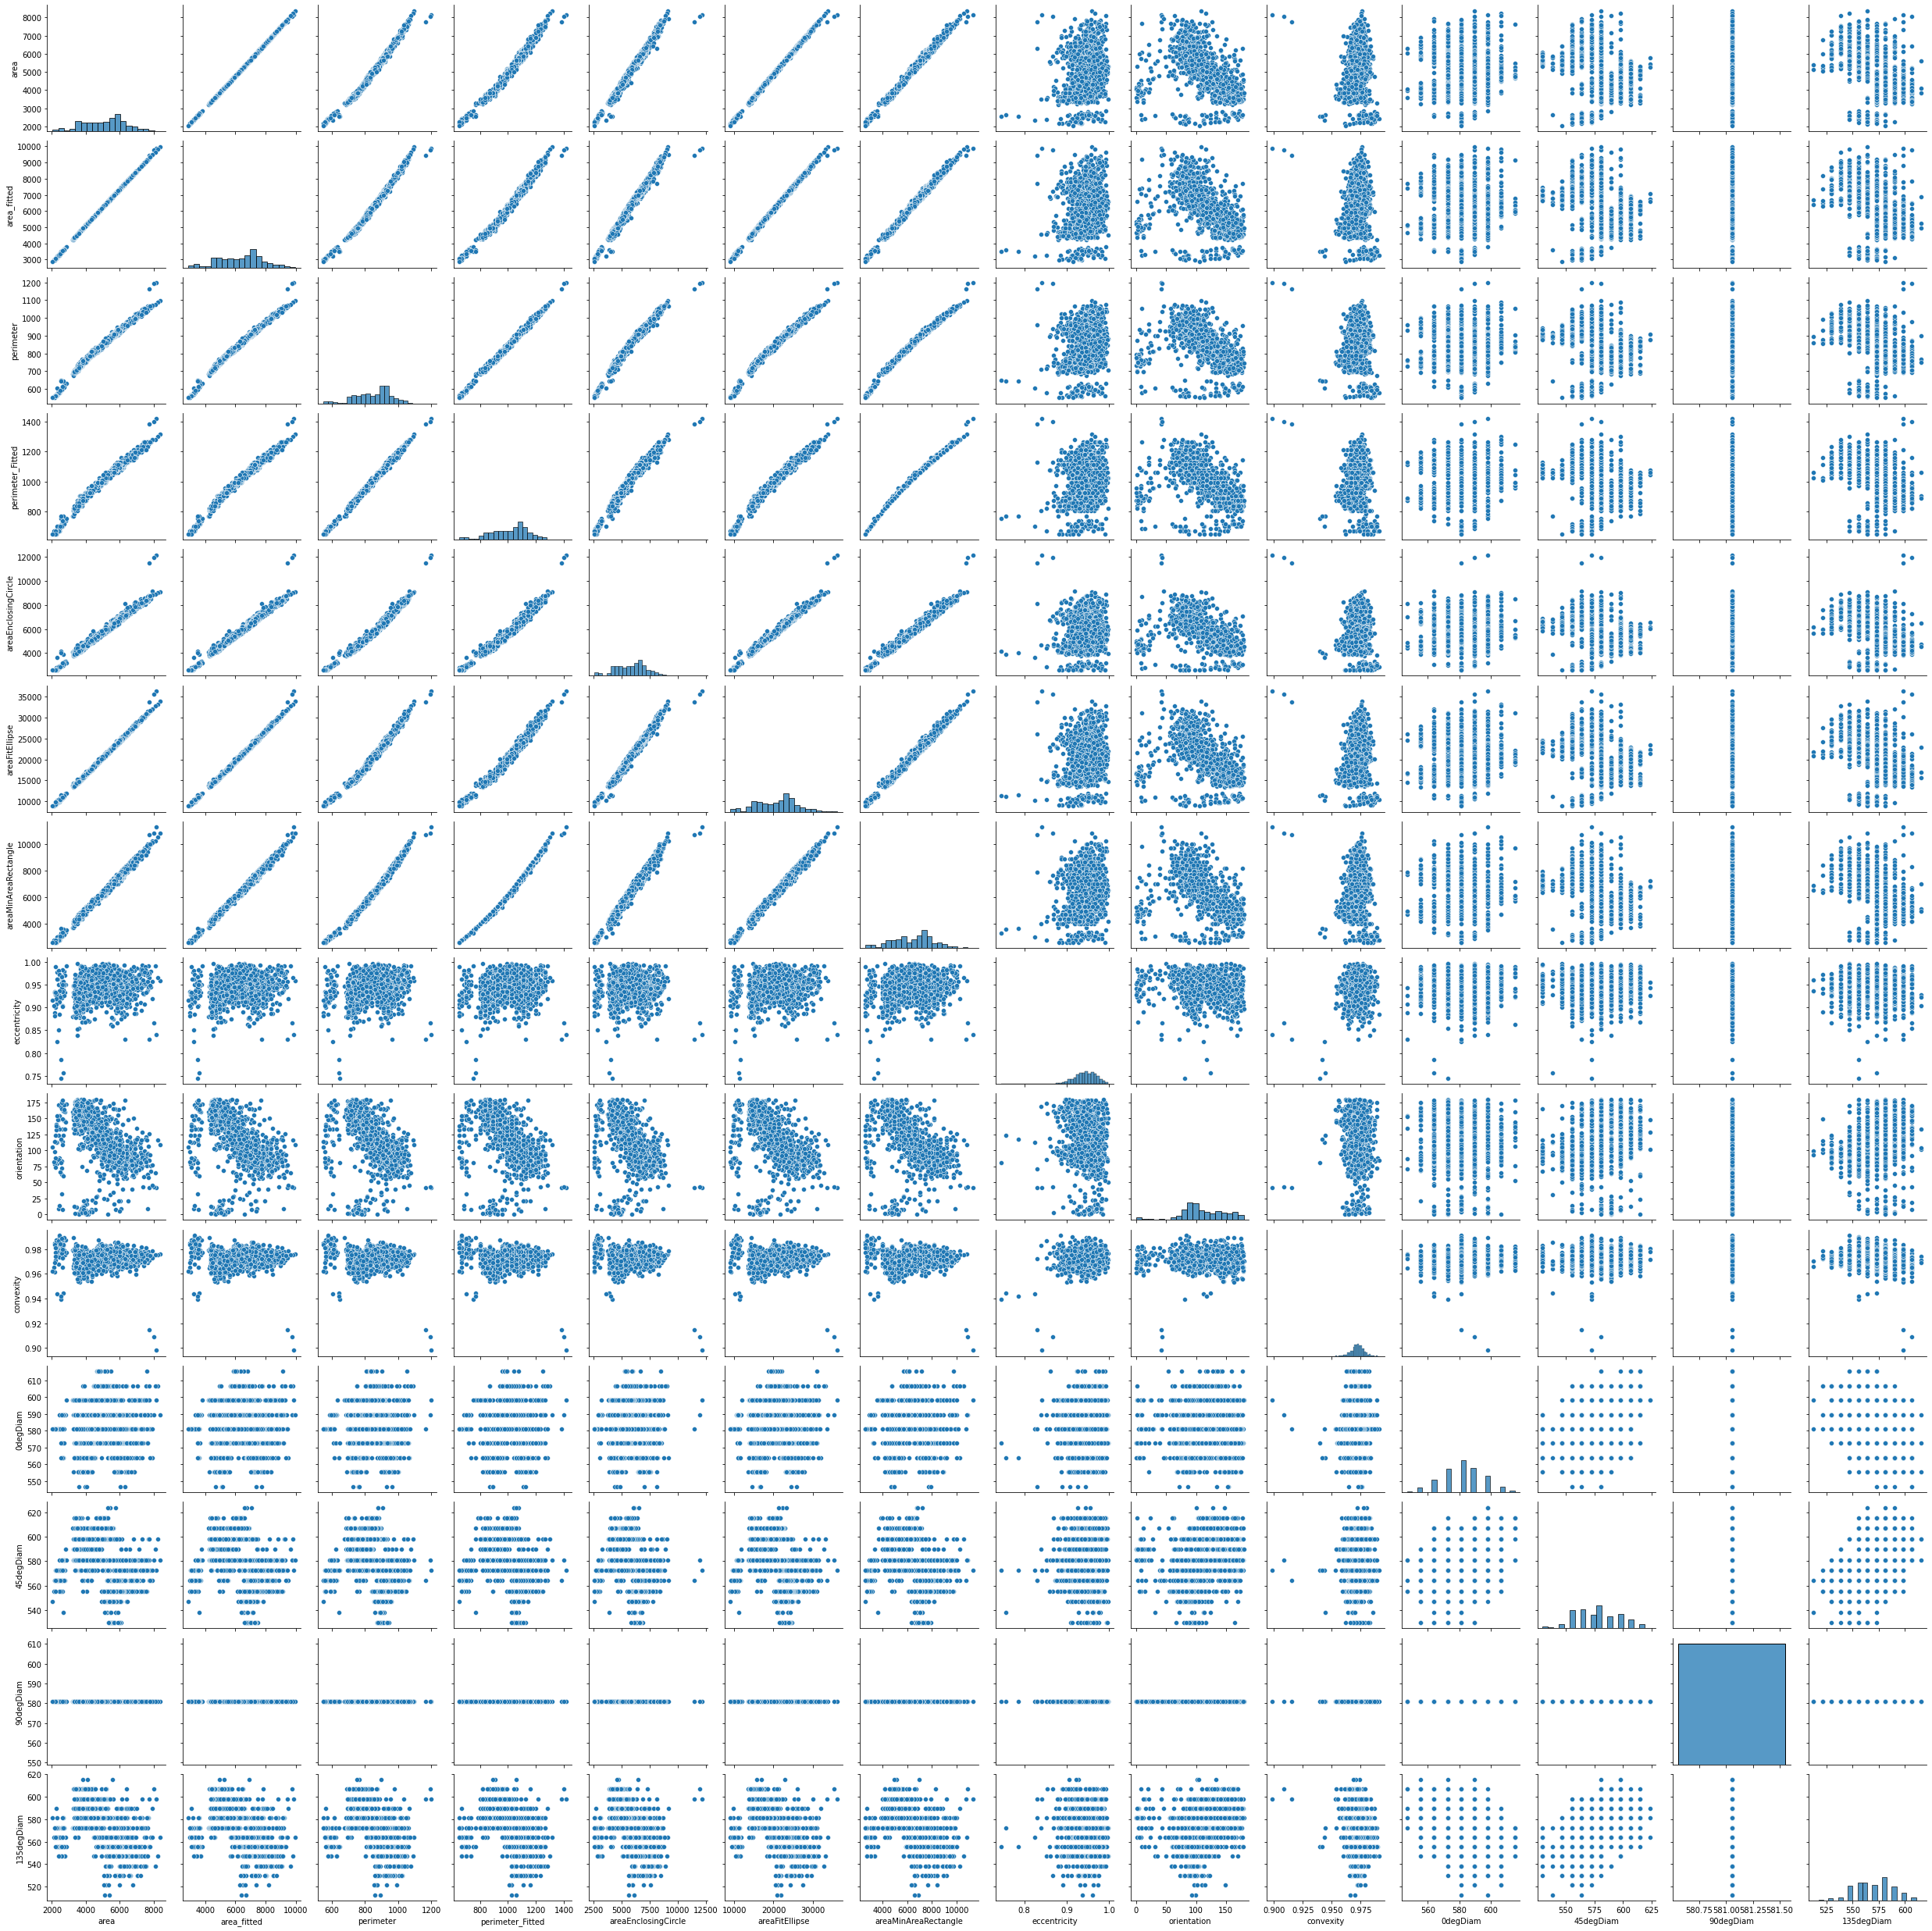

In [260]:
# Call the .pairplot() method on our Seaborn object 'sns', and plug in our df data as a parameter. 
sns.pairplot(df)

<AxesSubplot:xlabel='0', ylabel='0'>

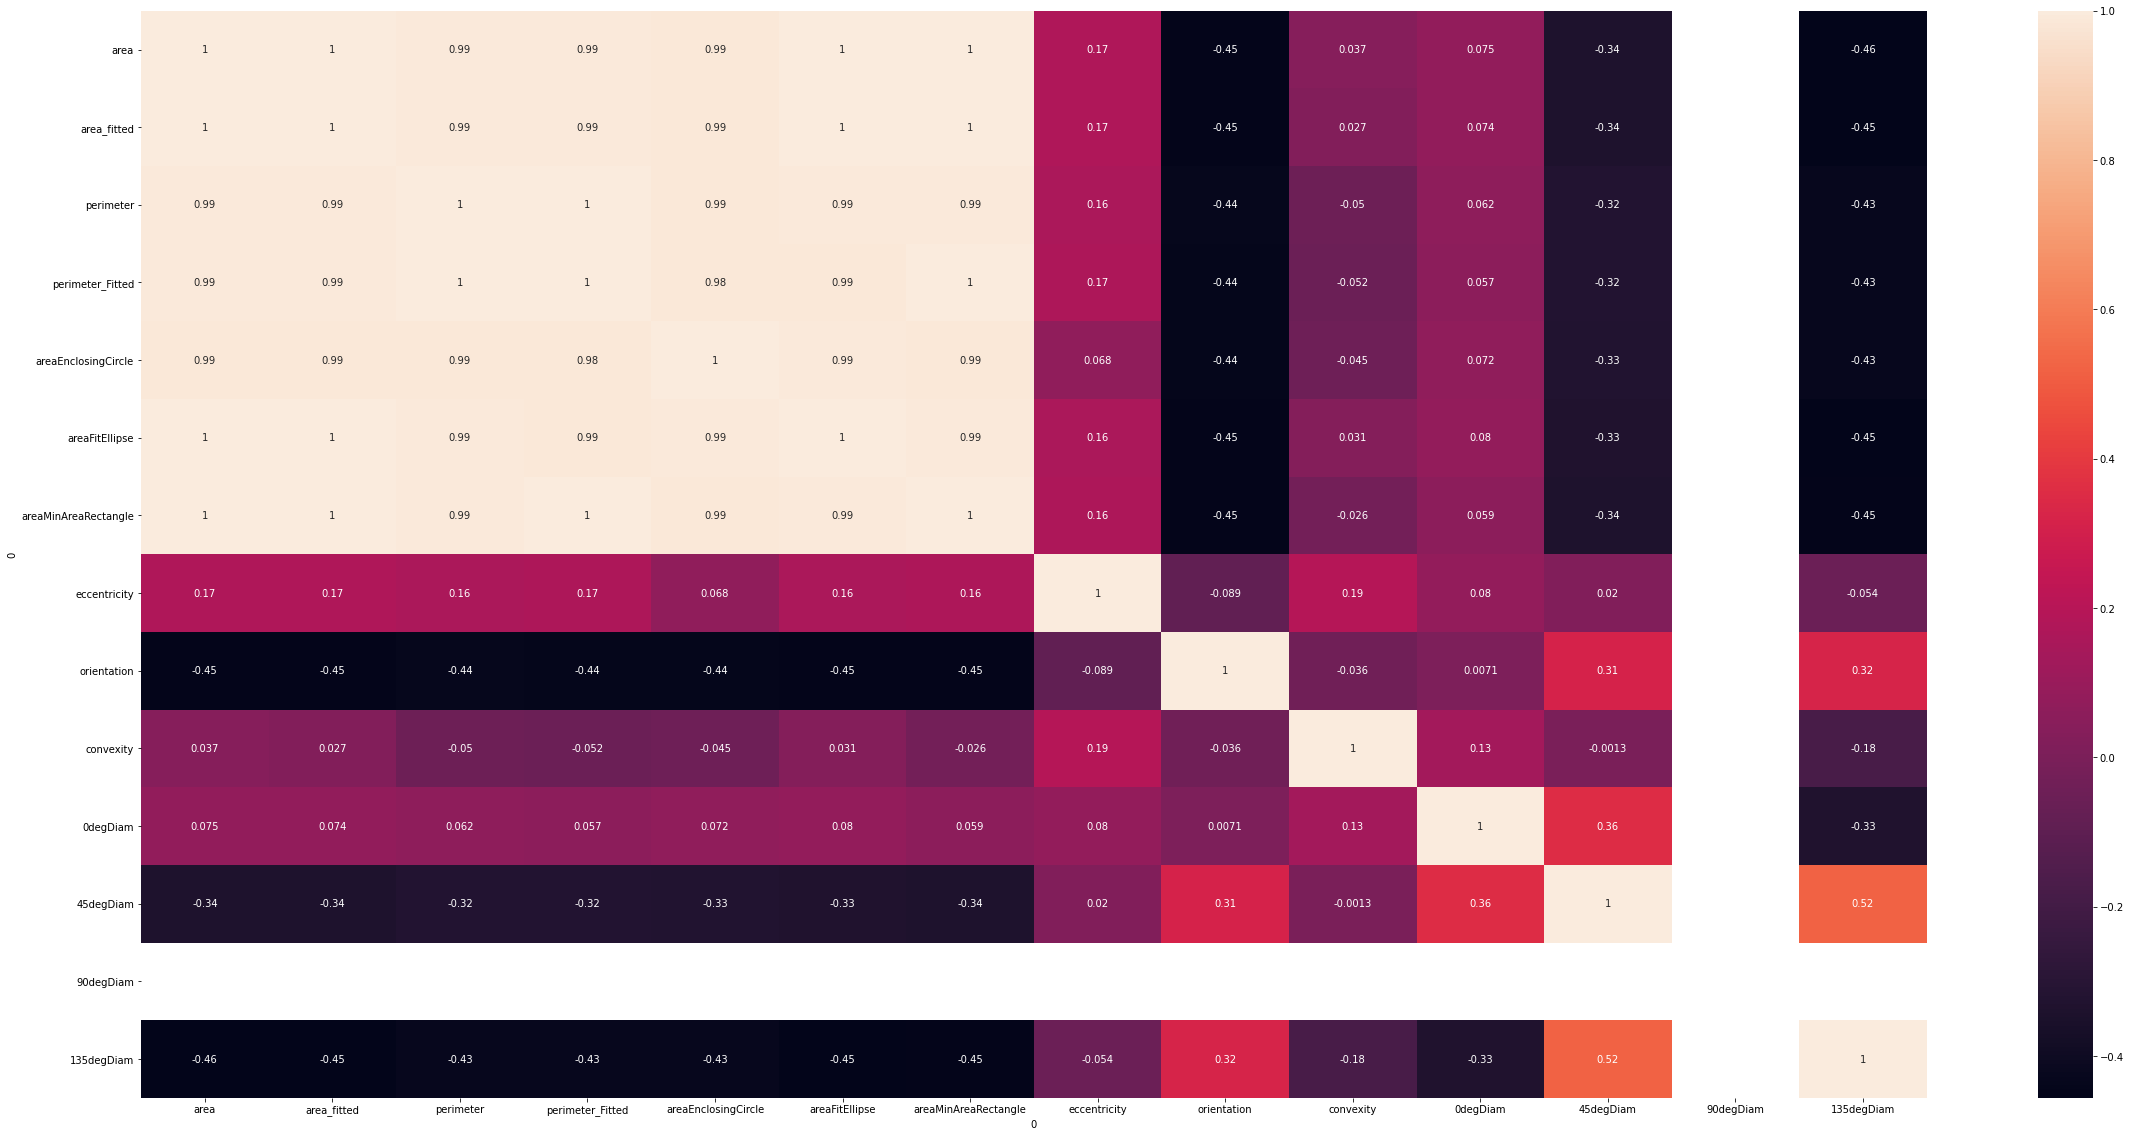

In [261]:
# We need to do some preliminary work, and ensure that the Matplotlib plot is big enough. 
# Call .figure() on plt, and plug in the parameter figsize=(40,20) (or similar suitably large dimensions)
plt.figure(figsize=(40, 20))

# To create an annotated heatmap of the correlations, we call the heatmap() method on our sns object.
# Ensure to plug in, as first parameter, cr, and as second parameter, annot=True (so the graph is annotated)
sns.heatmap(cr, annot=True)

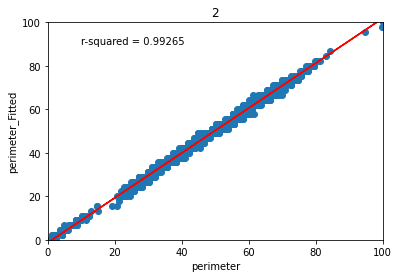

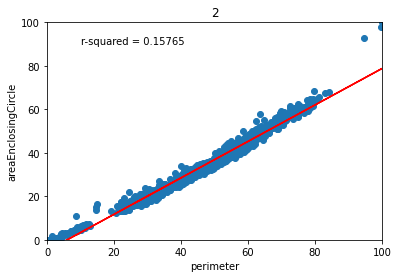

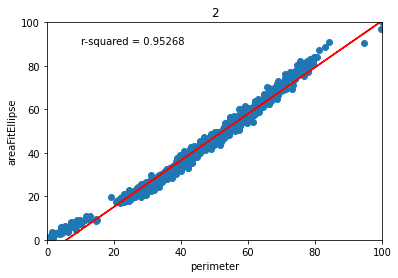

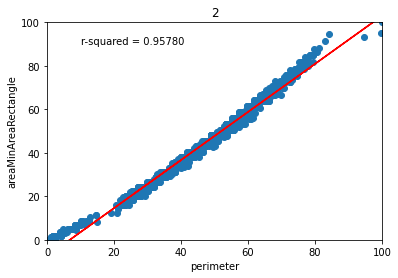

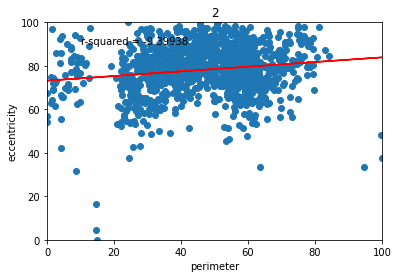

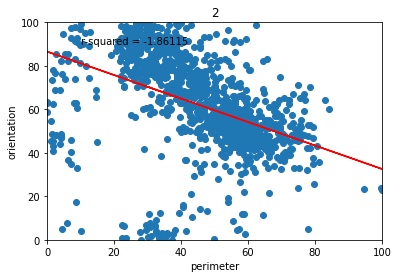

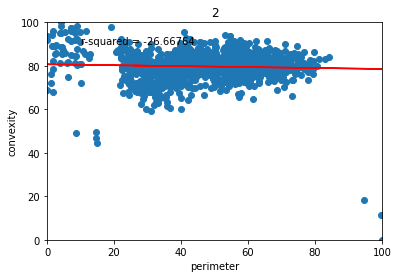

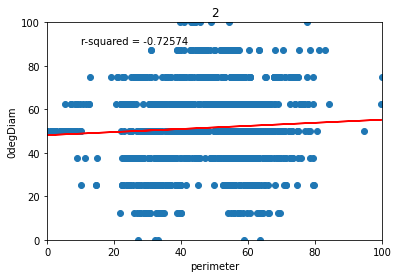

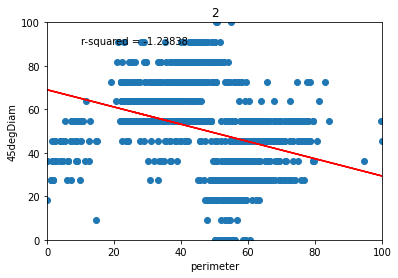

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [262]:
#we can understand feature correlation based on one dataframe
#All the dataframes are representing same features for similar structures from different image ata
#So conclusion based on one dataframe holds good for all data frames

df = normalize(dfx[0][0])
for l1 in range(2, (len(dfl)-1)):
    for l2 in range(l1+1, (len(dfl))):
            x = np.array(df[dfl[l1]])
            y = np.array(df[dfl[l2]])
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (10,90))
            plt.title(l1)
            plt.xlabel(dfl[l1])
            plt.ylabel(dfl[l2])
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()


#### Conclusions from the above pairplot, heatmap and the scatter plots of features Vs features from the same class of data

1. Size defining features such as 'area', 'area_fitted', 'perimeter', 'perimeter_Fitted', 'areaEnclosingCircle', 'areaFitEllipse', 'areaMinAreaRectangle'show high correlation i.e. area and the area related features (perimeter, etc.,) show high correlation
2. There is a small but significant trend in relation between 0deg, 45deg and 135deg diameter that implicitely indicate the channel holes are more elliptical than circular
3. Shape defining features such as 'eccentricity', 'orientation', 'convexity', do not correlate with area based features or diameter
4. A simple adhoc test to see whether some of the features are capable of predicting other features show that for many such (where R-square value is too low or more than 1.0) the relation is not exactly linear.
5. Feature "90degDiam" has the same value for all channel holes. This shows that there is a bug in the feature engineering code (outside the scope of this work)